# Importing all files

In [1]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
from datetime import datetime

from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')
  
# Read the provided CSV file/data set.            
centre = pd.read_csv('L_centr_fnl_0.csv') 
centre.head()

Unnamed: 0 Survey wave (calendar quarter) Equivalent financial quarter  \
0           0        2014 Q1 (January-March)                   2013-14 Q4   
1           1        2014 Q1 (January-March)                   2013-14 Q4   
2           2        2014 Q1 (January-March)                   2013-14 Q4   
3           3        2014 Q1 (January-March)                   2013-14 Q4   
4           4        2014 Q1 (January-March)                   2013-14 Q4   

    Site ID                            Location    Survey date Weather  \
0  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
1  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
2  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
3  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
4  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   

          Time                       Period   Direction  ...  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound  ...   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound  ...   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound  ...   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound  ...   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound  ...   

   Survey_wave_year  Survey_wave_quater  Survey_wave_months        Date  Year  \
0              2014                  Q1       January-March  2014-01-24  2014   
1              2014                  Q1       January-March  2014-01-24  2014   
2              2014                  Q1       January-March  2014-01-24  2014   
3              2014                  Q1       January-March  2014-01-24  2014   
4              2014                  Q1       January-March  2014-01-24  2014   

     Month Quarter Year-Quarter     Day  Total_cycles  
0  January      Q1      2014-Q1  Friday           0.0  
1  January      Q1      2014-Q1  Friday          15.0  
2  January      Q1      2014-Q1  Friday          35.0  
3  January      Q1      2014-Q1  Friday          61.0  
4  January      Q1      2014-Q1  Friday          73.0  

[5 rows x 25 columns]

In [2]:
# Check data types
centre.dtypes

Unnamed: 0                          int64
Survey wave (calendar quarter)     object
Equivalent financial quarter       object
Site ID                            object
Location                           object
Survey date                        object
Weather                            object
Time                               object
Period                             object
Direction                          object
Start hour                          int64
Start minute                        int64
Number of private cycles            int64
Number of cycle hire bikes          int64
Total cycles                        int64
Survey_wave_year                    int64
Survey_wave_quater                 object
Survey_wave_months                 object
Date                               object
Year                                int64
Month                              object
Quarter                            object
Year-Quarter                       object
Day                               

In [3]:
# Remove any unecessary punctuation from the Location column
centre['Location'] = centre['Location'].str.replace(r"[\"\',]", '')
centre.head()

Unnamed: 0 Survey wave (calendar quarter) Equivalent financial quarter  \
0           0        2014 Q1 (January-March)                   2013-14 Q4   
1           1        2014 Q1 (January-March)                   2013-14 Q4   
2           2        2014 Q1 (January-March)                   2013-14 Q4   
3           3        2014 Q1 (January-March)                   2013-14 Q4   
4           4        2014 Q1 (January-March)                   2013-14 Q4   

    Site ID                            Location    Survey date Weather  \
0  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
1  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
2  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
3  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
4  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   

          Time                       Period   Direction  ...  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound  ...   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound  ...   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound  ...   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound  ...   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound  ...   

   Survey_wave_year  Survey_wave_quater  Survey_wave_months        Date  Year  \
0              2014                  Q1       January-March  2014-01-24  2014   
1              2014                  Q1       January-March  2014-01-24  2014   
2              2014                  Q1       January-March  2014-01-24  2014   
3              2014                  Q1       January-March  2014-01-24  2014   
4              2014                  Q1       January-March  2014-01-24  2014   

     Month Quarter Year-Quarter     Day  Total_cycles  
0  January      Q1      2014-Q1  Friday           0.0  
1  January      Q1      2014-Q1  Friday          15.0  
2  January      Q1      2014-Q1  Friday          35.0  
3  January      Q1      2014-Q1  Friday          61.0  
4  January      Q1      2014-Q1  Friday          73.0  

[5 rows x 25 columns]

In [4]:
# Can see the ' from Cleapatra's has been removed
centre[centre['Location'] == 'Victoria Embankment (by Cleopatras Needle)'].head()

Unnamed: 0 Survey wave (calendar quarter) Equivalent financial quarter  \
1536        1536        2014 Q1 (January-March)                   2013-14 Q4   
1537        1537        2014 Q1 (January-March)                   2013-14 Q4   
1538        1538        2014 Q1 (January-March)                   2013-14 Q4   
1539        1539        2014 Q1 (January-March)                   2013-14 Q4   
1540        1540        2014 Q1 (January-March)                   2013-14 Q4   

       Site ID                                    Location    Survey date  \
1536  CENCY013  Victoria Embankment (by Cleopatras Needle)  jeu, 23/01/14   
1537  CENCY013  Victoria Embankment (by Cleopatras Needle)  jeu, 23/01/14   
1538  CENCY013  Victoria Embankment (by Cleopatras Needle)  jeu, 23/01/14   
1539  CENCY013  Victoria Embankment (by Cleopatras Needle)  jeu, 23/01/14   
1540  CENCY013  Victoria Embankment (by Cleopatras Needle)  jeu, 23/01/14   

     Weather         Time                       Period  Direction  ...  \
1536     Dry  0600 - 0615  Early Morning (06:00-07:00)  Eastbound  ...   
1537     Dry  0615 - 0630  Early Morning (06:00-07:00)  Eastbound  ...   
1538     Dry  0630 - 0645  Early Morning (06:00-07:00)  Eastbound  ...   
1539     Dry  0645 - 0700  Early Morning (06:00-07:00)  Eastbound  ...   
1540     Dry  0700 - 0715        AM peak (07:00-10:00)  Eastbound  ...   

      Survey_wave_year  Survey_wave_quater  Survey_wave_months        Date  \
1536              2014                  Q1       January-March  2014-01-23   
1537              2014                  Q1       January-March  2014-01-23   
1538              2014                  Q1       January-March  2014-01-23   
1539              2014                  Q1       January-March  2014-01-23   
1540              2014                  Q1       January-March  2014-01-23   

      Year    Month Quarter Year-Quarter       Day  Total_cycles  
1536  2014  January      Q1      2014-Q1  Thursday          14.0  
1537  2014  January      Q1      2014-Q1  Thursday          16.0  
1538  2014  January      Q1      2014-Q1  Thursday          37.0  
1539  2014  January      Q1      2014-Q1  Thursday          49.0  
1540  2014  January      Q1      2014-Q1  Thursday          53.0  

[5 rows x 25 columns]

In [5]:
# Import the biking sites file
# To merge with the other dataframes to view boroughs of London
london_sites = pd.read_csv('london_sites_cl.csv')
london_sites.head()

Unnamed: 0     UnqID ProgID           SurveyDescription    Easting  \
0           0  CENCY001  CENCY  Central area cycle surveys  530251.49   
1           1  CENCY002  CENCY  Central area cycle surveys  533362.68   
2           2  CENCY003  CENCY  Central area cycle surveys  532334.06   
3           3  CENCY004  CENCY  Central area cycle surveys  532052.50   
4           4  CENCY005  CENCY  Central area cycle surveys  533031.59   

    Northing                            Location         Borough  \
0  178742.45  Millbank (south of Thorney Street)     Westminster   
1  181824.45                         Bishopsgate  City of London   
2  180520.37                    Southwark Bridge       Southwark   
3  179677.64               Southwark Bridge Road       Southwark   
4  180213.46                       Tooley Street       Southwark   

  Functional cycling area  
0                 Central  
1                 Central  
2                 Central  
3                 Central  
4                 Central

In [6]:
# Rename column to match column name in other dataframes
london_sites = london_sites.rename(columns={'UnqID': 'Site ID'})
london_sites.head()

Unnamed: 0   Site ID ProgID           SurveyDescription    Easting  \
0           0  CENCY001  CENCY  Central area cycle surveys  530251.49   
1           1  CENCY002  CENCY  Central area cycle surveys  533362.68   
2           2  CENCY003  CENCY  Central area cycle surveys  532334.06   
3           3  CENCY004  CENCY  Central area cycle surveys  532052.50   
4           4  CENCY005  CENCY  Central area cycle surveys  533031.59   

    Northing                            Location         Borough  \
0  178742.45  Millbank (south of Thorney Street)     Westminster   
1  181824.45                         Bishopsgate  City of London   
2  180520.37                    Southwark Bridge       Southwark   
3  179677.64               Southwark Bridge Road       Southwark   
4  180213.46                       Tooley Street       Southwark   

  Functional cycling area  
0                 Central  
1                 Central  
2                 Central  
3                 Central  
4                 Central

In [7]:
# merge london central and biking sites dataframe 
borough_lc = pd.merge(centre,
                 london_sites[['Site ID', 'Borough', 'Functional cycling area']],
                 on='Site ID')
borough_lc.head()

Unnamed: 0 Survey wave (calendar quarter) Equivalent financial quarter  \
0           0        2014 Q1 (January-March)                   2013-14 Q4   
1           1        2014 Q1 (January-March)                   2013-14 Q4   
2           2        2014 Q1 (January-March)                   2013-14 Q4   
3           3        2014 Q1 (January-March)                   2013-14 Q4   
4           4        2014 Q1 (January-March)                   2013-14 Q4   

    Site ID                            Location    Survey date Weather  \
0  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
1  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
2  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
3  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
4  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   

          Time                       Period   Direction  ...  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound  ...   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound  ...   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound  ...   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound  ...   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound  ...   

   Survey_wave_months        Date  Year    Month  Quarter  Year-Quarter  \
0       January-March  2014-01-24  2014  January       Q1       2014-Q1   
1       January-March  2014-01-24  2014  January       Q1       2014-Q1   
2       January-March  2014-01-24  2014  January       Q1       2014-Q1   
3       January-March  2014-01-24  2014  January       Q1       2014-Q1   
4       January-March  2014-01-24  2014  January       Q1       2014-Q1   

      Day Total_cycles      Borough  Functional cycling area  
0  Friday          0.0  Westminster                  Central  
1  Friday         15.0  Westminster                  Central  
2  Friday         35.0  Westminster                  Central  
3  Friday         61.0  Westminster                  Central  
4  Friday         73.0  Westminster                  Central  

[5 rows x 27 columns]

In [8]:
# Create a subset of the borough dataframe
borough_ss = borough_lc.loc[:, ['Location', 'Borough', 'Functional cycling area', 'Year-Quarter', 
                                'Number of private cycles', 'Number of cycle hire bikes', 'Total_cycles']]
                           
borough_ss.head()

Location      Borough Functional cycling area  \
0  Millbank (south of Thorney Street)  Westminster                 Central   
1  Millbank (south of Thorney Street)  Westminster                 Central   
2  Millbank (south of Thorney Street)  Westminster                 Central   
3  Millbank (south of Thorney Street)  Westminster                 Central   
4  Millbank (south of Thorney Street)  Westminster                 Central   

  Year-Quarter  Number of private cycles  Number of cycle hire bikes  \
0      2014-Q1                         0                           0   
1      2014-Q1                        15                           0   
2      2014-Q1                        35                           0   
3      2014-Q1                        59                           2   
4      2014-Q1                        73                           0   

   Total_cycles  
0           0.0  
1          15.0  
2          35.0  
3          61.0  
4          73.0

In [9]:
# Create another subset of the dataframe
borough_group = borough_lc.groupby(['Borough', 'Year'])['Number of private cycles', 
                                        'Number of cycle hire bikes',
                                        'Total_cycles'].sum().\
                    reset_index().sort_values(by = ['Borough', 'Year'])
borough_group.head()

Borough  Year  Number of private cycles  Number of cycle hire bikes  \
0  Camden  2014                    241626                       28591   
1  Camden  2015                    237176                       27424   
2  Camden  2016                    247569                       28614   
3  Camden  2017                    236667                       29543   
4  Camden  2018                    255108                       30952   

   Total_cycles  
0      270217.0  
1      264600.0  
2      276183.0  
3      266210.0  
4      286060.0

In [10]:
# Last subset of the data looking at 2014 and 2019
start_end = borough_group[(borough_group['Year'].isin([2014, 2019]))]
start_end.head()

Borough  Year  Number of private cycles  \
0           Camden  2014                    241626   
5           Camden  2019                    265966   
8   City of London  2014                    308651   
13  City of London  2019                    426720   
16         Hackney  2014                      2864   

    Number of cycle hire bikes  Total_cycles  
0                        28591      270217.0  
5                        30832      296798.0  
8                        38141      346792.0  
13                       55365      482085.0  
16                         472        3336.0

Created this dataframe to look at the number of cycles in 2014 compared to 2019 - excluded 2020 and 2021 as the numbers are disorted due to Covid and so it is difficult to make any relevant insights from the data

In [11]:
# Exported the dataframe as a csv - needed to alter the layout of the document in excel
start_end.to_csv('start_end.csv')

In [12]:
# Reimport layout
fourteen_nineteen = pd.read_csv('start_end_reshape.csv')
fourteen_nineteen

Borough  2014 Number of private cycles  \
0          Camden                         241626   
1  City of London                         308651   
2         Hackney                           2864   
3       Islington                         120968   
4         Lambeth                         163769   
5       Southwark                         197126   
6   Tower Hamlets                           2432   
7     Westminster                         398925   

   2019 Number of private cycles  2014 Number of hire cycles  \
0                         265966                       28591   
1                         426720                       38141   
2                           6113                         472   
3                         133374                       12386   
4                         153244                       17871   
5                         272904                       16344   
6                           3282                         476   
7                         425736                       52355   

   2019 Number of hire cycles  2014 Total_cycles  2019 Total_cycles  
0                       30832             270217             296798  
1                       55365             346792             482085  
2                         678               3336               6791  
3                       13319             133354             146693  
4                       21397             181640             174641  
5                       24116             213470             297020  
6                         506               2908               3788  
7                       68449             451280             494185

In [13]:
# Add columns to look at % change in private cycles
fourteen_nineteen['% Change in private cycles'] = fourteen_nineteen[['2014 Number of private cycles', 
                                              '2019 Number of private cycles']].pct_change(axis=1)\
['2019 Number of private cycles'].round(2)
fourteen_nineteen

Borough  2014 Number of private cycles  \
0          Camden                         241626   
1  City of London                         308651   
2         Hackney                           2864   
3       Islington                         120968   
4         Lambeth                         163769   
5       Southwark                         197126   
6   Tower Hamlets                           2432   
7     Westminster                         398925   

   2019 Number of private cycles  2014 Number of hire cycles  \
0                         265966                       28591   
1                         426720                       38141   
2                           6113                         472   
3                         133374                       12386   
4                         153244                       17871   
5                         272904                       16344   
6                           3282                         476   
7                         425736                       52355   

   2019 Number of hire cycles  2014 Total_cycles  2019 Total_cycles  \
0                       30832             270217             296798   
1                       55365             346792             482085   
2                         678               3336               6791   
3                       13319             133354             146693   
4                       21397             181640             174641   
5                       24116             213470             297020   
6                         506               2908               3788   
7                       68449             451280             494185   

   % Change in private cycles  
0                        0.10  
1                        0.38  
2                        1.13  
3                        0.10  
4                       -0.06  
5                        0.38  
6                        0.35  
7                        0.07

In [14]:
# Add column to look at % change in hire cycles
fourteen_nineteen['% Change in hire cycles'] = fourteen_nineteen[['2014 Number of hire cycles', 
                                              '2019 Number of hire cycles']].pct_change(axis=1)\
['2019 Number of hire cycles'].round(2)
fourteen_nineteen

Borough  2014 Number of private cycles  \
0          Camden                         241626   
1  City of London                         308651   
2         Hackney                           2864   
3       Islington                         120968   
4         Lambeth                         163769   
5       Southwark                         197126   
6   Tower Hamlets                           2432   
7     Westminster                         398925   

   2019 Number of private cycles  2014 Number of hire cycles  \
0                         265966                       28591   
1                         426720                       38141   
2                           6113                         472   
3                         133374                       12386   
4                         153244                       17871   
5                         272904                       16344   
6                           3282                         476   
7                         425736                       52355   

   2019 Number of hire cycles  2014 Total_cycles  2019 Total_cycles  \
0                       30832             270217             296798   
1                       55365             346792             482085   
2                         678               3336               6791   
3                       13319             133354             146693   
4                       21397             181640             174641   
5                       24116             213470             297020   
6                         506               2908               3788   
7                       68449             451280             494185   

   % Change in private cycles  % Change in hire cycles  
0                        0.10                     0.08  
1                        0.38                     0.45  
2                        1.13                     0.44  
3                        0.10                     0.08  
4                       -0.06                     0.20  
5                        0.38                     0.48  
6                        0.35                     0.06  
7                        0.07                     0.31

In [15]:
# Add column to look at % change in total cycles
fourteen_nineteen['% Change Total Cycles'] = fourteen_nineteen[['2014 Total_cycles', 
                                              '2019 Total_cycles']].pct_change(axis=1)\
['2019 Total_cycles'].round(2)
fourteen_nineteen

Borough  2014 Number of private cycles  \
0          Camden                         241626   
1  City of London                         308651   
2         Hackney                           2864   
3       Islington                         120968   
4         Lambeth                         163769   
5       Southwark                         197126   
6   Tower Hamlets                           2432   
7     Westminster                         398925   

   2019 Number of private cycles  2014 Number of hire cycles  \
0                         265966                       28591   
1                         426720                       38141   
2                           6113                         472   
3                         133374                       12386   
4                         153244                       17871   
5                         272904                       16344   
6                           3282                         476   
7                         425736                       52355   

   2019 Number of hire cycles  2014 Total_cycles  2019 Total_cycles  \
0                       30832             270217             296798   
1                       55365             346792             482085   
2                         678               3336               6791   
3                       13319             133354             146693   
4                       21397             181640             174641   
5                       24116             213470             297020   
6                         506               2908               3788   
7                       68449             451280             494185   

   % Change in private cycles  % Change in hire cycles  % Change Total Cycles  
0                        0.10                     0.08                   0.10  
1                        0.38                     0.45                   0.39  
2                        1.13                     0.44                   1.04  
3                        0.10                     0.08                   0.10  
4                       -0.06                     0.20                  -0.04  
5                        0.38                     0.48                   0.39  
6                        0.35                     0.06                   0.30  
7                        0.07                     0.31                   0.10

## Import external file looking at salary per borough

Data set produced by Office of National Statistics - this file has been edited in Excel so the layout is compatible with Python

In [16]:
# Import file
total_week_earn = pd.read_excel('total_weekly_earnings.xlsx')
total_week_earn.head()

Code                  Area 2002 Pay (£) 2003 Pay (£) 2004 Pay (£)  \
0  00AA        City of London            !            !            #   
1  00AB  Barking and Dagenham        383.3        354.9        360.1   
2  00AC                Barnet        427.4        450.1        453.3   
3  00AD                Bexley          405        431.9        438.1   
4  00AE                 Brent        368.4        359.8        395.5   

  2005 Pay (£) 2006 Pay (£) 2007 Pay (£) 2008 Pay (£)  2009 Pay (£)  ...  \
0            #            #            #            #         762.4  ...   
1        375.1        417.6        446.7        449.9         448.8  ...   
2        442.3        466.1          460        502.2         528.1  ...   
3        452.4        443.4        469.8        483.9         486.3  ...   
4        394.7        398.7        421.6          437         439.1  ...   

  2012 Pay (£) 2013 Pay (£) 2014 Pay (£) 2015 Pay (£) 2016 Pay (£)  \
0            #            #            #            #            #   
1          450        441.2        422.5        436.6        462.2   
2        503.1        517.5        479.1          491        485.6   
3        509.1        497.9        512.6        491.1          487   
4          442        441.8        441.8        457.6          467   

  2017 Pay (£) 2018 Pay (£) 2019 Pay (£)  2020 Pay (£) 2021 Pay (£)  
0            #        909.4            #             #            #  
1          461        479.1          471         486.7        523.5  
2        522.6        536.6        536.4         538.8        574.9  
3          513        512.7        553.4         566.5        584.8  
4          471        479.9          524         531.8        553.1  

[5 rows x 22 columns]

In [17]:
# Create subset to only look at the boroughs in central london
cent_earnings_borough = total_week_earn[(total_week_earn['Area'].isin(['Camden', 'City of London', 'Hackney',
                                                                       'Islington', 'Lambeth', 'Southwark',
                                                                      'Tower Hamlets', 'Westminster']))].reset_index()

cent_earnings_borough.head()

index  Code            Area 2002 Pay (£) 2003 Pay (£) 2004 Pay (£)  \
0      0  00AA  City of London            !            !            #   
1      6  00AG          Camden        470.8        491.1        507.9   
2     11  00AM         Hackney        387.1        395.2        411.1   
3     18  00AU       Islington          465          472          499   
4     21  00AY         Lambeth        404.3        425.5        446.7   

  2005 Pay (£) 2006 Pay (£) 2007 Pay (£) 2008 Pay (£)  ...  2012 Pay (£)  \
0            #            #            #            #  ...             #   
1          541        552.2        592.6        614.6  ...           612   
2        432.1        428.8        451.1        472.6  ...         511.4   
3        532.5        503.7        517.5        566.7  ...         605.1   
4        460.3        455.6        490.7        494.5  ...         574.8   

  2013 Pay (£) 2014 Pay (£) 2015 Pay (£) 2016 Pay (£) 2017 Pay (£)  \
0            #            #            #            #            #   
1        629.5        613.1        588.1        632.5        614.3   
2          519          513        534.5        527.8        558.1   
3          606        613.5        603.7        613.3        646.1   
4        536.6          547        542.9        551.7        594.6   

  2018 Pay (£) 2019 Pay (£) 2020 Pay (£)  2021 Pay (£)  
0        909.4            #            #             #  
1        634.4          662          623         694.2  
2        555.4        574.9        574.9         575.1  
3        687.7        699.1        690.1         665.6  
4        617.1        634.8        670.8         673.6  

[5 rows x 23 columns]

In [18]:
# Drop index column
cent_earnings = cent_earnings_borough.drop(['index'], axis=1)
cent_earnings.head()

Code            Area 2002 Pay (£) 2003 Pay (£) 2004 Pay (£) 2005 Pay (£)  \
0  00AA  City of London            !            !            #            #   
1  00AG          Camden        470.8        491.1        507.9          541   
2  00AM         Hackney        387.1        395.2        411.1        432.1   
3  00AU       Islington          465          472          499        532.5   
4  00AY         Lambeth        404.3        425.5        446.7        460.3   

  2006 Pay (£) 2007 Pay (£) 2008 Pay (£)  2009 Pay (£)  ... 2012 Pay (£)  \
0            #            #            #         762.4  ...            #   
1        552.2        592.6        614.6         621.1  ...          612   
2        428.8        451.1        472.6         503.7  ...        511.4   
3        503.7        517.5        566.7         588.2  ...        605.1   
4        455.6        490.7        494.5         522.4  ...        574.8   

  2013 Pay (£) 2014 Pay (£) 2015 Pay (£) 2016 Pay (£) 2017 Pay (£)  \
0            #            #            #            #            #   
1        629.5        613.1        588.1        632.5        614.3   
2          519          513        534.5        527.8        558.1   
3          606        613.5        603.7        613.3        646.1   
4        536.6          547        542.9        551.7        594.6   

  2018 Pay (£) 2019 Pay (£)  2020 Pay (£) 2021 Pay (£)  
0        909.4            #             #            #  
1        634.4          662           623        694.2  
2        555.4        574.9         574.9        575.1  
3        687.7        699.1         690.1        665.6  
4        617.1        634.8         670.8        673.6  

[5 rows x 22 columns]

In [19]:
# Create new subset to isolate the 2014 - 2019 columns 
earnings_cent = cent_earnings.iloc[:, 0:20]
earnings_cent.head()

Code            Area 2002 Pay (£) 2003 Pay (£) 2004 Pay (£) 2005 Pay (£)  \
0  00AA  City of London            !            !            #            #   
1  00AG          Camden        470.8        491.1        507.9          541   
2  00AM         Hackney        387.1        395.2        411.1        432.1   
3  00AU       Islington          465          472          499        532.5   
4  00AY         Lambeth        404.3        425.5        446.7        460.3   

  2006 Pay (£) 2007 Pay (£) 2008 Pay (£)  2009 Pay (£) 2010 Pay (£)  \
0            #            #            #         762.4            #   
1        552.2        592.6        614.6         621.1          583   
2        428.8        451.1        472.6         503.7        501.3   
3        503.7        517.5        566.7         588.2          599   
4        455.6        490.7        494.5         522.4        574.9   

  2011 Pay (£) 2012 Pay (£) 2013 Pay (£) 2014 Pay (£) 2015 Pay (£)  \
0            #            #            #            #            #   
1          612          612        629.5        613.1        588.1   
2        517.4        511.4          519          513        534.5   
3        598.5        605.1          606        613.5        603.7   
4        536.7        574.8        536.6          547        542.9   

  2016 Pay (£) 2017 Pay (£)  2018 Pay (£) 2019 Pay (£)  
0            #            #         909.4            #  
1        632.5        614.3         634.4          662  
2        527.8        558.1         555.4        574.9  
3        613.3        646.1         687.7        699.1  
4        551.7        594.6         617.1        634.8

In [20]:
# further removal of columns to extract required columns 
earnings_cent = earnings_cent.drop(earnings_cent.iloc[:, 2:14].columns, axis=1).reset_index()
earnings_cent

index  Code            Area 2014 Pay (£) 2015 Pay (£) 2016 Pay (£)  \
0      0  00AA  City of London            #            #            #   
1      1  00AG          Camden        613.1        588.1        632.5   
2      2  00AM         Hackney          513        534.5        527.8   
3      3  00AU       Islington        613.5        603.7        613.3   
4      4  00AY         Lambeth          547        542.9        551.7   
5      5  00BE       Southwark          529          557          543   
6      6  00BG   Tower Hamlets        574.9        554.9        557.9   
7      7  00BK     Westminster        659.6          656        667.5   

  2017 Pay (£)  2018 Pay (£) 2019 Pay (£)  
0            #         909.4            #  
1        614.3         634.4          662  
2        558.1         555.4        574.9  
3        646.1         687.7        699.1  
4        594.6         617.1        634.8  
5        587.1         589.4          628  
6          592         627.6        688.9  
7        730.8         757.1        703.9

In [21]:
# Drop City of London row due to missing data - unable to make calculations
earnings_cent = earnings_cent.drop(labels=0, axis=0)
earnings_cent

index  Code           Area 2014 Pay (£) 2015 Pay (£) 2016 Pay (£)  \
1      1  00AG         Camden        613.1        588.1        632.5   
2      2  00AM        Hackney          513        534.5        527.8   
3      3  00AU      Islington        613.5        603.7        613.3   
4      4  00AY        Lambeth          547        542.9        551.7   
5      5  00BE      Southwark          529          557          543   
6      6  00BG  Tower Hamlets        574.9        554.9        557.9   
7      7  00BK    Westminster        659.6          656        667.5   

  2017 Pay (£)  2018 Pay (£) 2019 Pay (£)  
1        614.3         634.4          662  
2        558.1         555.4        574.9  
3        646.1         687.7        699.1  
4        594.6         617.1        634.8  
5        587.1         589.4          628  
6          592         627.6        688.9  
7        730.8         757.1        703.9

In [22]:
# Add column to calculate the percentage change in salary from 2014 to 2019
earnings_cent['14_19%'] = earnings_cent[['2014 Pay (£)', '2019 Pay (£)']]\
.pct_change(axis=1)['2019 Pay (£)'].round(2)
earnings_cent.head()

index  Code       Area 2014 Pay (£) 2015 Pay (£) 2016 Pay (£) 2017 Pay (£)  \
1      1  00AG     Camden        613.1        588.1        632.5        614.3   
2      2  00AM    Hackney          513        534.5        527.8        558.1   
3      3  00AU  Islington        613.5        603.7        613.3        646.1   
4      4  00AY    Lambeth          547        542.9        551.7        594.6   
5      5  00BE  Southwark          529          557          543        587.1   

   2018 Pay (£) 2019 Pay (£)  14_19%  
1         634.4          662    0.08  
2         555.4        574.9    0.12  
3         687.7        699.1    0.14  
4         617.1        634.8    0.16  
5         589.4          628    0.19

In [177]:
earnings_cent = earnings_cent.rename(columns={'Area': 'Borough'})
earnings_cent.head()

index  Code    Borough 2014 Pay (£) 2015 Pay (£) 2016 Pay (£) 2017 Pay (£)  \
1      1  00AG     Camden        613.1        588.1        632.5        614.3   
2      2  00AM    Hackney          513        534.5        527.8        558.1   
3      3  00AU  Islington        613.5        603.7        613.3        646.1   
4      4  00AY    Lambeth          547        542.9        551.7        594.6   
5      5  00BE  Southwark          529          557          543        587.1   

   2018 Pay (£) 2019 Pay (£)  14_19%  
1         634.4          662    0.08  
2         555.4        574.9    0.12  
3         687.7        699.1    0.14  
4         617.1        634.8    0.16  
5         589.4          628    0.19

In [173]:
earnings_cent

index  Code           Area 2014 Pay (£) 2015 Pay (£) 2016 Pay (£)  \
1      1  00AG         Camden        613.1        588.1        632.5   
2      2  00AM        Hackney          513        534.5        527.8   
3      3  00AU      Islington        613.5        603.7        613.3   
4      4  00AY        Lambeth          547        542.9        551.7   
5      5  00BE      Southwark          529          557          543   
6      6  00BG  Tower Hamlets        574.9        554.9        557.9   
7      7  00BK    Westminster        659.6          656        667.5   

  2017 Pay (£)  2018 Pay (£) 2019 Pay (£)  14_19%  
1        614.3         634.4          662    0.08  
2        558.1         555.4        574.9    0.12  
3        646.1         687.7        699.1    0.14  
4        594.6         617.1        634.8    0.16  
5        587.1         589.4          628    0.19  
6          592         627.6        688.9    0.20  
7        730.8         757.1        703.9    0.07

In [23]:
fourteen_nineteen

Borough  2014 Number of private cycles  \
0          Camden                         241626   
1  City of London                         308651   
2         Hackney                           2864   
3       Islington                         120968   
4         Lambeth                         163769   
5       Southwark                         197126   
6   Tower Hamlets                           2432   
7     Westminster                         398925   

   2019 Number of private cycles  2014 Number of hire cycles  \
0                         265966                       28591   
1                         426720                       38141   
2                           6113                         472   
3                         133374                       12386   
4                         153244                       17871   
5                         272904                       16344   
6                           3282                         476   
7                         425736                       52355   

   2019 Number of hire cycles  2014 Total_cycles  2019 Total_cycles  \
0                       30832             270217             296798   
1                       55365             346792             482085   
2                         678               3336               6791   
3                       13319             133354             146693   
4                       21397             181640             174641   
5                       24116             213470             297020   
6                         506               2908               3788   
7                       68449             451280             494185   

   % Change in private cycles  % Change in hire cycles  % Change Total Cycles  
0                        0.10                     0.08                   0.10  
1                        0.38                     0.45                   0.39  
2                        1.13                     0.44                   1.04  
3                        0.10                     0.08                   0.10  
4                       -0.06                     0.20                  -0.04  
5                        0.38                     0.48                   0.39  
6                        0.35                     0.06                   0.30  
7                        0.07                     0.31                   0.10

Hard to distinguish any relevant relationship between pay and cycling numbers of either private or hire cycles. 

Boroughs like Camden, Hackney, Islington, Southwark all see a small increase in the weekly total pay in those boroughs and there is also a small increase in the number of private and hire cycles but nothing which is concrete. 

Lambeth stands out as it experiences the second highest % increase in weekly earnings but is the only borough to see a decrease in private cycles and a reduction in overall total cycles.

In [178]:
earnings_cent_ss = earnings_cent.loc[:, ['Borough', '14_19%']]
earnings_cent_ss.head()

Borough  14_19%
1     Camden    0.08
2    Hackney    0.12
3  Islington    0.14
4    Lambeth    0.16
5  Southwark    0.19

In [186]:
fourteen_nineteen_ss = fourteen_nineteen.copy()
fourteen_nineteen_ss

Borough  2014 Number of private cycles  \
0          Camden                         241626   
1  City of London                         308651   
2         Hackney                           2864   
3       Islington                         120968   
4         Lambeth                         163769   
5       Southwark                         197126   
6   Tower Hamlets                           2432   
7     Westminster                         398925   

   2019 Number of private cycles  2014 Number of hire cycles  \
0                         265966                       28591   
1                         426720                       38141   
2                           6113                         472   
3                         133374                       12386   
4                         153244                       17871   
5                         272904                       16344   
6                           3282                         476   
7                         425736                       52355   

   2019 Number of hire cycles  2014 Total_cycles  2019 Total_cycles  \
0                       30832             270217             296798   
1                       55365             346792             482085   
2                         678               3336               6791   
3                       13319             133354             146693   
4                       21397             181640             174641   
5                       24116             213470             297020   
6                         506               2908               3788   
7                       68449             451280             494185   

   % Change in private cycles  % Change in hire cycles  % Change Total Cycles  
0                        0.10                     0.08                   0.10  
1                        0.38                     0.45                   0.39  
2                        1.13                     0.44                   1.04  
3                        0.10                     0.08                   0.10  
4                       -0.06                     0.20                  -0.04  
5                        0.38                     0.48                   0.39  
6                        0.35                     0.06                   0.30  
7                        0.07                     0.31                   0.10

In [187]:
fourteen_nineteen_ss.drop(fourteen_nineteen.index[1], inplace=True)
fourteen_nineteen_ss

Borough  2014 Number of private cycles  \
0         Camden                         241626   
2        Hackney                           2864   
3      Islington                         120968   
4        Lambeth                         163769   
5      Southwark                         197126   
6  Tower Hamlets                           2432   
7    Westminster                         398925   

   2019 Number of private cycles  2014 Number of hire cycles  \
0                         265966                       28591   
2                           6113                         472   
3                         133374                       12386   
4                         153244                       17871   
5                         272904                       16344   
6                           3282                         476   
7                         425736                       52355   

   2019 Number of hire cycles  2014 Total_cycles  2019 Total_cycles  \
0                       30832             270217             296798   
2                         678               3336               6791   
3                       13319             133354             146693   
4                       21397             181640             174641   
5                       24116             213470             297020   
6                         506               2908               3788   
7                       68449             451280             494185   

   % Change in private cycles  % Change in hire cycles  % Change Total Cycles  
0                        0.10                     0.08                   0.10  
2                        1.13                     0.44                   1.04  
3                        0.10                     0.08                   0.10  
4                       -0.06                     0.20                  -0.04  
5                        0.38                     0.48                   0.39  
6                        0.35                     0.06                   0.30  
7                        0.07                     0.31                   0.10

In [188]:
fourteen_nineteen_ss = fourteen_nineteen_ss.loc[:, ['Borough', '% Change in private cycles', 
                                                 '% Change in hire cycles', '% Change Total Cycles']]
                                                 
fourteen_nineteen_ss

Borough  % Change in private cycles  % Change in hire cycles  \
0         Camden                        0.10                     0.08   
2        Hackney                        1.13                     0.44   
3      Islington                        0.10                     0.08   
4        Lambeth                       -0.06                     0.20   
5      Southwark                        0.38                     0.48   
6  Tower Hamlets                        0.35                     0.06   
7    Westminster                        0.07                     0.31   

   % Change Total Cycles  
0                   0.10  
2                   1.04  
3                   0.10  
4                  -0.04  
5                   0.39  
6                   0.30  
7                   0.10

In [189]:
cent_earn_total = pd.merge(fourteen_nineteen_ss,
                 earnings_cent_ss[['Borough', '14_19%']],
                 on='Borough')
cent_earn_total.head()

Borough  % Change in private cycles  % Change in hire cycles  \
0     Camden                        0.10                     0.08   
1    Hackney                        1.13                     0.44   
2  Islington                        0.10                     0.08   
3    Lambeth                       -0.06                     0.20   
4  Southwark                        0.38                     0.48   

   % Change Total Cycles  14_19%  
0                   0.10    0.08  
1                   1.04    0.12  
2                   0.10    0.14  
3                  -0.04    0.16  
4                   0.39    0.19

## Average Earnings

In [243]:
borough_lo.Borough.unique()

array(['Waltham Forest', 'Redbridge', 'Barking & Dagenham', 'Havering',
       'Enfield', 'Newham', 'Haringey', 'Greenwich', 'Croydon',
       'Lewisham', 'Bexley', 'Bromley', 'Kingston upon Thames', 'Sutton',
       'Merton', 'Richmond upon Thames', 'Hillingdon', 'Ealing',
       'Hounslow', 'Barnet', 'Harrow', 'Brent', 'Lambeth', 'Wandsworth'],
      dtype=object)

In [200]:
borough_li.Borough.unique()

array(['Tower Hamlets', 'Waltham Forest', 'Islington', 'Haringey',
       'Hackney', 'Lambeth', 'Lewisham', 'Southwark', 'Merton',
       'Wandsworth', 'Hammersmith & Fulham', 'Kensington & Chelsea',
       'Ealing', 'Camden', 'Westminster', 'Richmond upon Thames', 'Brent',
       'Bromley', 'Hounslow', 'Greenwich', 'Newham'], dtype=object)

In [202]:
fulltime_weekly = pd.read_excel('Full Time Weekly.xlsx')
fulltime_weekly.head()

Code                  Area 2002 Pay (£) 2003 Pay (£) 2004 Pay (£)  \
0  00AA        City of London            #            #            #   
1  00AB  Barking and Dagenham        439.5        404.3        413.6   
2  00AC                Barnet        499.1        529.5        531.8   
3  00AD                Bexley        464.6        494.1        490.2   
4  00AE                 Brent        428.4          421        451.7   

  2005 Pay (£) 2006 Pay (£) 2007 Pay (£) 2008 Pay (£)  2009 Pay (£)  ...  \
0            #            #            #            #         767.6  ...   
1        429.5        478.2        494.3        499.4         523.7  ...   
2        546.5        553.5        551.7        588.8         622.1  ...   
3        517.1          527        546.2          591         575.2  ...   
4          460        460.1        479.1        513.6         525.3  ...   

  2012 Pay (£)  2013 Pay (£) 2014 Pay (£) 2015 Pay (£) 2016 Pay (£)  \
0            #             #            #            #       1034.1   
1        549.2         521.4        511.8        534.1        543.3   
2        596.8         611.9        617.6        628.5        637.7   
3        611.8           616        612.4          609        646.7   
4        542.8         536.8        547.5        553.2        544.4   

  2017 Pay (£)  2018 Pay (£) 2019 Pay (£)  2020 Pay (£) 2021 Pay (£)  
0            #        1032.2            #             #            #  
1        555.9         572.3        589.8         580.7        643.4  
2          690         677.6        677.5         663.1        685.2  
3        624.6         641.5          671         731.4        709.4  
4        563.5         574.9        609.6         639.5        623.8  

[5 rows x 22 columns]

In [204]:
inner_fulltime = fulltime_weekly[(fulltime_weekly['Area'].isin(['Tower Hamlets', 'Waltham Forest', 'Islington', 'Haringey',
                                                      'Hackney', 'Lambeth', 'Lewisham', 'Southwark', 'Merton',
                                                      'Wandsworth', 'Hammersmith & Fulham', 'Kensington & Chelsea',
                                                      'Ealing', 'Camden', 'Westminster', 'Richmond upon Thames', 'Brent',
                                                      'Bromley', 'Hounslow', 'Greenwich', 'Newham']))]

inner_fulltime

Code                  Area 2002 Pay (£) 2003 Pay (£) 2004 Pay (£)  \
4   00AE                 Brent        428.4          421        451.7   
5   00AF               Bromley        506.1        537.4        531.9   
6   00AG                Camden        542.7        538.8        547.7   
8   00AJ                Ealing        472.4        479.8        483.9   
10  00AL             Greenwich        472.5        497.1        504.2   
11  00AM               Hackney        455.9        460.7        460.3   
13  00AP              Haringey        448.3        484.1          499   
17  00AT              Hounslow        460.6        462.7        479.8   
18  00AU             Islington        516.8        539.2        556.6   
21  00AY               Lambeth        463.7        493.9        491.4   
22  00AZ              Lewisham        454.8        492.1        508.6   
23  00BA                Merton          506        507.6          520   
24  00BB                Newham          384        380.7        428.9   
26  00BD  Richmond upon Thames        619.2        625.9        651.7   
27  00BE             Southwark        461.9        489.9          490   
29  00BG         Tower Hamlets          482        500.1        547.3   
30  00BH        Waltham Forest          455        476.8        475.2   
31  00BJ            Wandsworth        556.2        553.6          571   
32  00BK           Westminster          527        555.2        614.2   

   2005 Pay (£) 2006 Pay (£) 2007 Pay (£) 2008 Pay (£)  2009 Pay (£)  ...  \
4           460        460.1        479.1        513.6         525.3  ...   
5         566.3        574.8          609          643         644.9  ...   
6           595        608.8        637.8        695.9         710.1  ...   
8         491.1        505.7        530.9        556.1         559.7  ...   
10        496.4        516.7          546          575         601.1  ...   
11        497.3        486.3        527.9        555.9         572.9  ...   
13        509.8        524.9        528.2        558.8         558.2  ...   
17        481.2        489.7        510.1        504.3         536.7  ...   
18        574.9        587.6        602.9        632.3         638.8  ...   
21        509.6          508        538.7          553         598.3  ...   
22        507.9        517.7        511.4        531.3         549.6  ...   
23        569.4        535.4        552.1          594         613.3  ...   
24        453.8        471.2        451.9        458.4         491.5  ...   
26        652.2        666.5        671.3        736.4         703.8  ...   
27        498.7        542.8        561.6        577.2         617.6  ...   
29        550.6        543.4        608.9        638.6         651.6  ...   
30        488.8        498.4        510.3        528.6         541.4  ...   
31        601.7        613.3        613.9        670.8         703.3  ...   
32          607        638.5        670.8        704.8         743.6  ...   

   2012 Pay (£)  2013 Pay (£) 2014 Pay (£) 2015 Pay (£) 2016 Pay (£)  \
4         542.8         536.8        547.5        553.2        544.4   
5         670.8         684.8        697.9        682.1        714.5   
6         694.6         717.9        718.7        726.4        737.5   
8         565.7         566.4          575        561.5        580.5   
10        583.9         588.2        590.5        597.3        597.6   
11        597.2         594.9        612.7        602.1        613.3   
13        585.1         565.6        573.8        576.5        575.3   
17          564         558.6        562.6        560.6        585.8   
18        677.5         670.2        688.3        670.8        713.7   
21        625.8         629.6        628.3        616.5        616.2   
22        594.1         618.7        604.8        606.6        617.0   
23          614         631.2        614.2        619.6        663.3   
24        521.9         498.3        508.3        505.8        524

In [206]:
inner_ft = inner_fulltime.drop(inner_fulltime.iloc[:, 2:14].columns, axis=1).reset_index()
inner_ft.head()

index  Code       Area 2014 Pay (£) 2015 Pay (£)  2016 Pay (£)  \
0      4  00AE      Brent        547.5        553.2         544.4   
1      5  00AF    Bromley        697.9        682.1         714.5   
2      6  00AG     Camden        718.7        726.4         737.5   
3      8  00AJ     Ealing          575        561.5         580.5   
4     10  00AL  Greenwich        590.5        597.3         597.6   

  2017 Pay (£)  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0        563.5         574.9        609.6        639.5        623.8  
1        737.4         753.7        785.3        805.9        787.1  
2        725.5         766.6        795.4        745.3        785.7  
3        597.9         631.5        622.4        632.3        670.7  
4        638.9         659.9        679.6          684          740

In [207]:
inner_ft = inner_ft.drop(['index'], axis=1)
inner_ft

Code                  Area 2014 Pay (£) 2015 Pay (£)  2016 Pay (£)  \
0   00AE                 Brent        547.5        553.2         544.4   
1   00AF               Bromley        697.9        682.1         714.5   
2   00AG                Camden        718.7        726.4         737.5   
3   00AJ                Ealing          575        561.5         580.5   
4   00AL             Greenwich        590.5        597.3         597.6   
5   00AM               Hackney        612.7        602.1         613.3   
6   00AP              Haringey        573.8        576.5         575.3   
7   00AT              Hounslow        562.6        560.6         585.8   
8   00AU             Islington        688.3        670.8         713.7   
9   00AY               Lambeth        628.3        616.5         616.2   
10  00AZ              Lewisham        604.8        606.6         617.0   
11  00BA                Merton        614.2        619.6         663.3   
12  00BB                Newham        508.3        505.8         524.2   
13  00BD  Richmond upon Thames        763.9        743.9         784.6   
14  00BE             Southwark        620.9        642.4         643.4   
15  00BG         Tower Hamlets        662.6        634.7         664.7   
16  00BH        Waltham Forest        542.9        546.9         577.1   
17  00BJ            Wandsworth        708.3        719.7         762.3   
18  00BK           Westminster        766.6        766.5         781.8   

   2017 Pay (£)  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0         563.5         574.9        609.6        639.5        623.8  
1         737.4         753.7        785.3        805.9        787.1  
2         725.5         766.6        795.4        745.3        785.7  
3         597.9         631.5        622.4        632.3        670.7  
4         638.9         659.9        679.6          684          740  
5         659.8         659.1        709.2        702.5        705.3  
6         624.4         653.4        670.8        707.9        703.1  
7         596.5         617.4        658.8        589.2        675.2  
8         721.5         804.6          801        819.7        774.7  
9         666.1         689.9        714.4        766.6        746.4  
10        633.7         622.2        654.1        689.7        721.4  
11          675         688.3        710.4        703.7        681.7  
12        584.9         587.7        622.8        631.6        677.6  
13        739.9         799.4        820.3          885        812.5  
14        670.1         672.1        709.1        732.9        724.1  
15        710.4         725.5        780.4        779.2        797.3  
16        574.9         622.9        680.3        716.2        727.7  
17        757.4         773.5        811.8          807        842.9  
18        807.4         833.7        812.8        817.3        841.8

In [208]:
inner_ft.sort_values(by=['2019 Pay (£)'])

Code                  Area 2014 Pay (£) 2015 Pay (£)  2016 Pay (£)  \
0   00AE                 Brent        547.5        553.2         544.4   
3   00AJ                Ealing          575        561.5         580.5   
12  00BB                Newham        508.3        505.8         524.2   
10  00AZ              Lewisham        604.8        606.6         617.0   
7   00AT              Hounslow        562.6        560.6         585.8   
6   00AP              Haringey        573.8        576.5         575.3   
4   00AL             Greenwich        590.5        597.3         597.6   
16  00BH        Waltham Forest        542.9        546.9         577.1   
14  00BE             Southwark        620.9        642.4         643.4   
5   00AM               Hackney        612.7        602.1         613.3   
11  00BA                Merton        614.2        619.6         663.3   
9   00AY               Lambeth        628.3        616.5         616.2   
15  00BG         Tower Hamlets        662.6        634.7         664.7   
1   00AF               Bromley        697.9        682.1         714.5   
2   00AG                Camden        718.7        726.4         737.5   
8   00AU             Islington        688.3        670.8         713.7   
17  00BJ            Wandsworth        708.3        719.7         762.3   
18  00BK           Westminster        766.6        766.5         781.8   
13  00BD  Richmond upon Thames        763.9        743.9         784.6   

   2017 Pay (£)  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0         563.5         574.9        609.6        639.5        623.8  
3         597.9         631.5        622.4        632.3        670.7  
12        584.9         587.7        622.8        631.6        677.6  
10        633.7         622.2        654.1        689.7        721.4  
7         596.5         617.4        658.8        589.2        675.2  
6         624.4         653.4        670.8        707.9        703.1  
4         638.9         659.9        679.6          684          740  
16        574.9         622.9        680.3        716.2        727.7  
14        670.1         672.1        709.1        732.9        724.1  
5         659.8         659.1        709.2        702.5        705.3  
11          675         688.3        710.4        703.7        681.7  
9         666.1         689.9        714.4        766.6        746.4  
15        710.4         725.5        780.4        779.2        797.3  
1         737.4         753.7        785.3        805.9        787.1  
2         725.5         766.6        795.4        745.3        785.7  
8         721.5         804.6          801        819.7        774.7  
17        757.4         773.5        811.8          807        842.9  
18        807.4         833.7        812.8        817.3        841.8  
13        739.9         799.4        820.3          885        812.5

In [219]:
li_19 = borough_li[borough_li['Year'] == 2019]
li_19.head()

Survey wave (year)   Site ID    Location    Survey date Weather  \
512                2019  INNCY001  Grove Road  mar, 30/04/19     Dry   
513                2019  INNCY001  Grove Road  mar, 30/04/19     Dry   
514                2019  INNCY001  Grove Road  mar, 30/04/19     Dry   
515                2019  INNCY001  Grove Road  mar, 30/04/19     Dry   
516                2019  INNCY001  Grove Road  mar, 30/04/19     Dry   

            Time                       Period   Direction  Start hour  \
512  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
513  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
514  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
515  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
516  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

     Start minute  Number of private cycles  Number of cycle hire bikes  \
512           0.0                         1                           0   
513          15.0                         1                           0   
514          30.0                         4                           0   
515          45.0                        11                           0   
516           0.0                         7                           0   

     Total cycles        Date      Day  Year  Month Quarter        Borough  \
512             1  2019-04-30  Tuesday  2019  April      Q2  Tower Hamlets   
513             1  2019-04-30  Tuesday  2019  April      Q2  Tower Hamlets   
514             4  2019-04-30  Tuesday  2019  April      Q2  Tower Hamlets   
515            11  2019-04-30  Tuesday  2019  April      Q2  Tower Hamlets   
516             7  2019-04-30  Tuesday  2019  April      Q2  Tower Hamlets   

    Functional cycling area  
512                   Inner  
513                   Inner  
514                   Inner  
515                   Inner  
516                   Inner

In [225]:
li_19.groupby(['Year', 'Borough']).sum().sort_values(by='Number of cycle hire bikes', ascending=False).reset_index()

Year               Borough  Survey wave (year)  Start hour  Start minute  \
0   2019  Kensington & Chelsea            12146304     81216.0      135360.0   
1   2019           Westminster            11629440     77760.0      129600.0   
2   2019         Tower Hamlets            14472192     96768.0      161280.0   
3   2019            Wandsworth            18607104    124416.0      207360.0   
4   2019  Hammersmith & Fulham            11112576     74304.0      123840.0   
5   2019             Islington            12146304     81216.0      135360.0   
6   2019               Hackney            13438464     89856.0      149760.0   
7   2019               Lambeth            16022784    107136.0      178560.0   
8   2019                Camden            10078848     67392.0      112320.0   
9   2019             Southwark            13696896     91584.0      152640.0   
10  2019  Richmond upon Thames             1550592     10368.0       17280.0   
11  2019                Newham              516864      3456.0        5760.0   
12  2019              Haringey             2584320     17280.0       28800.0   
13  2019              Lewisham             5427072     36288.0       60480.0   
14  2019                 Brent             1809024     12096.0       20160.0   
15  2019                Merton             5168640     34560.0       57600.0   
16  2019              Hounslow              258432      1728.0        2880.0   
17  2019                Ealing             1550592     10368.0       17280.0   
18  2019               Bromley              775296      5184.0        8640.0   
19  2019        Waltham Forest              516864      3456.0        5760.0   
20  2019             Greenwich              258432      1728.0        2880.0   

    Number of private cycles  Number of cycle hire bikes  Total cycles  
0                      40273                        5642         45915  
1                      31450                        5134         36584  
2                      42639                        3418         46057  
3                      44008                        2596         46604  
4                      39770                        2567         42337  
5                      54823                        1217         56040  
6                      52357                        1092         53449  
7                      32884                         960         33844  
8                      23486                         698         24184  
9                      32726                         364         33090  
10                      1922                          47          1969  
11                       931                          41           972  
12                      4326                          24          4350  
13                      8506                          18          8524  
14                      1035                          14          1049  
15                      5443                           8          5451  
16                       256                           6           262  
17                      2227                           5          2232  
18                       249                           2           251  
19                      2926                           2          2928  
20                       106                           0           106

In [223]:
inner_ft.sort_values(by=['2019 Pay (£)'])

Code                  Area 2014 Pay (£) 2015 Pay (£)  2016 Pay (£)  \
0   00AE                 Brent        547.5        553.2         544.4   
3   00AJ                Ealing          575        561.5         580.5   
12  00BB                Newham        508.3        505.8         524.2   
10  00AZ              Lewisham        604.8        606.6         617.0   
7   00AT              Hounslow        562.6        560.6         585.8   
6   00AP              Haringey        573.8        576.5         575.3   
4   00AL             Greenwich        590.5        597.3         597.6   
16  00BH        Waltham Forest        542.9        546.9         577.1   
14  00BE             Southwark        620.9        642.4         643.4   
5   00AM               Hackney        612.7        602.1         613.3   
11  00BA                Merton        614.2        619.6         663.3   
9   00AY               Lambeth        628.3        616.5         616.2   
15  00BG         Tower Hamlets        662.6        634.7         664.7   
1   00AF               Bromley        697.9        682.1         714.5   
2   00AG                Camden        718.7        726.4         737.5   
8   00AU             Islington        688.3        670.8         713.7   
17  00BJ            Wandsworth        708.3        719.7         762.3   
18  00BK           Westminster        766.6        766.5         781.8   
13  00BD  Richmond upon Thames        763.9        743.9         784.6   

   2017 Pay (£)  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0         563.5         574.9        609.6        639.5        623.8  
3         597.9         631.5        622.4        632.3        670.7  
12        584.9         587.7        622.8        631.6        677.6  
10        633.7         622.2        654.1        689.7        721.4  
7         596.5         617.4        658.8        589.2        675.2  
6         624.4         653.4        670.8        707.9        703.1  
4         638.9         659.9        679.6          684          740  
16        574.9         622.9        680.3        716.2        727.7  
14        670.1         672.1        709.1        732.9        724.1  
5         659.8         659.1        709.2        702.5        705.3  
11          675         688.3        710.4        703.7        681.7  
9         666.1         689.9        714.4        766.6        746.4  
15        710.4         725.5        780.4        779.2        797.3  
1         737.4         753.7        785.3        805.9        787.1  
2         725.5         766.6        795.4        745.3        785.7  
8         721.5         804.6          801        819.7        774.7  
17        757.4         773.5        811.8          807        842.9  
18        807.4         833.7        812.8        817.3        841.8  
13        739.9         799.4        820.3          885        812.5

In [226]:
li_21 = borough_li[borough_li['Year'] == 2021]
li_21.head()

Survey wave (year)   Site ID    Location    Survey date Weather  \
768                2021  INNCY001  Grove Road  mer, 19/05/21     Wet   
769                2021  INNCY001  Grove Road  mer, 19/05/21     Wet   
770                2021  INNCY001  Grove Road  mer, 19/05/21     Wet   
771                2021  INNCY001  Grove Road  mer, 19/05/21     Wet   
772                2021  INNCY001  Grove Road  mer, 19/05/21     Wet   

            Time                       Period   Direction  Start hour  \
768  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
769  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
770  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
771  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
772  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

     Start minute  Number of private cycles  Number of cycle hire bikes  \
768           0.0                         1                           0   
769          15.0                         1                           0   
770          30.0                         7                           0   
771          45.0                         9                           0   
772           0.0                        10                           0   

     Total cycles        Date        Day  Year Month Quarter        Borough  \
768             1  2021-05-19  Wednesday  2021   May      Q2  Tower Hamlets   
769             1  2021-05-19  Wednesday  2021   May      Q2  Tower Hamlets   
770             7  2021-05-19  Wednesday  2021   May      Q2  Tower Hamlets   
771             9  2021-05-19  Wednesday  2021   May      Q2  Tower Hamlets   
772            10  2021-05-19  Wednesday  2021   May      Q2  Tower Hamlets   

    Functional cycling area  
768                   Inner  
769                   Inner  
770                   Inner  
771                   Inner  
772                   Inner

In [228]:
li_21.groupby(['Year', 'Borough']).sum().sort_values(by='Number of private cycles', ascending=False).reset_index()

Year               Borough  Survey wave (year)  Start hour  Start minute  \
0   2021               Hackney            13516448     90438.0      150390.0   
1   2021             Islington            12158336     81216.0      135360.0   
2   2021  Hammersmith & Fulham            14892749     98539.0      165615.0   
3   2021            Wandsworth            17590784    117504.0      195840.0   
4   2021         Tower Hamlets            14575452     97370.0      162270.0   
5   2021             Southwark            13193088     88128.0      146880.0   
6   2021           Westminster            11442902     76562.0      127410.0   
7   2021               Lambeth            14745216     98496.0      164160.0   
8   2021  Kensington & Chelsea            12384688     82644.0      137790.0   
9   2021                Camden            10088832     67392.0      112320.0   
10  2021              Lewisham             3621632     24192.0       40320.0   
11  2021                Merton             5173760     34560.0       57600.0   
12  2021              Haringey             2586880     17280.0       28800.0   
13  2021        Waltham Forest              517376      3456.0        5760.0   
14  2021                Ealing             2586880     17280.0       28800.0   
15  2021  Richmond upon Thames             1552128     10368.0       17280.0   
16  2021                 Brent             1810816     12096.0       20160.0   
17  2021                Newham              517376      3456.0        5760.0   
18  2021              Hounslow              258688      1728.0        2880.0   
19  2021               Bromley              776064      5184.0        8640.0   
20  2021             Greenwich              258688      1728.0        2880.0   

    Number of private cycles  Number of cycle hire bikes  Total cycles  
0                      59658                         251         59909  
1                      56064                         168         56232  
2                      52775                        3393         56168  
3                      48445                        2190         50635  
4                      41793                        1139         42932  
5                      38518                         259         38777  
6                      36383                        3938         40321  
7                      35514                         859         36373  
8                      33014                        3191         36205  
9                      26138                          59         26197  
10                     10678                          46         10724  
11                      6726                           6          6732  
12                      3871                          12          3883  
13                      3207                           3          3210  
14                      3091                          25          3116  
15                      1838                          21          1859  
16                      1442                          20          1462  
17                      1015                           8          1023  
18                       283                           1           284  
19                       250                           0           250  
20                       145                           1           146

In [229]:
inner_ft.sort_values(by=['2021 Pay (£)'])

Code                  Area 2014 Pay (£) 2015 Pay (£)  2016 Pay (£)  \
0   00AE                 Brent        547.5        553.2         544.4   
3   00AJ                Ealing          575        561.5         580.5   
7   00AT              Hounslow        562.6        560.6         585.8   
12  00BB                Newham        508.3        505.8         524.2   
11  00BA                Merton        614.2        619.6         663.3   
6   00AP              Haringey        573.8        576.5         575.3   
5   00AM               Hackney        612.7        602.1         613.3   
10  00AZ              Lewisham        604.8        606.6         617.0   
14  00BE             Southwark        620.9        642.4         643.4   
16  00BH        Waltham Forest        542.9        546.9         577.1   
4   00AL             Greenwich        590.5        597.3         597.6   
9   00AY               Lambeth        628.3        616.5         616.2   
8   00AU             Islington        688.3        670.8         713.7   
2   00AG                Camden        718.7        726.4         737.5   
1   00AF               Bromley        697.9        682.1         714.5   
15  00BG         Tower Hamlets        662.6        634.7         664.7   
13  00BD  Richmond upon Thames        763.9        743.9         784.6   
18  00BK           Westminster        766.6        766.5         781.8   
17  00BJ            Wandsworth        708.3        719.7         762.3   

   2017 Pay (£)  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0         563.5         574.9        609.6        639.5        623.8  
3         597.9         631.5        622.4        632.3        670.7  
7         596.5         617.4        658.8        589.2        675.2  
12        584.9         587.7        622.8        631.6        677.6  
11          675         688.3        710.4        703.7        681.7  
6         624.4         653.4        670.8        707.9        703.1  
5         659.8         659.1        709.2        702.5        705.3  
10        633.7         622.2        654.1        689.7        721.4  
14        670.1         672.1        709.1        732.9        724.1  
16        574.9         622.9        680.3        716.2        727.7  
4         638.9         659.9        679.6          684          740  
9         666.1         689.9        714.4        766.6        746.4  
8         721.5         804.6          801        819.7        774.7  
2         725.5         766.6        795.4        745.3        785.7  
1         737.4         753.7        785.3        805.9        787.1  
15        710.4         725.5        780.4        779.2        797.3  
13        739.9         799.4        820.3          885        812.5  
18        807.4         833.7        812.8        817.3        841.8  
17        757.4         773.5        811.8          807        842.9

In [233]:
borough_lo.Borough.unique()

array(['Waltham Forest', 'Redbridge', 'Barking & Dagenham', 'Havering',
       'Enfield', 'Newham', 'Haringey', 'Greenwich', 'Croydon',
       'Lewisham', 'Bexley', 'Bromley', 'Kingston upon Thames', 'Sutton',
       'Merton', 'Richmond upon Thames', 'Hillingdon', 'Ealing',
       'Hounslow', 'Barnet', 'Harrow', 'Brent', 'Lambeth', 'Wandsworth'],
      dtype=object)

In [263]:
outer_fulltime = fulltime_weekly[(fulltime_weekly['Area'].isin(['Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Havering',
                                                                'Enfield', 'Newham', 'Haringey', 'Greenwich', 'Croydon',
                                                                'Lewisham', 'Bexley', 'Bromley', 'Kingston upon Thames', 'Sutton',
                                                                'Merton', 'Richmond upon Thames', 'Hillingdon', 'Ealing',
                                                                'Hounslow', 'Barnet', 'Harrow', 'Brent', 'Lambeth', 'Wandsworth']))]

outer_fulltime

Code                  Area 2002 Pay (£) 2003 Pay (£) 2004 Pay (£)  \
1   00AB  Barking and Dagenham        439.5        404.3        413.6   
2   00AC                Barnet        499.1        529.5        531.8   
3   00AD                Bexley        464.6        494.1        490.2   
4   00AE                 Brent        428.4          421        451.7   
5   00AF               Bromley        506.1        537.4        531.9   
7   00AH               Croydon        461.2        479.8        486.1   
8   00AJ                Ealing        472.4        479.8        483.9   
9   00AK               Enfield        442.8        461.6        476.7   
10  00AL             Greenwich        472.5        497.1        504.2   
13  00AP              Haringey        448.3        484.1          499   
14  00AQ                Harrow        447.1        492.4        490.3   
15  00AR              Havering        477.1        492.4        518.2   
16  00AS            Hillingdon        451.1          475        496.5   
17  00AT              Hounslow        460.6        462.7        479.8   
20  00AX  Kingston upon Thames        519.5        512.7        512.8   
21  00AY               Lambeth        463.7        493.9        491.4   
22  00AZ              Lewisham        454.8        492.1        508.6   
23  00BA                Merton          506        507.6          520   
24  00BB                Newham          384        380.7        428.9   
25  00BC             Redbridge        484.6        503.7          498   
26  00BD  Richmond upon Thames        619.2        625.9        651.7   
28  00BF                Sutton        472.8          471        476.3   
30  00BH        Waltham Forest          455        476.8        475.2   
31  00BJ            Wandsworth        556.2        553.6          571   

   2005 Pay (£) 2006 Pay (£) 2007 Pay (£) 2008 Pay (£)  2009 Pay (£)  ...  \
1         429.5        478.2        494.3        499.4         523.7  ...   
2         546.5        553.5        551.7        588.8         622.1  ...   
3         517.1          527        546.2          591         575.2  ...   
4           460        460.1        479.1        513.6         525.3  ...   
5         566.3        574.8          609          643         644.9  ...   
7           507        505.4        526.9        553.2         568.3  ...   
8         491.1        505.7        530.9        556.1         559.7  ...   
9         490.1        501.6        517.5        517.6         546.1  ...   
10        496.4        516.7          546          575         601.1  ...   
13        509.8        524.9        528.2        558.8         558.2  ...   
14        507.5        538.4        561.3        577.3         596.1  ...   
15        541.6          525        549.5        606.6         576.7  ...   
16        493.8        498.3        539.4        541.7         539.3  ...   
17        481.2        489.7        510.1        504.3         536.7  ...   
20        545.4          590        620.9        596.1         622.7  ...   
21        509.6          508        538.7          553         598.3  ...   
22        507.9        517.7        511.4        531.3         549.6  ...   
23        569.4        535.4        552.1          594         613.3  ...   
24        453.8        471.2        451.9        458.4         491.5  ...   
25        532.9          562          560        588.1         614.1  ...   
26        652.2        666.5        671.3        736.4         703.8  ...   
28        499.3        505.7        543.9        566.1         570.5  ...   
30        488.8        498.4        510.3        528.6         541.4  ...   
31        601.7        613.3        613.9        670.8         703.3  ...   

   2012 Pay (£)  2013 Pay (£) 2014 Pay (£) 2015 Pay (£) 2016 Pay (£)  \
1         549.2         521.4        511.8        534.1        543.3   
2         596.8         611.9        617.6        628.5        637.7   
3         611.8           616       

In [264]:
outer_ft = outer_fulltime.drop(outer_fulltime.iloc[:, 2:14].columns, axis=1).reset_index()
outer_ft.head()

index  Code                  Area 2014 Pay (£) 2015 Pay (£)  2016 Pay (£)  \
0      1  00AB  Barking and Dagenham        511.8        534.1         543.3   
1      2  00AC                Barnet        617.6        628.5         637.7   
2      3  00AD                Bexley        612.4          609         646.7   
3      4  00AE                 Brent        547.5        553.2         544.4   
4      5  00AF               Bromley        697.9        682.1         714.5   

  2017 Pay (£)  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0        555.9         572.3        589.8        580.7        643.4  
1          690         677.6        677.5        663.1        685.2  
2        624.6         641.5          671        731.4        709.4  
3        563.5         574.9        609.6        639.5        623.8  
4        737.4         753.7        785.3        805.9        787.1

In [265]:
outer_ft = outer_ft.drop(['index'], axis=1)
outer_ft

Code                  Area 2014 Pay (£) 2015 Pay (£)  2016 Pay (£)  \
0   00AB  Barking and Dagenham        511.8        534.1         543.3   
1   00AC                Barnet        617.6        628.5         637.7   
2   00AD                Bexley        612.4          609         646.7   
3   00AE                 Brent        547.5        553.2         544.4   
4   00AF               Bromley        697.9        682.1         714.5   
5   00AH               Croydon        591.8        602.1         602.9   
6   00AJ                Ealing          575        561.5         580.5   
7   00AK               Enfield        557.8        565.9         574.9   
8   00AL             Greenwich        590.5        597.3         597.6   
9   00AP              Haringey        573.8        576.5         575.3   
10  00AQ                Harrow        592.9        626.9         636.4   
11  00AR              Havering        615.4        624.7         622.9   
12  00AS            Hillingdon        577.5        603.6         613.3   
13  00AT              Hounslow        562.6        560.6         585.8   
14  00AX  Kingston upon Thames        704.2        710.2         707.8   
15  00AY               Lambeth        628.3        616.5         616.2   
16  00AZ              Lewisham        604.8        606.6         617.0   
17  00BA                Merton        614.2        619.6         663.3   
18  00BB                Newham        508.3        505.8         524.2   
19  00BC             Redbridge        616.4        653.7         603.0   
20  00BD  Richmond upon Thames        763.9        743.9         784.6   
21  00BF                Sutton        581.4        605.6         638.0   
22  00BH        Waltham Forest        542.9        546.9         577.1   
23  00BJ            Wandsworth        708.3        719.7         762.3   

   2017 Pay (£)  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0         555.9         572.3        589.8        580.7        643.4  
1           690         677.6        677.5        663.1        685.2  
2         624.6         641.5          671        731.4        709.4  
3         563.5         574.9        609.6        639.5        623.8  
4         737.4         753.7        785.3        805.9        787.1  
5           631         653.6        671.4        676.8        707.8  
6         597.9         631.5        622.4        632.3        670.7  
7         587.7         590.0        638.9        643.2        670.4  
8         638.9         659.9        679.6          684          740  
9         624.4         653.4        670.8        707.9        703.1  
10        656.1         671.6        693.5        715.4        748.6  
11          631         641.8        650.4        690.2        705.4  
12        574.9         604.1        621.7        653.4        697.5  
13        596.5         617.4        658.8        589.2        675.2  
14        706.9         736.7        742.8        759.4        766.6  
15        666.1         689.9        714.4        766.6        746.4  
16        633.7         622.2        654.1        689.7        721.4  
17          675         688.3        710.4        703.7        681.7  
18        584.9         587.7        622.8        631.6        677.6  
19        644.9         633.2        683.9        703.9        732.4  
20        739.9         799.4        820.3          885        812.5  
21        639.5         659.7        668.6        651.1        695.8  
22        574.9         622.9        680.3        716.2        727.7  
23        757.4         773.5        811.8          807        842.9

In [239]:
lo_19 = borough_lo[borough_lo['Survey wave (year)'] == 2019]
lo_19.head()

Survey wave (year)   Site ID          Location    Survey date Weather  \
512                2019  OUTCY001  High Road Leyton  mar, 11/06/19     Dry   
513                2019  OUTCY001  High Road Leyton  mar, 11/06/19     Dry   
514                2019  OUTCY001  High Road Leyton  mar, 11/06/19     Dry   
515                2019  OUTCY001  High Road Leyton  mar, 11/06/19     Dry   
516                2019  OUTCY001  High Road Leyton  mar, 11/06/19     Dry   

            Time                       Period   Direction  Start hour  \
512  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
513  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
514  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
515  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
516  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

     Start minute  Number of male cycles  Number of female cycles  \
512             0                      2                        0   
513            15                      1                        0   
514            30                      6                        0   
515            45                      3                        1   
516             0                      2                        0   

     Number of unknown cycles  Total cycles        Date      Day Month  \
512                         0             2  2019-06-11  Tuesday  June   
513                         0             1  2019-06-11  Tuesday  June   
514                         0             6  2019-06-11  Tuesday  June   
515                         0             4  2019-06-11  Tuesday  June   
516                         0             2  2019-06-11  Tuesday  June   

    Quarter         Borough Functional cycling area  
512      Q2  Waltham Forest                   Outer  
513      Q2  Waltham Forest                   Outer  
514      Q2  Waltham Forest                   Outer  
515      Q2  Waltham Forest                   Outer  
516      Q2  Waltham Forest                   Outer

In [241]:
lo_19.groupby(['Survey wave (year)', 'Borough']).sum().sort_values(by='Total cycles', ascending=False).reset_index()

Survey wave (year)               Borough  Start hour  Start minute  \
0                 2019  Richmond upon Thames       39744         66240   
1                 2019                Ealing       51840         86400   
2                 2019              Hounslow       32832         54720   
3                 2019                Newham       36288         60480   
4                 2019  Kingston upon Thames       25920         43200   
5                 2019              Lewisham       25920         43200   
6                 2019        Waltham Forest       31104         51840   
7                 2019                Merton       31104         51840   
8                 2019              Haringey       22464         37440   
9                 2019                 Brent       31104         51840   
10                2019            Hillingdon       60480        100800   
11                2019             Greenwich       39744         66240   
12                2019                Barnet       34560         57600   
13                2019               Croydon       41472         69120   
14                2019               Bromley       51840         86400   
15                2019                Sutton       34560         57600   
16                2019               Enfield       34560         57600   
17                2019             Redbridge       31104         51840   
18                2019              Havering       31104         51840   
19                2019    Barking & Dagenham       20736         34560   
20                2019                Bexley       34560         57600   
21                2019                Harrow       29376         48960   
22                2019               Lambeth        3456          5760   
23                2019            Wandsworth        1728          2880   

    Number of male cycles  Number of female cycles  Number of unknown cycles  \
0                    8158                     2510                        62   
1                    5757                     1637                        61   
2                    5210                     1165                        58   
3                    5121                      956                        67   
4                    4730                     1060                        92   
5                    4204                      572                        20   
6                    3468                      949                         4   
7                    3723                      495                        76   
8                    3283                      417                        43   
9                    3112                      393                        48   
10                   3012                      444                        33   
11                   2698                      363                        11   
12                   2369                      336                        68   
13                   2508                      202                         8   
14                   2402                      213                        35   
15                   2065                      291                        61   
16                   1342                      212                         7   
17                   1225                      193                         8   
18                   1189                      147                         8   
19                    939                      142                        30   
20                    954                       92                        10   
21                    661                      125                        11   
22                    152                       33                         0   
23                     46                       21                         0   

    Total cycles  
0          10730  
1           7455  
2           6433  
3           6144  
4           5882  
5           4796  
6           4421  


In [266]:
outer_ft.sort_values(by=['2019 Pay (£)'])

Code                  Area 2014 Pay (£) 2015 Pay (£)  2016 Pay (£)  \
0   00AB  Barking and Dagenham        511.8        534.1         543.3   
3   00AE                 Brent        547.5        553.2         544.4   
12  00AS            Hillingdon        577.5        603.6         613.3   
6   00AJ                Ealing          575        561.5         580.5   
18  00BB                Newham        508.3        505.8         524.2   
7   00AK               Enfield        557.8        565.9         574.9   
11  00AR              Havering        615.4        624.7         622.9   
16  00AZ              Lewisham        604.8        606.6         617.0   
13  00AT              Hounslow        562.6        560.6         585.8   
21  00BF                Sutton        581.4        605.6         638.0   
9   00AP              Haringey        573.8        576.5         575.3   
2   00AD                Bexley        612.4          609         646.7   
5   00AH               Croydon        591.8        602.1         602.9   
1   00AC                Barnet        617.6        628.5         637.7   
8   00AL             Greenwich        590.5        597.3         597.6   
22  00BH        Waltham Forest        542.9        546.9         577.1   
19  00BC             Redbridge        616.4        653.7         603.0   
10  00AQ                Harrow        592.9        626.9         636.4   
17  00BA                Merton        614.2        619.6         663.3   
15  00AY               Lambeth        628.3        616.5         616.2   
14  00AX  Kingston upon Thames        704.2        710.2         707.8   
4   00AF               Bromley        697.9        682.1         714.5   
23  00BJ            Wandsworth        708.3        719.7         762.3   
20  00BD  Richmond upon Thames        763.9        743.9         784.6   

   2017 Pay (£)  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0         555.9         572.3        589.8        580.7        643.4  
3         563.5         574.9        609.6        639.5        623.8  
12        574.9         604.1        621.7        653.4        697.5  
6         597.9         631.5        622.4        632.3        670.7  
18        584.9         587.7        622.8        631.6        677.6  
7         587.7         590.0        638.9        643.2        670.4  
11          631         641.8        650.4        690.2        705.4  
16        633.7         622.2        654.1        689.7        721.4  
13        596.5         617.4        658.8        589.2        675.2  
21        639.5         659.7        668.6        651.1        695.8  
9         624.4         653.4        670.8        707.9        703.1  
2         624.6         641.5          671        731.4        709.4  
5           631         653.6        671.4        676.8        707.8  
1           690         677.6        677.5        663.1        685.2  
8         638.9         659.9        679.6          684          740  
22        574.9         622.9        680.3        716.2        727.7  
19        644.9         633.2        683.9        703.9        732.4  
10        656.1         671.6        693.5        715.4        748.6  
17          675         688.3        710.4        703.7        681.7  
15        666.1         689.9        714.4        766.6        746.4  
14        706.9         736.7        742.8        759.4        766.6  
4         737.4         753.7        785.3        805.9        787.1  
23        757.4         773.5        811.8          807        842.9  
20        739.9         799.4        820.3          885        812.5

In [212]:
borough_li.groupby(['Year', 'Borough']).sum().reset_index()

Year         Borough  Survey wave (year)  Start hour  Start minute  \
0    2015           Brent             1805440     12096.0       20160.0   
1    2015         Bromley              773760      5184.0        8640.0   
2    2015          Camden            10058880     67392.0      112320.0   
3    2015          Ealing             1547520     10368.0       17280.0   
4    2015       Greenwich              257920      1728.0        2880.0   
..    ...             ...                 ...         ...           ...   
141  2021       Southwark            13193088     88128.0      146880.0   
142  2021   Tower Hamlets            14575452     97370.0      162270.0   
143  2021  Waltham Forest              517376      3456.0        5760.0   
144  2021      Wandsworth            17590784    117504.0      195840.0   
145  2021     Westminster            11442902     76562.0      127410.0   

     Number of private cycles  Number of cycle hire bikes  Total cycles  
0                         959                          10           969  
1                         223                           0           223  
2                       25651                         390         26041  
3                        2293                           3          2296  
4                          30                           0            30  
..                        ...                         ...           ...  
141                     38518                         259         38777  
142                     41793                        1139         42932  
143                      3207                           3          3210  
144                     48445                        2190         50635  
145                     36383                        3938         40321  

[146 rows x 8 columns]

In [244]:
lo_21 = borough_lo[borough_lo['Survey wave (year)'] == 2021]
lo_21.head()

Survey wave (year)   Site ID          Location    Survey date Weather  \
768                2021  OUTCY001  High Road Leyton  mar, 04/05/21     Wet   
769                2021  OUTCY001  High Road Leyton  mar, 04/05/21     Wet   
770                2021  OUTCY001  High Road Leyton  mar, 04/05/21     Wet   
771                2021  OUTCY001  High Road Leyton  mar, 04/05/21     Wet   
772                2021  OUTCY001  High Road Leyton  mar, 04/05/21     Wet   

            Time                       Period   Direction  Start hour  \
768  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
769  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
770  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
771  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
772  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

     Start minute  Number of male cycles  Number of female cycles  \
768             0                      0                        0   
769            15                      0                        0   
770            30                      1                        0   
771            45                      6                        0   
772             0                      4                        1   

     Number of unknown cycles  Total cycles        Date      Day Month  \
768                         0             0  2021-05-04  Tuesday   May   
769                         0             0  2021-05-04  Tuesday   May   
770                         0             1  2021-05-04  Tuesday   May   
771                         0             6  2021-05-04  Tuesday   May   
772                         0             5  2021-05-04  Tuesday   May   

    Quarter         Borough Functional cycling area  
768      Q2  Waltham Forest                   Outer  
769      Q2  Waltham Forest                   Outer  
770      Q2  Waltham Forest                   Outer  
771      Q2  Waltham Forest                   Outer  
772      Q2  Waltham Forest                   Outer

In [247]:
lo_21_group = lo_21.groupby(['Survey wave (year)', 
                             'Borough']).sum().sort_values(by='Total cycles', ascending=False).reset_index()

lo_21_group

Survey wave (year)               Borough  Start hour  Start minute  \
0                 2021  Richmond upon Thames       39744         66240   
1                 2021                Ealing       51840         86400   
2                 2021                Newham       34560         57600   
3                 2021              Hounslow       32832         54720   
4                 2021  Kingston upon Thames       25920         43200   
5                 2021              Haringey       22464         37440   
6                 2021                Merton       31104         51840   
7                 2021        Waltham Forest       31104         51840   
8                 2021              Lewisham       25920         43200   
9                 2021                 Brent       31104         51840   
10                2021            Hillingdon       60480        100800   
11                2021             Greenwich       39744         66240   
12                2021                Barnet       34560         57600   
13                2021               Bromley       51840         86400   
14                2021               Croydon       41472         69120   
15                2021                Sutton       34560         57600   
16                2021             Redbridge       31104         51840   
17                2021               Enfield       32832         54720   
18                2021    Barking & Dagenham       20736         34560   
19                2021              Havering       31104         51840   
20                2021                Bexley       34560         57600   
21                2021                Harrow       31104         51840   
22                2021               Lambeth        3456          5760   
23                2021            Wandsworth        1728          2880   

    Number of male cycles  Number of female cycles  Number of unknown cycles  \
0                    9303                     2549                        21   
1                    6401                     2028                        33   
2                    7211                     1056                         6   
3                    5796                     1353                         2   
4                    5082                      809                        31   
5                    4693                      930                         1   
6                    4890                      680                        34   
7                    4199                     1360                         3   
8                    4420                      622                        11   
9                    3929                      860                        16   
10                   3448                      616                        25   
11                   3316                      542                        30   
12                   2930                      854                         3   
13                   3087                      351                         1   
14                   2701                      282                        19   
15                   2597                      359                        14   
16                   2532                      342                         2   
17                   1296                      339                         1   
18                   1269                      168                         0   
19                   1168                      162                        15   
20                    979                       59                         0   
21                    651                      209                        15   
22                    237                       26                         0   
23                     79                       14                         0   

    Total cycles  
0          11873  
1           8462  
2           8273  
3           7151  
4           5922  
5           5624  
6           5604  


In [267]:
outer_pay_2021 = outer_ft.sort_values(by=['2021 Pay (£)'])
outer_pay_2021

Code                  Area 2014 Pay (£) 2015 Pay (£)  2016 Pay (£)  \
3   00AE                 Brent        547.5        553.2         544.4   
0   00AB  Barking and Dagenham        511.8        534.1         543.3   
7   00AK               Enfield        557.8        565.9         574.9   
6   00AJ                Ealing          575        561.5         580.5   
13  00AT              Hounslow        562.6        560.6         585.8   
18  00BB                Newham        508.3        505.8         524.2   
17  00BA                Merton        614.2        619.6         663.3   
1   00AC                Barnet        617.6        628.5         637.7   
21  00BF                Sutton        581.4        605.6         638.0   
12  00AS            Hillingdon        577.5        603.6         613.3   
9   00AP              Haringey        573.8        576.5         575.3   
11  00AR              Havering        615.4        624.7         622.9   
5   00AH               Croydon        591.8        602.1         602.9   
2   00AD                Bexley        612.4          609         646.7   
16  00AZ              Lewisham        604.8        606.6         617.0   
22  00BH        Waltham Forest        542.9        546.9         577.1   
19  00BC             Redbridge        616.4        653.7         603.0   
8   00AL             Greenwich        590.5        597.3         597.6   
15  00AY               Lambeth        628.3        616.5         616.2   
10  00AQ                Harrow        592.9        626.9         636.4   
14  00AX  Kingston upon Thames        704.2        710.2         707.8   
4   00AF               Bromley        697.9        682.1         714.5   
20  00BD  Richmond upon Thames        763.9        743.9         784.6   
23  00BJ            Wandsworth        708.3        719.7         762.3   

   2017 Pay (£)  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
3         563.5         574.9        609.6        639.5        623.8  
0         555.9         572.3        589.8        580.7        643.4  
7         587.7         590.0        638.9        643.2        670.4  
6         597.9         631.5        622.4        632.3        670.7  
13        596.5         617.4        658.8        589.2        675.2  
18        584.9         587.7        622.8        631.6        677.6  
17          675         688.3        710.4        703.7        681.7  
1           690         677.6        677.5        663.1        685.2  
21        639.5         659.7        668.6        651.1        695.8  
12        574.9         604.1        621.7        653.4        697.5  
9         624.4         653.4        670.8        707.9        703.1  
11          631         641.8        650.4        690.2        705.4  
5           631         653.6        671.4        676.8        707.8  
2         624.6         641.5          671        731.4        709.4  
16        633.7         622.2        654.1        689.7        721.4  
22        574.9         622.9        680.3        716.2        727.7  
19        644.9         633.2        683.9        703.9        732.4  
8         638.9         659.9        679.6          684          740  
15        666.1         689.9        714.4        766.6        746.4  
10        656.1         671.6        693.5        715.4        748.6  
14        706.9         736.7        742.8        759.4        766.6  
4         737.4         753.7        785.3        805.9        787.1  
20        739.9         799.4        820.3          885        812.5  
23        757.4         773.5        811.8          807        842.9

In [268]:
outer_pay_2021_ss = outer_pay_2021.loc[:, ['Area', '2021 Pay (£)', ]].reset_index()
outer_pay_2021_ss

index                  Area 2021 Pay (£)
0       3                 Brent        623.8
1       0  Barking and Dagenham        643.4
2       7               Enfield        670.4
3       6                Ealing        670.7
4      13              Hounslow        675.2
5      18                Newham        677.6
6      17                Merton        681.7
7       1                Barnet        685.2
8      21                Sutton        695.8
9      12            Hillingdon        697.5
10      9              Haringey        703.1
11     11              Havering        705.4
12      5               Croydon        707.8
13      2                Bexley        709.4
14     16              Lewisham        721.4
15     22        Waltham Forest        727.7
16     19             Redbridge        732.4
17      8             Greenwich          740
18     15               Lambeth        746.4
19     10                Harrow        748.6
20     14  Kingston upon Thames        766.6
21      4               Bromley        787.1
22     20  Richmond upon Thames        812.5
23     23            Wandsworth        842.9

In [269]:
outer_pay_2021_ss = outer_pay_2021_ss.drop(['index'], axis=1)
outer_pay_2021_ss

Area 2021 Pay (£)
0                  Brent        623.8
1   Barking and Dagenham        643.4
2                Enfield        670.4
3                 Ealing        670.7
4               Hounslow        675.2
5                 Newham        677.6
6                 Merton        681.7
7                 Barnet        685.2
8                 Sutton        695.8
9             Hillingdon        697.5
10              Haringey        703.1
11              Havering        705.4
12               Croydon        707.8
13                Bexley        709.4
14              Lewisham        721.4
15        Waltham Forest        727.7
16             Redbridge        732.4
17             Greenwich          740
18               Lambeth        746.4
19                Harrow        748.6
20  Kingston upon Thames        766.6
21               Bromley        787.1
22  Richmond upon Thames        812.5
23            Wandsworth        842.9

In [270]:
outer_pay_2021_ss = outer_pay_2021_ss.rename(columns={'Area': 'Borough'})
outer_pay_2021_ss.head()

Borough 2021 Pay (£)
0                 Brent        623.8
1  Barking and Dagenham        643.4
2               Enfield        670.4
3                Ealing        670.7
4              Hounslow        675.2

In [271]:
outer_pay_2021_ss

Borough 2021 Pay (£)
0                  Brent        623.8
1   Barking and Dagenham        643.4
2                Enfield        670.4
3                 Ealing        670.7
4               Hounslow        675.2
5                 Newham        677.6
6                 Merton        681.7
7                 Barnet        685.2
8                 Sutton        695.8
9             Hillingdon        697.5
10              Haringey        703.1
11              Havering        705.4
12               Croydon        707.8
13                Bexley        709.4
14              Lewisham        721.4
15        Waltham Forest        727.7
16             Redbridge        732.4
17             Greenwich          740
18               Lambeth        746.4
19                Harrow        748.6
20  Kingston upon Thames        766.6
21               Bromley        787.1
22  Richmond upon Thames        812.5
23            Wandsworth        842.9

In [258]:
lo_21_ss =  lo_21_group.loc[:, ['Borough', 'Number of male cycles',
                                'Number of female cycles', 'Total cycles']].reset_index()

lo_21_ss.head()

index               Borough  Number of male cycles  \
0      0  Richmond upon Thames                   9303   
1      1                Ealing                   6401   
2      2                Newham                   7211   
3      3              Hounslow                   5796   
4      4  Kingston upon Thames                   5082   

   Number of female cycles  Total cycles  
0                     2549         11873  
1                     2028          8462  
2                     1056          8273  
3                     1353          7151  
4                      809          5922

In [259]:
lo_21_ss = lo_21_ss.drop(['index'], axis=1)
lo_21_ss

Borough  Number of male cycles  Number of female cycles  \
0   Richmond upon Thames                   9303                     2549   
1                 Ealing                   6401                     2028   
2                 Newham                   7211                     1056   
3               Hounslow                   5796                     1353   
4   Kingston upon Thames                   5082                      809   
5               Haringey                   4693                      930   
6                 Merton                   4890                      680   
7         Waltham Forest                   4199                     1360   
8               Lewisham                   4420                      622   
9                  Brent                   3929                      860   
10            Hillingdon                   3448                      616   
11             Greenwich                   3316                      542   
12                Barnet                   2930                      854   
13               Bromley                   3087                      351   
14               Croydon                   2701                      282   
15                Sutton                   2597                      359   
16             Redbridge                   2532                      342   
17               Enfield                   1296                      339   
18    Barking & Dagenham                   1269                      168   
19              Havering                   1168                      162   
20                Bexley                    979                       59   
21                Harrow                    651                      209   
22               Lambeth                    237                       26   
23            Wandsworth                     79                       14   

    Total cycles  
0          11873  
1           8462  
2           8273  
3           7151  
4           5922  
5           5624  
6           5604  
7           5562  
8           5053  
9           4805  
10          4089  
11          3888  
12          3787  
13          3439  
14          3002  
15          2970  
16          2876  
17          1636  
18          1437  
19          1345  
20          1038  
21           875  
22           263  
23            93

In [276]:
outer_pay_2021_ss = outer_pay_2021_ss.replace(to_replace="Barking and Dagenham",
                                              value="Barking & Dagenham")

outer_pay_2021_ss

Borough  2021 Pay (£)
0                  Brent         623.8
1     Barking & Dagenham         643.4
2                Enfield         670.4
3                 Ealing         670.7
4               Hounslow         675.2
5                 Newham         677.6
6                 Merton         681.7
7                 Barnet         685.2
8                 Sutton         695.8
9             Hillingdon         697.5
10              Haringey         703.1
11              Havering         705.4
12               Croydon         707.8
13                Bexley         709.4
14              Lewisham         721.4
15        Waltham Forest         727.7
16             Redbridge         732.4
17             Greenwich         740.0
18               Lambeth         746.4
19                Harrow         748.6
20  Kingston upon Thames         766.6
21               Bromley         787.1
22  Richmond upon Thames         812.5
23            Wandsworth         842.9

In [279]:
outer_pay_cycle = pd.merge(lo_21_ss,
                           outer_pay_2021_ss[['Borough', '2021 Pay (£)']], on='Borough')

outer_pay_cycle

Borough  Number of male cycles  Number of female cycles  \
0   Richmond upon Thames                   9303                     2549   
1                 Ealing                   6401                     2028   
2                 Newham                   7211                     1056   
3               Hounslow                   5796                     1353   
4   Kingston upon Thames                   5082                      809   
5               Haringey                   4693                      930   
6                 Merton                   4890                      680   
7         Waltham Forest                   4199                     1360   
8               Lewisham                   4420                      622   
9                  Brent                   3929                      860   
10            Hillingdon                   3448                      616   
11             Greenwich                   3316                      542   
12                Barnet                   2930                      854   
13               Bromley                   3087                      351   
14               Croydon                   2701                      282   
15                Sutton                   2597                      359   
16             Redbridge                   2532                      342   
17               Enfield                   1296                      339   
18    Barking & Dagenham                   1269                      168   
19              Havering                   1168                      162   
20                Bexley                    979                       59   
21                Harrow                    651                      209   
22               Lambeth                    237                       26   
23            Wandsworth                     79                       14   

    Total cycles  2021 Pay (£)  
0          11873         812.5  
1           8462         670.7  
2           8273         677.6  
3           7151         675.2  
4           5922         766.6  
5           5624         703.1  
6           5604         681.7  
7           5562         727.7  
8           5053         721.4  
9           4805         623.8  
10          4089         697.5  
11          3888         740.0  
12          3787         685.2  
13          3439         787.1  
14          3002         707.8  
15          2970         695.8  
16          2876         732.4  
17          1636         670.4  
18          1437         643.4  
19          1345         705.4  
20          1038         709.4  
21           875         748.6  
22           263         746.4  
23            93         842.9

In [280]:
outer_pay_cycle.sort_values(by='2021 Pay (£)', ascending=False).reset_index()

index               Borough  Number of male cycles  \
0      23            Wandsworth                     79   
1       0  Richmond upon Thames                   9303   
2      13               Bromley                   3087   
3       4  Kingston upon Thames                   5082   
4      21                Harrow                    651   
5      22               Lambeth                    237   
6      11             Greenwich                   3316   
7      16             Redbridge                   2532   
8       7        Waltham Forest                   4199   
9       8              Lewisham                   4420   
10     20                Bexley                    979   
11     14               Croydon                   2701   
12     19              Havering                   1168   
13      5              Haringey                   4693   
14     10            Hillingdon                   3448   
15     15                Sutton                   2597   
16     12                Barnet                   2930   
17      6                Merton                   4890   
18      2                Newham                   7211   
19      3              Hounslow                   5796   
20      1                Ealing                   6401   
21     17               Enfield                   1296   
22     18    Barking & Dagenham                   1269   
23      9                 Brent                   3929   

    Number of female cycles  Total cycles  2021 Pay (£)  
0                        14            93         842.9  
1                      2549         11873         812.5  
2                       351          3439         787.1  
3                       809          5922         766.6  
4                       209           875         748.6  
5                        26           263         746.4  
6                       542          3888         740.0  
7                       342          2876         732.4  
8                      1360          5562         727.7  
9                       622          5053         721.4  
10                       59          1038         709.4  
11                      282          3002         707.8  
12                      162          1345         705.4  
13                      930          5624         703.1  
14                      616          4089         697.5  
15                      359          2970         695.8  
16                      854          3787         685.2  
17                      680          5604         681.7  
18                     1056          8273         677.6  
19                     1353          7151         675.2  
20                     2028          8462         670.7  
21                      339          1636         670.4  
22                      168          1437         643.4  
23                      860          4805         623.8

# Looking at Trends over time

In [24]:
cent_percent = borough_group.groupby(['Year']).sum().reset_index()
cent_percent

Year  Number of private cycles  Number of cycle hire bikes  Total_cycles
0  2014                   1436361                      166636     1602997.0
1  2015                   1466529                      170614     1637143.0
2  2016                   1542540                      182302     1724842.0
3  2017                   1545707                      189648     1735355.0
4  2018                   1685509                      211673     1897182.0
5  2019                   1687339                      214662     1902001.0
6  2020                    755388                      101364      856752.0
7  2021                   1119418                      150541     1269959.0

In [25]:
cent_percent = cent_percent.iloc[0:6, :]
cent_percent

Year  Number of private cycles  Number of cycle hire bikes  Total_cycles
0  2014                   1436361                      166636     1602997.0
1  2015                   1466529                      170614     1637143.0
2  2016                   1542540                      182302     1724842.0
3  2017                   1545707                      189648     1735355.0
4  2018                   1685509                      211673     1897182.0
5  2019                   1687339                      214662     1902001.0

In [26]:
cent_percent.drop(cent_percent.index[1:5], inplace=True)

In [27]:
cent_percent

Year  Number of private cycles  Number of cycle hire bikes  Total_cycles
0  2014                   1436361                      166636     1602997.0
5  2019                   1687339                      214662     1902001.0

In [28]:
cent_percent['% private change'] = cent_percent['Number of private cycles'].pct_change().round(3)
cent_percent


Year  Number of private cycles  Number of cycle hire bikes  Total_cycles  \
0  2014                   1436361                      166636     1602997.0   
5  2019                   1687339                      214662     1902001.0   

   % private change  
0               NaN  
5             0.175

In [29]:
cent_percent['% hire change'] = cent_percent['Number of cycle hire bikes'].pct_change().round(3)
cent_percent

Year  Number of private cycles  Number of cycle hire bikes  Total_cycles  \
0  2014                   1436361                      166636     1602997.0   
5  2019                   1687339                      214662     1902001.0   

   % private change  % hire change  
0               NaN            NaN  
5             0.175          0.288

In [30]:
# Set figure size.
sns.set(rc={'figure.figsize': (15, 12)})

# Set the plot style as white.
sns.set_style('white')

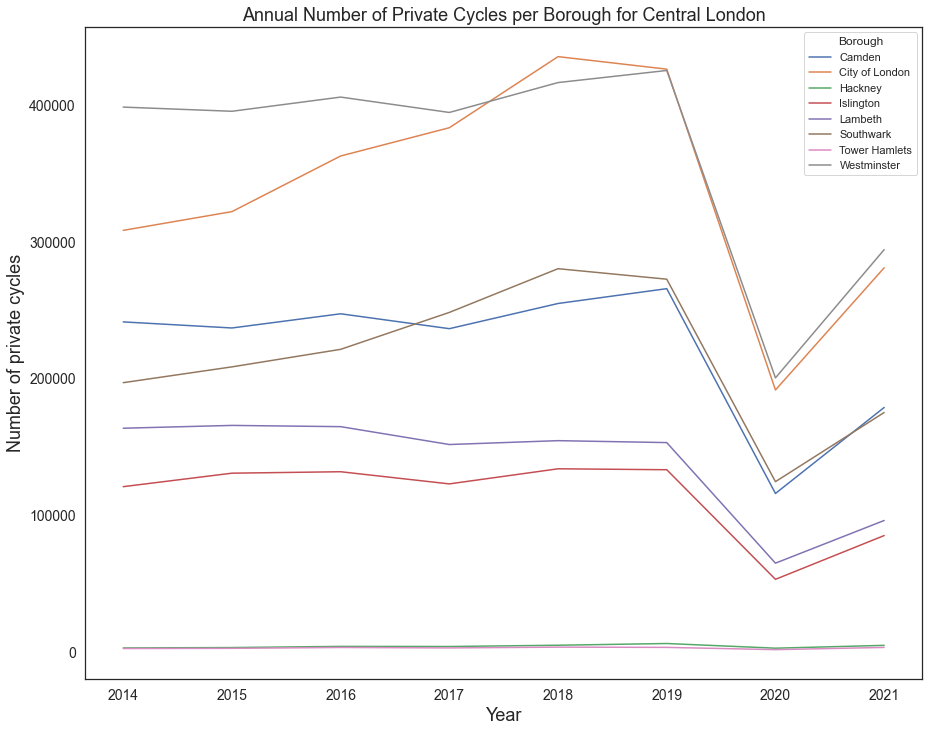

In [31]:
nc_cent_boro = sns.lineplot(x='Year', y='Number of private cycles',
                        hue='Borough', data=borough_group , ci=None)

nc_cent_boro.legend(title='Borough', loc='upper right')
nc_cent_boro.set_xlabel('Year')
nc_cent_boro.set_ylabel('Number of private cycles')
nc_cent_boro.set_title("Annual Number of Private Cycles per Borough for Central London")
nc_cent_boro.title.set_fontsize(18)
nc_cent_boro.xaxis.label.set_fontsize(18)
nc_cent_boro.yaxis.label.set_fontsize(18)

for label in (nc_cent_boro.get_xticklabels() + nc_cent_boro.get_yticklabels()):
    label.set_fontsize(14)

plt.savefig('nc_cent_boro.png')

In [32]:
plt.savefig('nc_cent_boro.png')

<Figure size 1080x864 with 0 Axes>

Can see the increase in total private cyckes per year for each central borough. note the significant drop off during 2020 due to Covid-19. 

Signs that there was already good progress being made to increasing cycling numbers between 2014 and 2019 - though looking at the % shows this change has not been that drastic. 

More work could be done to improve Hackney and Tower Hamlets - perhaps other group members found somethis which indicates why there is a problem there.

### Look at central london / boroughs in more detail - look at specific locations

In [33]:
# find the top ten locations for private cycles
loc_pvt = borough_ss.groupby(['Location']).sum().reset_index()\
.sort_values(by = 'Number of private cycles', ascending=False)

loc_pvt.head(10)

Location  Number of private cycles  \
20                          Borough High Street                    266042   
101                               London Bridge                    236443   
120                           New Bridge Street                    222327   
15                           Blackfriars Bridge                    221656   
189  Victoria Embankment (by Cleopatras Needle)                    205726   
169                                      Temple                    204051   
53                            Farringdon Street                    186708   
193                             Waterloo Bridge                    184199   
22                                Bridge Street                    177063   
110      Millbank (north of Great Peter Street)                    161740   

     Number of cycle hire bikes  Total_cycles  
20                        12794      278836.0  
101                       17095      253538.0  
120                       26497      248824.0  
15                        36960      258616.0  
189                       23435      229161.0  
169                       24790      228841.0  
53                        18306      205014.0  
193                       23030      207229.0  
22                        24839      201902.0  
110                       13106      174846.0

In [34]:
# Created a subset only looking at the top ten locations 
pvt_ten = borough_ss[(borough_ss['Location'].isin(['Borough High Street', 'London Bridge', 'New Bridge Street', 
                                                   'Blackfriars Bridge', 'Victoria Embankment (by Cleopatras Needle)',
                                                   'Temple', 'Farringdon Street', 'Waterloo Bridge', 
                                                   'Bridge Street', 'Millbank (north of Great Peter Street)']))]

pvt_ten.head()

Location      Borough  \
44162  Victoria Embankment (by Cleopatras Needle)  Westminster   
44163  Victoria Embankment (by Cleopatras Needle)  Westminster   
44164  Victoria Embankment (by Cleopatras Needle)  Westminster   
44165  Victoria Embankment (by Cleopatras Needle)  Westminster   
44166  Victoria Embankment (by Cleopatras Needle)  Westminster   

      Functional cycling area Year-Quarter  Number of private cycles  \
44162                 Central      2014-Q1                        11   
44163                 Central      2014-Q1                        15   
44164                 Central      2014-Q1                        34   
44165                 Central      2014-Q1                        45   
44166                 Central      2014-Q1                        51   

       Number of cycle hire bikes  Total_cycles  
44162                           3          14.0  
44163                           1          16.0  
44164                           3          37.0  
44165                           4          49.0  
44166                           2          53.0

In [35]:
# Grouped to see there number of cycles per quarter
top_ten_loc = pvt_ten.groupby(['Year-Quarter', 'Location']).sum().reset_index()

top_ten_loc.head()

Year-Quarter             Location  Number of private cycles  \
0      2014-Q1   Blackfriars Bridge                      6144   
1      2014-Q1  Borough High Street                      6855   
2      2014-Q1        Bridge Street                      5136   
3      2014-Q1    Farringdon Street                      4669   
4      2014-Q1        London Bridge                      6621   

   Number of cycle hire bikes  Total_cycles  
0                         874        7018.0  
1                         244        7099.0  
2                         473        5609.0  
3                         364        5033.0  
4                         385        7006.0

In [36]:
# Subset for relevant dates 
top_ten_dates = top_ten_loc.loc[top_ten_loc['Year-Quarter'].between('2014-Q1', '2019-Q4')]
top_ten_dates

Year-Quarter                                    Location  \
0        2014-Q1                          Blackfriars Bridge   
1        2014-Q1                         Borough High Street   
2        2014-Q1                               Bridge Street   
3        2014-Q1                           Farringdon Street   
4        2014-Q1                               London Bridge   
..           ...                                         ...   
234      2019-Q4      Millbank (north of Great Peter Street)   
235      2019-Q4                           New Bridge Street   
236      2019-Q4                                      Temple   
237      2019-Q4  Victoria Embankment (by Cleopatras Needle)   
238      2019-Q4                             Waterloo Bridge   

     Number of private cycles  Number of cycle hire bikes  Total_cycles  
0                        6144                         874        7018.0  
1                        6855                         244        7099.0  
2                        5136                         473        5609.0  
3                        4669                         364        5033.0  
4                        6621                         385        7006.0  
..                        ...                         ...           ...  
234                      3440                         198        3638.0  
235                      5212                         857        6069.0  
236                      9288                        1373       10661.0  
237                      9014                        1146       10160.0  
238                      5394                         793        6187.0  

[239 rows x 5 columns]

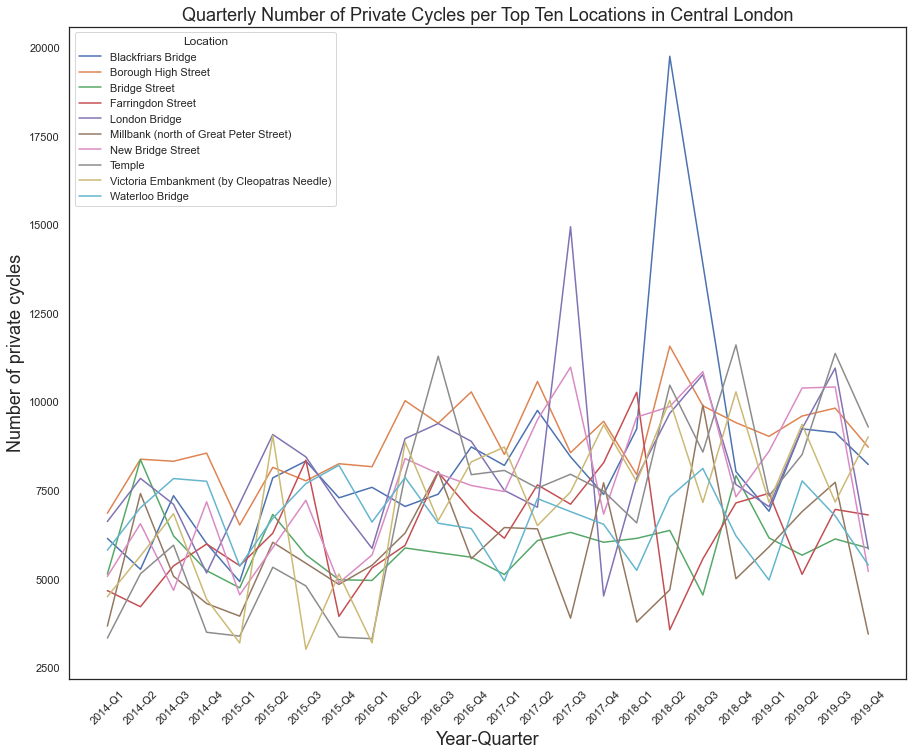

In [37]:
# Plot graph showing the trends over time
nc_cent_pvt = sns.lineplot(x='Year-Quarter', y='Number of private cycles',
                        hue='Location', data=top_ten_dates , ci=None)

nc_cent_pvt.legend(title='Location', loc='upper left')
nc_cent_pvt.set_xlabel('Year-Quarter')
nc_cent_pvt.set_ylabel('Number of private cycles')
nc_cent_pvt.set_title("Quarterly Number of Private Cycles per Top Ten Locations in Central London")
nc_cent_pvt.title.set_fontsize(18)
nc_cent_pvt.xaxis.label.set_fontsize(18)
nc_cent_pvt.yaxis.label.set_fontsize(18)


plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.savefig('nc_cent_pvt.png')

Can see there is a general seasonality trend in each of the locations - not surpising that people would cycle less in the colder / wetter months. 

What caused the huge spike in cycling numbers in 2017 for London Bridge and in 2018 for Blackfriars Bridge.


Blackfrairs bridge included a cycling highway in 2016 and it was reported by the TFL that cycling number had increased by 55% https://www.london-se1.co.uk/news/view/8851 

New superhighway was completed in September 2018 meaning you could cycle from Kings Cross to Elephant and Castle - and passed through BlackFrairs. This extension of the superhighway might be a significant contribution to why there was a major spike in cycling traffic in blackfrairs in 2018. Though in 2019 there was a drop off for a similar time period - perhaps other locations also had introductions of cycling lanes etc which meant that not as much traffic was required to filter through blackfrairs. Does seem to suggest that investing in infrastructure will have a positive impact on cycling traffic. 

https://www.london.gov.uk/press-releases/mayoral/major-new-cycle-superhighway-extension-opens 

In [38]:
bridges = top_ten_dates[(top_ten_dates['Location'].isin(['Blackfriars Bridge']))]
bridges.head()

Year-Quarter            Location  Number of private cycles  \
0       2014-Q1  Blackfriars Bridge                      6144   
10      2014-Q2  Blackfriars Bridge                      5271   
20      2014-Q3  Blackfriars Bridge                      7350   
30      2014-Q4  Blackfriars Bridge                      5999   
40      2015-Q1  Blackfriars Bridge                      4926   

    Number of cycle hire bikes  Total_cycles  
0                          874        7018.0  
10                         977        6248.0  
20                        1482        8832.0  
30                        1068        7067.0  
40                         621        5547.0

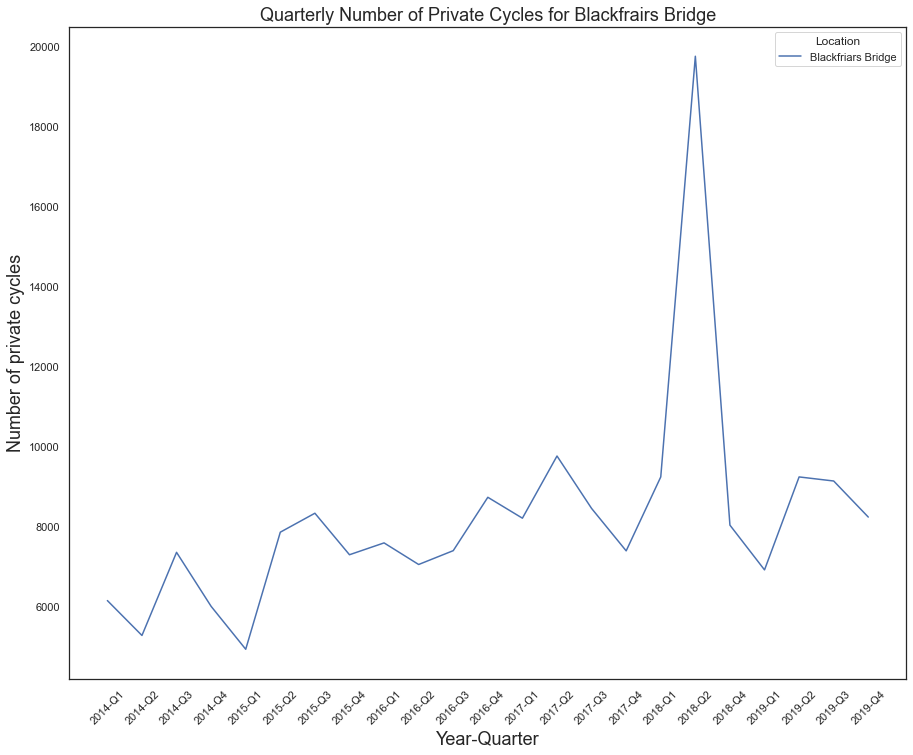

In [39]:
# Plot graph showing the trends over time
nc_bridges = sns.lineplot(x='Year-Quarter', y='Number of private cycles',
                        hue='Location', data=bridges , ci=None)

nc_bridges.legend(title='Location', loc='upper right')
nc_bridges.set_xlabel('Year-Quarter')
nc_bridges.set_ylabel('Number of private cycles')
nc_bridges.set_title("Quarterly Number of Private Cycles for Blackfrairs Bridge")
nc_bridges.title.set_fontsize(18)
nc_bridges.xaxis.label.set_fontsize(18)
nc_bridges.yaxis.label.set_fontsize(18)

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.savefig('nc_bridges.png')

In [40]:
# Look at the bottom locations for private cycles
loc_pvt.tail(10)

Location  Number of private cycles  Number of cycle hire bikes  \
113      Montagu Place                      7081                        1666   
45      Deanery Street                      6804                        1508   
51   Emery Hill Street                      6727                        1756   
140   Princeton Street                      6651                        1363   
76     Hastings Street                      6281                         567   
146     Roupell Street                      5999                        1725   
49        Eagle Street                      5045                         364   
147       Saffron Hill                      4364                         414   
132        Park Street                      3609                         977   
162      Stanhope Gate                      2184                         770   

     Total_cycles  
113        8747.0  
45         8312.0  
51         8483.0  
140        8014.0  
76         6848.0  
146        7724.0  
49         5409.0  
147        4778.0  
132        4586.0  
162        2954.0

In [41]:
pvt_btm_ten = borough_ss[(borough_ss['Location'].isin(['Montagu Place', 'Deanery Street', 'Emery Hill Street', 
                                                 'Princeton Street', 'Hastings Street', 'Roupell Street', 
                                                 'Eagle Street', 'Saffron Hill', 'Park Street', 
                                                 'Stanhope Gate']))].reset_index()

pvt_btm_ten

index           Location      Borough Functional cycling area  \
0      594771  Emery Hill Street  Westminster                 Central   
1      594772  Emery Hill Street  Westminster                 Central   
2      594773  Emery Hill Street  Westminster                 Central   
3      594774  Emery Hill Street  Westminster                 Central   
4      594775  Emery Hill Street  Westminster                 Central   
...       ...                ...          ...                     ...   
36987  698318    Hastings Street       Camden                 Central   
36988  698319    Hastings Street       Camden                 Central   
36989  698320    Hastings Street       Camden                 Central   
36990  698321    Hastings Street       Camden                 Central   
36991  698322    Hastings Street       Camden                 Central   

      Year-Quarter  Number of private cycles  Number of cycle hire bikes  \
0          2014-Q1                         0                           0   
1          2014-Q1                         0                           0   
2          2014-Q1                         0                           0   
3          2014-Q1                         0                           0   
4          2014-Q1                         1                           0   
...            ...                       ...                         ...   
36987      2021-Q4                         0                           0   
36988      2021-Q4                         1                           0   
36989      2021-Q4                         4                           0   
36990      2021-Q4                         2                           0   
36991      2021-Q4                         1                           0   

       Total_cycles  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               1.0  
...             ...  
36987           0.0  
36988           1.0  
36989           4.0  
36990           2.0  
36991           1.0  

[36992 rows x 8 columns]

In [42]:
# Grouped per quarter oer location 
btm_ten_loc = pvt_btm_ten.groupby(['Year-Quarter', 'Location']).sum().reset_index()
btm_ten_loc.head()

Year-Quarter           Location     index  Number of private cycles  \
0      2014-Q1     Deanery Street  81332544                       203   
1      2014-Q1       Eagle Street  87968064                       280   
2      2014-Q1  Emery Hill Street  76138816                       154   
3      2014-Q1    Hastings Street  88918336                       155   
4      2014-Q1      Montagu Place  87017792                       199   

   Number of cycle hire bikes  Total_cycles  
0                          27         230.0  
1                           2         282.0  
2                          46         200.0  
3                          10         165.0  
4                          56         255.0

In [43]:
# Subsetted for relevant dates
btm_ten_dates = btm_ten_loc.loc[btm_ten_loc['Year-Quarter'].between('2014-Q1', '2019-Q4')]
btm_ten_dates

Year-Quarter           Location     index  Number of private cycles  \
0        2014-Q1     Deanery Street  81332544                       203   
1        2014-Q1       Eagle Street  87968064                       280   
2        2014-Q1  Emery Hill Street  76138816                       154   
3        2014-Q1    Hastings Street  88918336                       155   
4        2014-Q1      Montagu Place  87017792                       199   
..           ...                ...       ...                       ...   
223      2019-Q4        Park Street  82643264                       183   
224      2019-Q4   Princeton Street  87869760                       204   
225      2019-Q4     Roupell Street  79808832                       357   
226      2019-Q4       Saffron Hill  85494080                       254   
227      2019-Q4      Stanhope Gate  82168128                        54   

     Number of cycle hire bikes  Total_cycles  
0                            27         230.0  
1                             2         282.0  
2                            46         200.0  
3                            10         165.0  
4                            56         255.0  
..                          ...           ...  
223                          56         239.0  
224                          37         241.0  
225                         141         498.0  
226                          32         286.0  
227                          24          78.0  

[228 rows x 6 columns]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

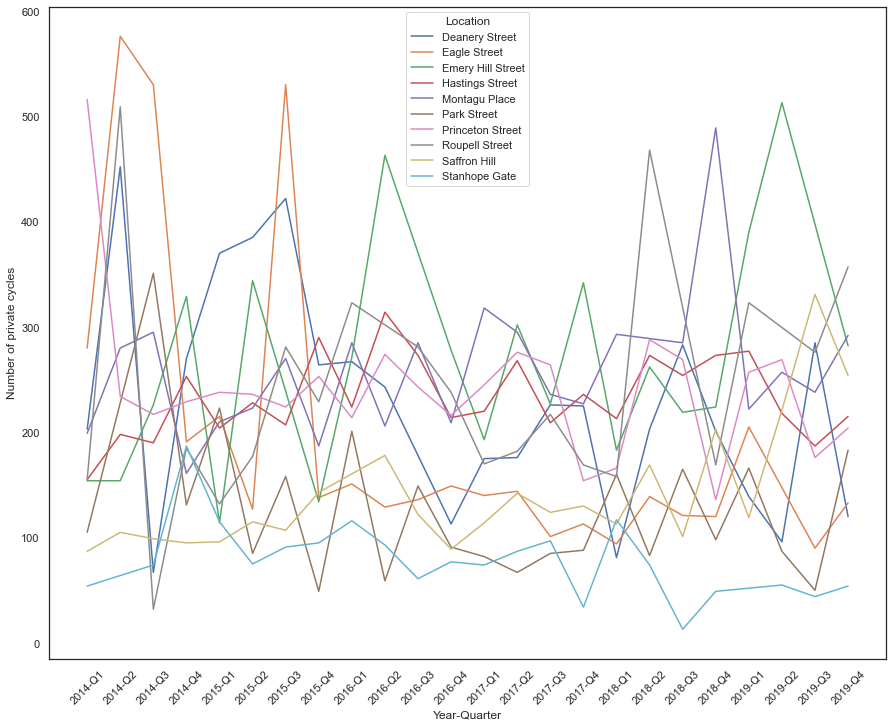

In [44]:
nc_btm_ten = sns.lineplot(x='Year-Quarter', y='Number of private cycles',
                        hue='Location', data=btm_ten_dates, ci=None)

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

Can see seasonality is still influental in the bottom locations with similar peaks and drops amongst the locs.

Less of a closer grouping than we saw in the top ten which generally all experienced an overall increase during the same time period - same can not be said here. 

In [45]:
# Look at relevant boroughs
pvt_btm_ten.groupby(['Borough']).sum().reset_index()

Borough        index  Number of private cycles  \
0       Camden  10162008320                     22341   
1      Lambeth   2310179904                      5999   
2  Westminster  11799327744                     26405   

   Number of cycle hire bikes  Total_cycles  
0                        2708       25049.0  
1                        1725        7724.0  
2                        6677       33082.0

The bottom ten locations are all in either Camden, Lambeth and Westminster - would have expected these to be in either Hackney or Tower Hamlets - all of these boroughs whilst not the top generally have significant private cycling numbers. Perhaps there isn't a major issue and there are just slightly better cycling routes in these locations. 

## Look at hire cycles

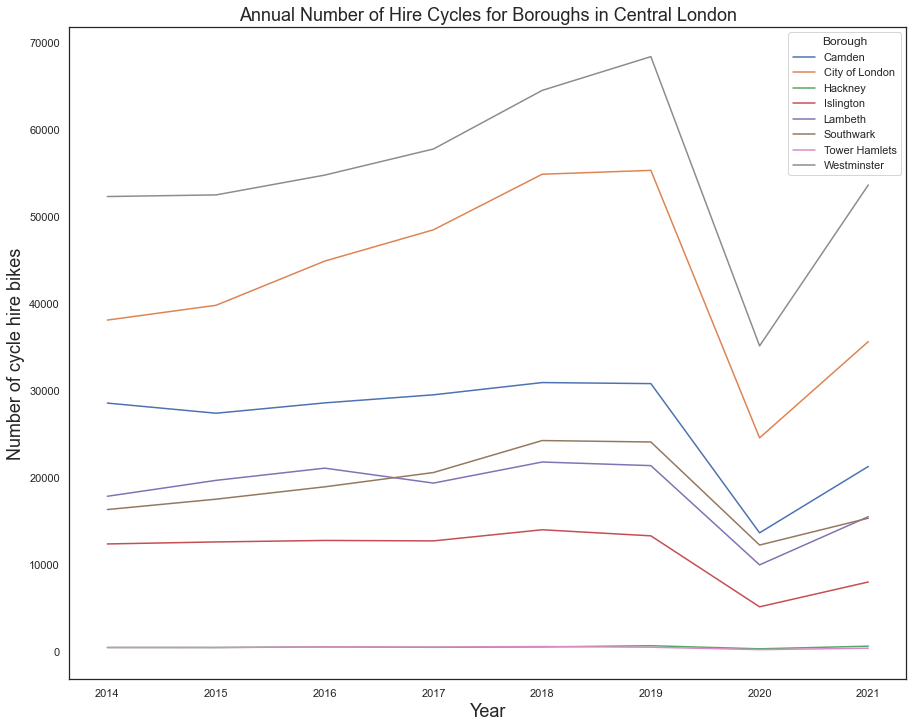

In [46]:
nc_cent_hire = sns.lineplot(x='Year', y='Number of cycle hire bikes',
                        hue='Borough', data=borough_group , ci=None)

nc_cent_hire.legend(title='Borough', loc='upper right')
nc_cent_hire.set_xlabel('Year')
nc_cent_hire.set_ylabel('Number of cycle hire bikes')
nc_cent_hire.set_title("Annual Number of Hire Cycles for Boroughs in Central London")
nc_cent_hire.title.set_fontsize(18)
nc_cent_hire.xaxis.label.set_fontsize(18)
nc_cent_hire.yaxis.label.set_fontsize(18)

plt.savefig('nc_cent_hire.png')

In [47]:
loc_hire = borough_ss.groupby(['Location']).sum().reset_index()\
.sort_values(by = 'Number of cycle hire bikes', ascending=False)

loc_hire.head(10)

Location  \
15                                  Blackfriars Bridge   
158                                   Southwark Street   
120                                  New Bridge Street   
22                                       Bridge Street   
169                                             Temple   
72                        Green Park (cycle lane only)   
189         Victoria Embankment (by Cleopatras Needle)   
193                                    Waterloo Bridge   
174                                           The Mall   
188  Victoria Embankment (between Derby Gate and We...   

     Number of private cycles  Number of cycle hire bikes  Total_cycles  
15                     221656                       36960      258616.0  
158                    138510                       28471      166981.0  
120                    222327                       26497      248824.0  
22                     177063                       24839      201902.0  
169                    204051                       24790      228841.0  
72                      71790                       24606       96396.0  
189                    205726                       23435      229161.0  
193                    184199                       23030      207229.0  
174                    120554                       22611      143165.0  
188                    149221                       21230      170451.0

In [48]:
hire_ten = borough_ss[(borough_ss['Location'].isin(['Blackfrairs Bridge', 'Southwark Street', 'New Bridge Street',
                                                'Bridge Street', 'Temple', 'Green Park (cycle lane only)',
                                                'Victoria Embankment (by Cleopatras Needle)',
                                                'Waterloo Bridge', 'The Mall', 
                                                'Victoria Embankment (between Derby Gate and Westminster Bridge)']))]

hire_ten

Location      Borough  \
44162   Victoria Embankment (by Cleopatras Needle)  Westminster   
44163   Victoria Embankment (by Cleopatras Needle)  Westminster   
44164   Victoria Embankment (by Cleopatras Needle)  Westminster   
44165   Victoria Embankment (by Cleopatras Needle)  Westminster   
44166   Victoria Embankment (by Cleopatras Needle)  Westminster   
...                                            ...          ...   
731598                Green Park (cycle lane only)  Westminster   
731599                Green Park (cycle lane only)  Westminster   
731600                Green Park (cycle lane only)  Westminster   
731601                Green Park (cycle lane only)  Westminster   
731602                Green Park (cycle lane only)  Westminster   

       Functional cycling area Year-Quarter  Number of private cycles  \
44162                  Central      2014-Q1                        11   
44163                  Central      2014-Q1                        15   
44164                  Central      2014-Q1                        34   
44165                  Central      2014-Q1                        45   
44166                  Central      2014-Q1                        51   
...                        ...          ...                       ...   
731598                 Central      2021-Q4                        21   
731599                 Central      2021-Q4                        20   
731600                 Central      2021-Q4                        18   
731601                 Central      2021-Q4                        16   
731602                 Central      2021-Q4                        15   

        Number of cycle hire bikes  Total_cycles  
44162                            3          14.0  
44163                            1          16.0  
44164                            3          37.0  
44165                            4          49.0  
44166                            2          53.0  
...                            ...           ...  
731598                           3          24.0  
731599                           3          23.0  
731600                           2          20.0  
731601                           2          18.0  
731602                           3          18.0  

[36864 rows x 7 columns]

In [49]:
top_ten_hire = hire_ten.groupby(['Year-Quarter', 'Location']).sum().reset_index()

top_ten_hire.head()

Year-Quarter                      Location  Number of private cycles  \
0      2014-Q1                 Bridge Street                      5136   
1      2014-Q1  Green Park (cycle lane only)                      1217   
2      2014-Q1             New Bridge Street                      5070   
3      2014-Q1              Southwark Street                      5025   
4      2014-Q1                        Temple                      3329   

   Number of cycle hire bikes  Total_cycles  
0                         473        5609.0  
1                         224        1441.0  
2                         546        5616.0  
3                         932        5957.0  
4                         252        3581.0

In [50]:
top_hire_dates = top_ten_hire.loc[btm_ten_loc['Year-Quarter'].between('2014-Q1', '2019-Q4')]
top_hire_dates.head()

Year-Quarter                      Location  Number of private cycles  \
0      2014-Q1                 Bridge Street                      5136   
1      2014-Q1  Green Park (cycle lane only)                      1217   
2      2014-Q1             New Bridge Street                      5070   
3      2014-Q1              Southwark Street                      5025   
4      2014-Q1                        Temple                      3329   

   Number of cycle hire bikes  Total_cycles  
0                         473        5609.0  
1                         224        1441.0  
2                         546        5616.0  
3                         932        5957.0  
4                         252        3581.0

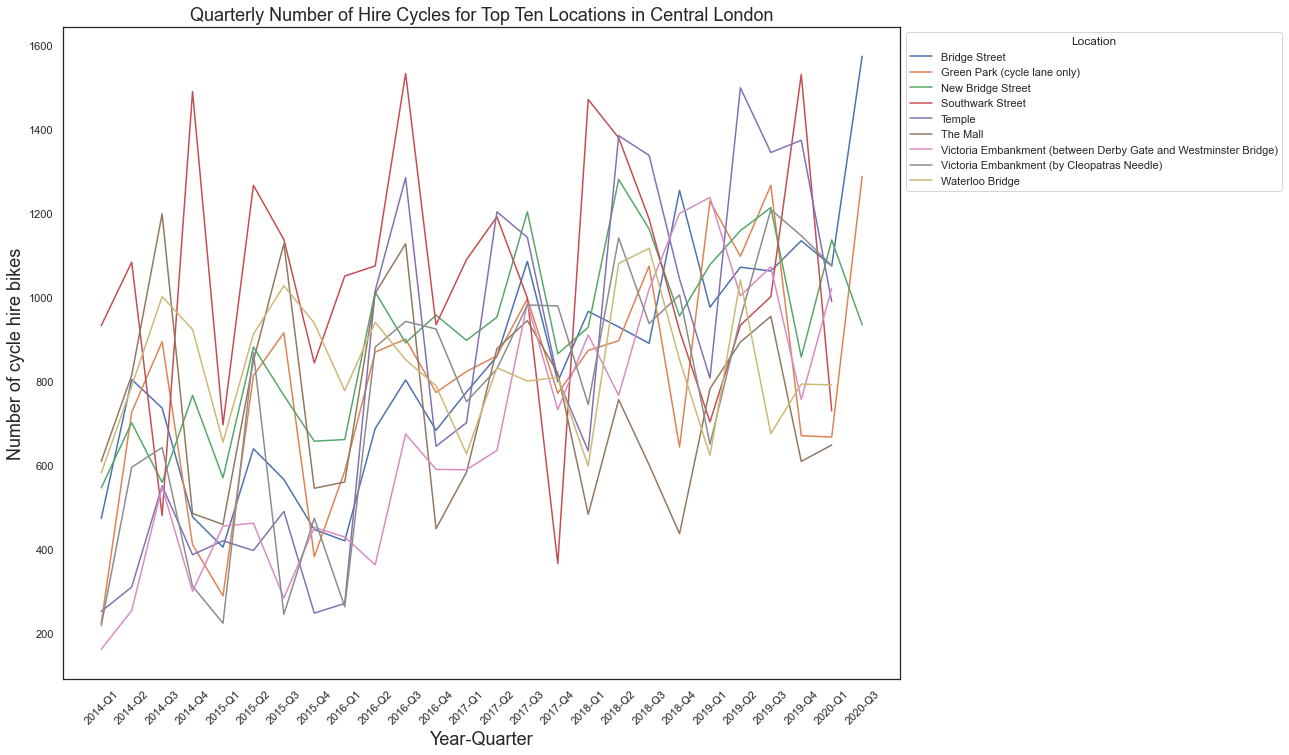

In [51]:
nc_ten_hire = sns.lineplot(x='Year-Quarter', y='Number of cycle hire bikes',
                        hue='Location', data=top_hire_dates , ci=None)

nc_ten_hire.legend(title='Location', bbox_to_anchor=(1, 1))
nc_ten_hire.set_xlabel('Year-Quarter')
nc_ten_hire.set_ylabel('Number of cycle hire bikes')
nc_ten_hire.set_title("Quarterly Number of Hire Cycles for Top Ten Locations in Central London")
nc_ten_hire.title.set_fontsize(18)
nc_ten_hire.xaxis.label.set_fontsize(18)
nc_ten_hire.yaxis.label.set_fontsize(18)

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.savefig('nc_ten_hire.png')

In [52]:
hire_ten.groupby(['Borough']).sum().reset_index()

Borough  Number of private cycles  Number of cycle hire bikes  \
0  City of London                    426378                       51287   
1         Lambeth                    184199                       23030   
2       Southwark                    138510                       28471   
3     Westminster                    724354                      116721   

   Total_cycles  
0      477665.0  
1      207229.0  
2      166981.0  
3      841075.0

Interestingly Lambeth and Westmister feature in the boroughs for the most hire cycles - first it is important to note that these are highly populated. But interestingly they were two of the three for the lowest private cycles. Have people tended to switch their mode of cycling. 


Cycle hire scheme really seemed to take off in post 2016 - where record numbers was recorded. Noted in the below column that more bikes and doking stations were made available - infering to an increase in infrastructure. 

Also, that in 2014 Santander took over the sponsorship of the bikes from Barcleys and seem to have developed a tangible image of what the hire bikes look like - seems to have been a sponsorship which has worked. 

Additionally, 2014 is around the time when Phase 1 of the introduction of cycle hire bikes ended - TFL might have learn their lessons and how to progress better in the future which might be responsible for the increased numbers. Particularly operational lessons. 

https://cyclingindustry.news/10-3-million-trips-makes-2016-a-record-breaking-year-for-london-cycle-hire/

https://content.tfl.gov.uk/fpc-20141014-part-1-item-14-cycle-hire-imp-chei-close.pdf - go to page 7 for lessons learn from phase 1. 

In [53]:
loc_hire.tail(10)

Location  Number of private cycles  \
162                 Stanhope Gate                      2184   
44   Crucifix Lane (Druid Street)                      7470   
69            Great Ormond Street                     10530   
100            Lloyd Baker Street                     19082   
74                Greville Street                      7125   
76                Hastings Street                      6281   
99                    Lime Street                      8888   
199                 Weston Street                     19395   
147                  Saffron Hill                      4364   
49                   Eagle Street                      5045   

     Number of cycle hire bikes  Total_cycles  
162                         770        2954.0  
44                          719        8189.0  
69                          636       11166.0  
100                         626       19708.0  
74                          580        7705.0  
76                          567        6848.0  
99                          513        9401.0  
199                         501       19896.0  
147                         414        4778.0  
49                          364        5409.0

In [54]:
hire_btm_ten = borough_ss[(borough_ss['Location'].isin(['Stanhope Gate', 'Crucifix Lane (Druid Street)', 
                                                  'Great Ormond Street', 'Lloyd Baker Street',
                                                 'Greville Street', 'Hastings Street',
                                                'Lime Street', 'Weston Street'
                                                'Saffron Hill', 'Eagle Street']))]

hire_btm_ten.head()

Location    Borough Functional cycling area  \
350722  Crucifix Lane (Druid Street)  Southwark                 Central   
350723  Crucifix Lane (Druid Street)  Southwark                 Central   
350724  Crucifix Lane (Druid Street)  Southwark                 Central   
350725  Crucifix Lane (Druid Street)  Southwark                 Central   
350726  Crucifix Lane (Druid Street)  Southwark                 Central   

       Year-Quarter  Number of private cycles  Number of cycle hire bikes  \
350722      2014-Q1                         0                           0   
350723      2014-Q1                         0                           0   
350724      2014-Q1                         0                           0   
350725      2014-Q1                         0                           0   
350726      2014-Q1                         0                           0   

        Total_cycles  
350722           0.0  
350723           0.0  
350724           0.0  
350725           0.0  
350726           0.0

In [55]:
btm_ten_hire = hire_btm_ten.groupby(['Year-Quarter', 'Location']).sum().reset_index()
btm_ten_hire.head()

Year-Quarter                      Location  Number of private cycles  \
0      2014-Q1  Crucifix Lane (Druid Street)                       214   
1      2014-Q1                  Eagle Street                       280   
2      2014-Q1           Great Ormond Street                       301   
3      2014-Q1               Greville Street                       160   
4      2014-Q1               Hastings Street                       155   

   Number of cycle hire bikes  Total_cycles  
0                           4         218.0  
1                           2         282.0  
2                          10         311.0  
3                          10         170.0  
4                          10         165.0

In [56]:
btm_hire_dates = btm_ten_hire.loc[btm_ten_loc['Year-Quarter'].between('2014-Q1', '2019-Q4')]
btm_hire_dates.head()

Year-Quarter                      Location  Number of private cycles  \
0      2014-Q1  Crucifix Lane (Druid Street)                       214   
1      2014-Q1                  Eagle Street                       280   
2      2014-Q1           Great Ormond Street                       301   
3      2014-Q1               Greville Street                       160   
4      2014-Q1               Hastings Street                       155   

   Number of cycle hire bikes  Total_cycles  
0                           4         218.0  
1                           2         282.0  
2                          10         311.0  
3                          10         170.0  
4                          10         165.0

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

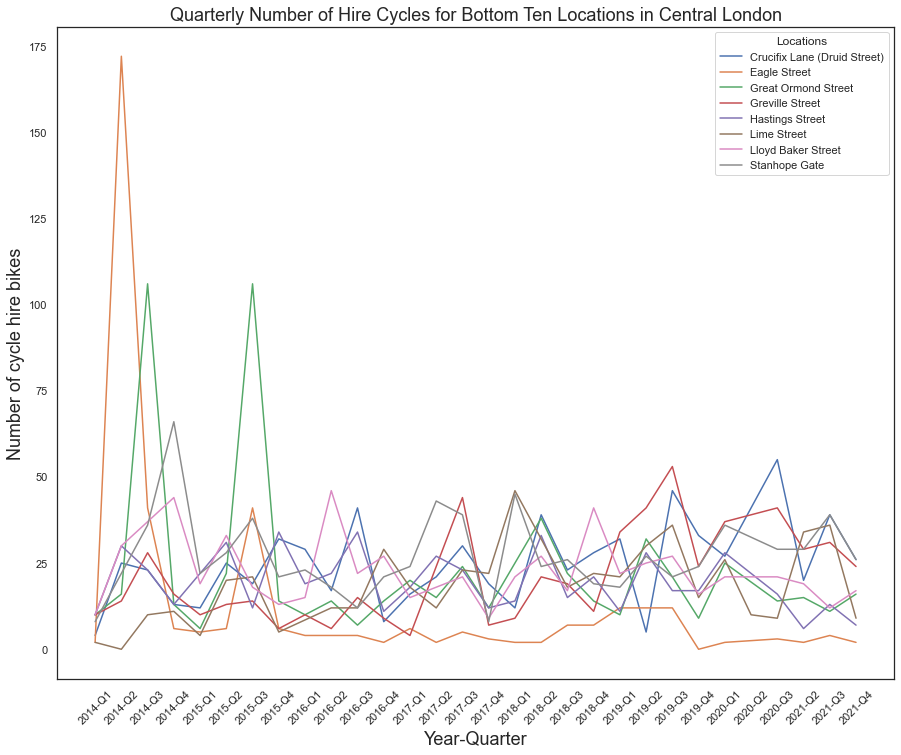

In [57]:
nc_btm_hire = sns.lineplot(x='Year-Quarter', y='Number of cycle hire bikes',
                        hue='Location', data=btm_hire_dates , ci=None)

nc_btm_hire.legend(title='Locations', loc='upper right')
nc_btm_hire.set_xlabel('Year-Quarter')
nc_btm_hire.set_ylabel('Number of cycle hire bikes')
nc_btm_hire.set_title("Quarterly Number of Hire Cycles for Bottom Ten Locations in Central London")
nc_btm_hire.title.set_fontsize(18)
nc_btm_hire.xaxis.label.set_fontsize(18)
nc_btm_hire.yaxis.label.set_fontsize(18)

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

In [58]:
quarter_totals = borough_ss.groupby('Year-Quarter').sum().reset_index()
quarter_totals

Year-Quarter  Number of private cycles  Number of cycle hire bikes  \
0       2014-Q1                    313033                       31007   
1       2014-Q2                    394208                       45986   
2       2014-Q3                    384909                       50467   
3       2014-Q4                    344211                       39176   
4       2015-Q1                    319373                       34255   
5       2015-Q2                    412879                       49213   
6       2015-Q3                    393957                       47843   
7       2015-Q4                    340320                       39303   
8       2016-Q1                    347094                       38035   
9       2016-Q2                    389543                       45274   
10      2016-Q3                    410063                       53581   
11      2016-Q4                    395840                       45412   
12      2017-Q1                    364602                       42614   
13      2017-Q2                    375268                       45917   
14      2017-Q3                    443208                       57490   
15      2017-Q4                    362629                       43627   
16      2018-Q1                    361091                       42445   
17      2018-Q2                    470620                       61436   
18      2018-Q3                    437813                       56610   
19      2018-Q4                    415985                       51182   
20      2019-Q1                    397558                       49122   
21      2019-Q2                    431436                       54988   
22      2019-Q3                    463404                       61163   
23      2019-Q4                    394941                       49389   
24      2020-Q1                    393693                       49914   
25      2020-Q2                      5353                         762   
26      2020-Q3                    356081                       50661   
27      2020-Q4                       261                          27   
28      2021-Q2                    324673                       39945   
29      2021-Q3                    421636                       62530   
30      2021-Q4                    373109                       48066   

    Total_cycles  
0       344040.0  
1       440194.0  
2       435376.0  
3       383387.0  
4       353628.0  
5       462092.0  
6       441800.0  
7       379623.0  
8       385129.0  
9       434817.0  
10      463644.0  
11      441252.0  
12      407216.0  
13      421185.0  
14      500698.0  
15      406256.0  
16      403536.0  
17      532056.0  
18      494423.0  
19      467167.0  
20      446680.0  
21      486424.0  
22      524567.0  
23      444330.0  
24      443607.0  
25        6115.0  
26      406742.0  
27         288.0  
28      364618.0  
29      484166.0  
30      421175.0

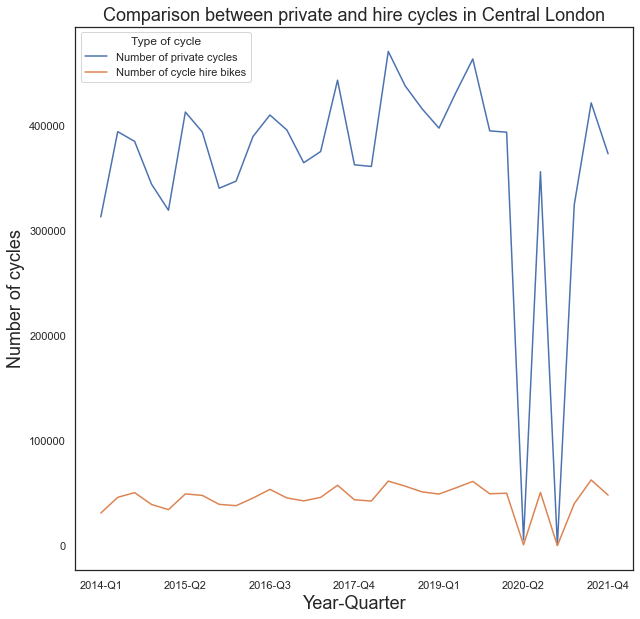

In [59]:
nc_quarter = quarter_totals.plot(x='Year-Quarter', y=['Number of private cycles', 'Number of cycle hire bikes'],
                                         kind='line', figsize=(10,10))



nc_quarter.legend(title='Type of cycle', loc='upper left')
nc_quarter.set_xlabel('Year-Quarter')
nc_quarter.set_ylabel('Number of cycles')
nc_quarter.set_title("Comparison between private and hire cycles in Central London")
nc_quarter.title.set_fontsize(18)
nc_quarter.xaxis.label.set_fontsize(18)
nc_quarter.yaxis.label.set_fontsize(18)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

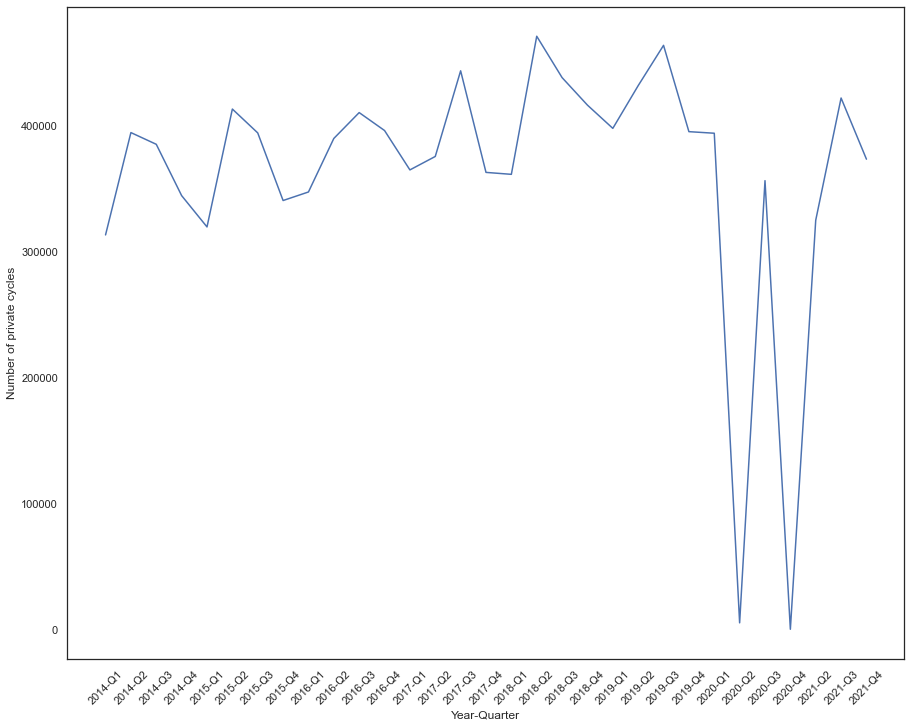

In [60]:
nc_pvt_totals = sns.lineplot(x='Year-Quarter', y='Number of private cycles', data=quarter_totals , ci=None)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degree

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

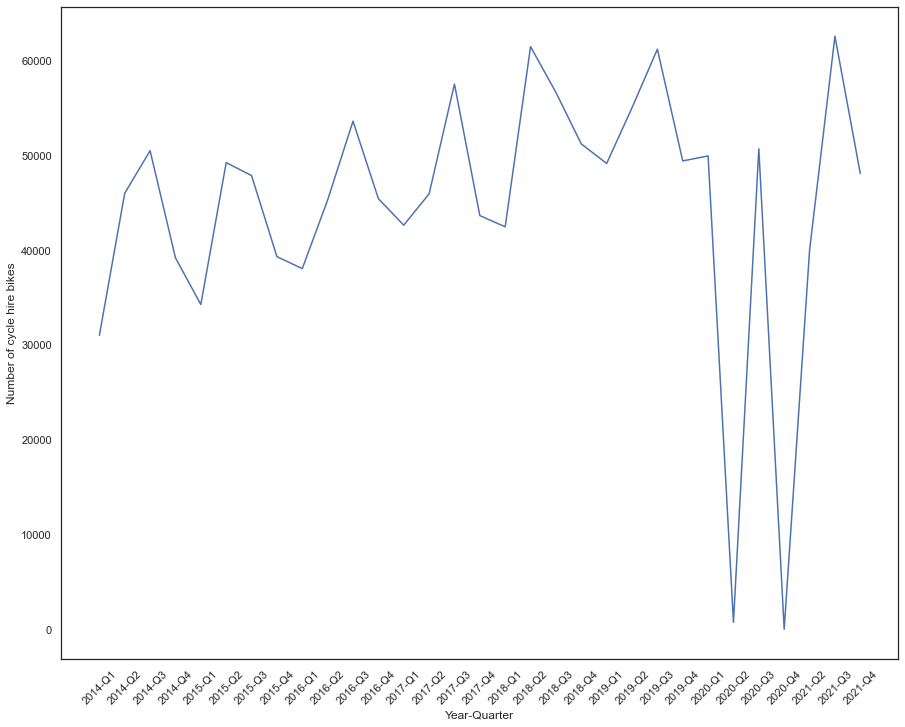

In [61]:
nc_pvt_totals = sns.lineplot(x='Year-Quarter', y='Number of cycle hire bikes', data=quarter_totals , ci=None)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degree

In [62]:
# Read the provided CSV file/data set.            
outer = pd.read_csv('london_outer_cl.csv')
outer.head()

Unnamed: 0  Survey wave (year)   Site ID          Location    Survey date  \
0           0                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
1           1                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
2           2                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
3           3                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
4           4                2015  OUTCY001  High Road Leyton  ven, 26/06/15   

  Weather         Time                       Period   Direction  Start hour  \
0     Dry  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
1     Dry  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
2     Dry  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
3     Dry  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
4     Dry  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

   Start minute  Number of male cycles  Number of female cycles  \
0             0                      2                        1   
1            15                      3                        0   
2            30                      2                        0   
3            45                      4                        0   
4             0                      4                        1   

   Number of unknown cycles  Total cycles        Date     Day Month Quarter  
0                         0             3  2015-06-26  Friday  June      Q2  
1                         0             3  2015-06-26  Friday  June      Q2  
2                         0             2  2015-06-26  Friday  June      Q2  
3                         0             4  2015-06-26  Friday  June      Q2  
4                         0             5  2015-06-26  Friday  June      Q2

In [63]:
borough_lo = pd.merge(outer,
                 london_sites[['Site ID', 'Borough', 'Functional cycling area']],
                 on='Site ID')
borough_lo.head()

Unnamed: 0  Survey wave (year)   Site ID          Location    Survey date  \
0           0                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
1           1                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
2           2                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
3           3                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
4           4                2015  OUTCY001  High Road Leyton  ven, 26/06/15   

  Weather         Time                       Period   Direction  Start hour  \
0     Dry  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
1     Dry  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
2     Dry  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
3     Dry  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
4     Dry  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

   ...  Number of male cycles  Number of female cycles  \
0  ...                      2                        1   
1  ...                      3                        0   
2  ...                      2                        0   
3  ...                      4                        0   
4  ...                      4                        1   

   Number of unknown cycles  Total cycles        Date     Day Month Quarter  \
0                         0             3  2015-06-26  Friday  June      Q2   
1                         0             3  2015-06-26  Friday  June      Q2   
2                         0             2  2015-06-26  Friday  June      Q2   
3                         0             4  2015-06-26  Friday  June      Q2   
4                         0             5  2015-06-26  Friday  June      Q2   

          Borough Functional cycling area  
0  Waltham Forest                   Outer  
1  Waltham Forest                   Outer  
2  Waltham Forest                   Outer  
3  Waltham Forest                   Outer  
4  Waltham Forest                   Outer  

[5 rows x 21 columns]

In [64]:
borough_lo = borough_lo.drop(['Unnamed: 0'], axis=1)
borough_lo.head()

Survey wave (year)   Site ID          Location    Survey date Weather  \
0                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
1                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
2                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
3                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
4                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

   Start minute  Number of male cycles  Number of female cycles  \
0             0                      2                        1   
1            15                      3                        0   
2            30                      2                        0   
3            45                      4                        0   
4             0                      4                        1   

   Number of unknown cycles  Total cycles        Date     Day Month Quarter  \
0                         0             3  2015-06-26  Friday  June      Q2   
1                         0             3  2015-06-26  Friday  June      Q2   
2                         0             2  2015-06-26  Friday  June      Q2   
3                         0             4  2015-06-26  Friday  June      Q2   
4                         0             5  2015-06-26  Friday  June      Q2   

          Borough Functional cycling area  
0  Waltham Forest                   Outer  
1  Waltham Forest                   Outer  
2  Waltham Forest                   Outer  
3  Waltham Forest                   Outer  
4  Waltham Forest                   Outer

In [330]:
borough_lo_group = borough_lo.groupby(['Borough', 'Survey wave (year)']).sum().reset_index()
borough_lo_group.head()

Borough  Survey wave (year)  Start hour  Start minute  \
0  Barking & Dagenham                2015       20736         34560   
1  Barking & Dagenham                2016       20736         34560   
2  Barking & Dagenham                2017       20736         34560   
3  Barking & Dagenham                2018       20736         34560   
4  Barking & Dagenham                2019       20736         34560   

   Number of male cycles  Number of female cycles  Number of unknown cycles  \
0                   1177                      139                        34   
1                   1073                      196                        10   
2                   1025                      135                        26   
3                   1220                      143                         5   
4                    939                      142                        30   

   Total cycles  
0          1350  
1          1279  
2          1186  
3          1368  
4          1111

In [331]:
borough_lo_group.to_csv('borough_lo_group.csv')

In [332]:
outer_reshape = pd.read_csv('outer_reshape.csv')
outer_reshape.head()

Borough  2015 Male cycles  2015 Female cycles  \
0  Barking & Dagenham              1177                 139   
1              Barnet              2126                 262   
2              Bexley               987                  88   
3               Brent              3183                 484   
4             Bromley              2347                 267   

   2015 Unknown cycles  2015 Total cycles  2016 Male cycles  \
0                   34               1350              1073   
1                   18               2406              2310   
2                   32               1107               993   
3                   38               3705              3169   
4                   40               2654              2136   

   2016 Female cycles  2016 Unknown cycles  2016 Total cycles  \
0                 196                   10               1279   
1                 298                   29               2637   
2                  55                   19               1067   
3                 467                   13               3649   
4                 153                   16               2305   

   2017 Male cycles  ...  2019 Unknown cycles  2019 Total cycles  \
0              1025  ...                   30               1111   
1              2255  ...                   68               2773   
2              1032  ...                   10               1056   
3              3577  ...                   48               3553   
4              2566  ...                   35               2650   

   2020 Male cycles  2020 Female cycles  2020 Unknown cycles  \
0            1066.0               139.0                  4.0   
1            1049.0                62.0                  0.0   
2             864.0                74.0                 31.0   
3            2988.0               346.0                  7.0   
4            1416.0               128.0                106.0   

   2020 Total cycles  2021 Male cycles  2021 Female cycles  \
0             1209.0              1269                 168   
1             1111.0              2930                 854   
2              969.0               979                  59   
3             3341.0              3929                 860   
4             1650.0              3087                 351   

   2021 Unknown cycles  2021 Total cycles  
0                    0               1437  
1                    3               3787  
2                    0               1038  
3                   16               4805  
4                    1               3439  

[5 rows x 29 columns]

In [65]:
borough_lo.groupby(['Borough']).sum()

Survey wave (year)  Start hour  Start minute  \
Borough                                                              
Barking & Dagenham              21180416      141696        236160   
Barnet                          33318400      222912        371520   
Bexley                          33576960      224640        374400   
Brent                           30219264      202176        336960   
Bromley                         48814080      326592        544320   
Croydon                         39775232      266112        443520   
Ealing                          51658240      345600        576000   
Enfield                         33318272      222912        371520   
Greenwich                       37967104      254016        423360   
Haringey                        21954304      146880        244800   
Harrow                          30219392      202176        336960   
Havering                        30219264      202176        336960   
Hillingdon                      56820480      380160        633600   
Hounslow                        32027392      214272        357120   
Kingston upon Thames            26087680      174528        290880   
Lambeth                          3099136       20736         34560   
Lewisham                        25312000      169344        282240   
Merton                          30994944      207360        345600   
Newham                          36160640      241920        403200   
Redbridge                       30437424      203500        339330   
Richmond upon Thames            39777024      266112        443520   
Sutton                          33576960      224640        374400   
Waltham Forest                  29960704      200448        334080   
Wandsworth                       1549568       10368         17280   

                      Number of male cycles  Number of female cycles  \
Borough                                                                
Barking & Dagenham                     7769                     1062   
Barnet                                15309                     2438   
Bexley                                 6811                      556   
Brent                                 23591                     3448   
Bromley                               16446                     1672   
Croydon                               17174                     1446   
Ealing                                41055                     9719   
Enfield                                9711                     1824   
Greenwich                             17740                     2508   
Haringey                              25059                     3515   
Harrow                                 5375                     1060   
Havering                               9320                      919   
Hillingdon                            22222                     3130   
Hounslow                              40148                     7625   
Kingston upon Thames                  33920                     6443   
Lambeth                                1072                      225   
Lewisham                              27855                     4435   
Merton                                30030                     5502   
Newham                                37372                     6233   
Redbridge                             11633                     1433   
Richmond upon Thames                  61625                    16650   
Sutton                                15278                     2267   
Waltham Forest                        24737                     6209   
Wandsworth                              332                       82   

                      Number of unknown cycles  Total cycles  
Borough                                                       
Barking & Dagenham                         109          8940  
Barnet                                     146         17893  
Bexley                                     132          7499  
Brent        

In [66]:
# View boroughs in outer dataframe 
borough_lo.Borough.unique()

array(['Waltham Forest', 'Redbridge', 'Barking & Dagenham', 'Havering',
       'Enfield', 'Newham', 'Haringey', 'Greenwich', 'Croydon',
       'Lewisham', 'Bexley', 'Bromley', 'Kingston upon Thames', 'Sutton',
       'Merton', 'Richmond upon Thames', 'Hillingdon', 'Ealing',
       'Hounslow', 'Barnet', 'Harrow', 'Brent', 'Lambeth', 'Wandsworth'],
      dtype=object)

In [67]:
# Read the provided CSV file/data set.            
inner = pd.read_csv('london_inner_cl.csv')
inner.head()

Unnamed: 0  Survey wave (year)   Site ID    Location    Survey date  \
0           0                2015  INNCY001  Grove Road  mer, 20/05/15   
1           1                2015  INNCY001  Grove Road  mer, 20/05/15   
2           2                2015  INNCY001  Grove Road  mer, 20/05/15   
3           3                2015  INNCY001  Grove Road  mer, 20/05/15   
4           4                2015  INNCY001  Grove Road  mer, 20/05/15   

  Weather         Time                       Period   Direction  Start hour  \
0     Dry  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
1     Dry  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
2     Dry  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
3     Dry  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
4     Dry  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

   Start minute  Number of private cycles  Number of cycle hire bikes  \
0           0.0                         1                           0   
1          15.0                         2                           0   
2          30.0                         2                           0   
3          45.0                         4                           0   
4           0.0                         4                           0   

   Total cycles        Date        Day  Year Month Quarter  
0             1  2015-05-20  Wednesday  2015   May      Q2  
1             2  2015-05-20  Wednesday  2015   May      Q2  
2             2  2015-05-20  Wednesday  2015   May      Q2  
3             4  2015-05-20  Wednesday  2015   May      Q2  
4             4  2015-05-20  Wednesday  2015   May      Q2

In [68]:
borough_li = pd.merge(inner,
                 london_sites[['Site ID', 'Borough', 'Functional cycling area']],
                 on='Site ID')
borough_li.head()

Unnamed: 0  Survey wave (year)   Site ID    Location    Survey date  \
0           0                2015  INNCY001  Grove Road  mer, 20/05/15   
1           1                2015  INNCY001  Grove Road  mer, 20/05/15   
2           2                2015  INNCY001  Grove Road  mer, 20/05/15   
3           3                2015  INNCY001  Grove Road  mer, 20/05/15   
4           4                2015  INNCY001  Grove Road  mer, 20/05/15   

  Weather         Time                       Period   Direction  Start hour  \
0     Dry  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
1     Dry  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
2     Dry  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
3     Dry  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
4     Dry  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

   ...  Number of private cycles  Number of cycle hire bikes  Total cycles  \
0  ...                         1                           0             1   
1  ...                         2                           0             2   
2  ...                         2                           0             2   
3  ...                         4                           0             4   
4  ...                         4                           0             4   

         Date        Day  Year  Month Quarter        Borough  \
0  2015-05-20  Wednesday  2015    May      Q2  Tower Hamlets   
1  2015-05-20  Wednesday  2015    May      Q2  Tower Hamlets   
2  2015-05-20  Wednesday  2015    May      Q2  Tower Hamlets   
3  2015-05-20  Wednesday  2015    May      Q2  Tower Hamlets   
4  2015-05-20  Wednesday  2015    May      Q2  Tower Hamlets   

  Functional cycling area  
0                   Inner  
1                   Inner  
2                   Inner  
3                   Inner  
4                   Inner  

[5 rows x 21 columns]

In [69]:
borough_li = borough_li.drop(['Unnamed: 0'], axis=1)
borough_li.head()

Survey wave (year)   Site ID    Location    Survey date Weather  \
0                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
1                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
2                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
3                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
4                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

   Start minute  Number of private cycles  Number of cycle hire bikes  \
0           0.0                         1                           0   
1          15.0                         2                           0   
2          30.0                         2                           0   
3          45.0                         4                           0   
4           0.0                         4                           0   

   Total cycles        Date        Day  Year Month Quarter        Borough  \
0             1  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
1             2  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
2             2  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
3             4  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
4             4  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   

  Functional cycling area  
0                   Inner  
1                   Inner  
2                   Inner  
3                   Inner  
4                   Inner

In [324]:
borough_li_group = borough_li.groupby(['Borough', 'Year']).sum().reset_index()
borough_li_group.head()

Borough  Year  Survey wave (year)  Start hour  Start minute  \
0   Brent  2015             1805440     12096.0       20160.0   
1   Brent  2016             1806336     12096.0       20160.0   
2   Brent  2017             1807232     12096.0       20160.0   
3   Brent  2018             1808128     12096.0       20160.0   
4   Brent  2019             1809024     12096.0       20160.0   

   Number of private cycles  Number of cycle hire bikes  Total cycles  
0                       959                          10           969  
1                       905                          13           918  
2                      1028                           2          1030  
3                      1021                           4          1025  
4                      1035                          14          1049

In [325]:
borough_li_group.to_csv('borough_li_group.csv')

In [328]:
inner_reshape = pd.read_csv('inner_reshape.csv')
inner_reshape.head()

Borough  2015 Private cycles  2015 Hire cycles  2015 Total cycles  \
0      Brent                  959                10                969   
1    Bromley                  223                 0                223   
2     Camden                25651               390              26041   
3     Ealing                 2293                 3               2296   
4  Greenwich                   30                 0                 30   

   2016 Private cycles  2016 Hire cycles  2016 Total cycles  \
0                  905                13                918   
1                  146                 0                146   
2                25449               415              25864   
3                 2630                 0               2630   
4                   74                 1                 75   

   2017 Private cycles  2017 Hire cycles  2017 Total cycles  ...  \
0                 1028                 2               1030  ...   
1                  187                 1                188  ...   
2                25587               374              25961  ...   
3                 3066                 1               3067  ...   
4                   80                 0                 80  ...   

   2018 Total cycles  2019 Private cycles  2019 Hire cycles  \
0               1025                 1035                14   
1                150                  249                 2   
2              25837                23486               698   
3               1822                 2227                 5   
4                 49                  106                 0   

   2019 Total cycles  2020 Private cycles  2020 Hire cycles  \
0               1049                 81.0               4.0   
1                251                 96.0               0.0   
2              24184              19058.0             605.0   
3               2232               2876.0              18.0   
4                106                 78.0               0.0   

   2020 Total cycles  2021 Private cycles  2021 Hire cycles  2021 Total cycles  
0               85.0                 1442                20               1462  
1               96.0                  250                 0                250  
2            19663.0                26138                59              26197  
3             2894.0                 3091                25               3116  
4               78.0                  145                 1                146  

[5 rows x 22 columns]

In [70]:
borough_lo.groupby(['Survey wave (year)']).sum('Total cycles').reset_index()

Survey wave (year)  Start hour  Start minute  Number of male cycles  \
0                2015      779328       1298880                  69394   
1                2016      779328       1298880                  68345   
2                2017      779328       1298880                  71648   
3                2018      779328       1298880                  77693   
4                2019      777600       1296000                  68328   
5                2020      400492        667650                  63962   
6                2021      775872       1293120                  82214   

   Number of female cycles  Number of unknown cycles  Total cycles  
0                    11677                      1157         82228  
1                    11449                       501         80295  
2                    14384                       556         86588  
3                    13704                       569         91966  
4                    12968                       821         82117  
5                     9649                      1313         74924  
6                    16570                       283         99067

In [71]:
borough_li.groupby(['Survey wave (year)']).sum('Total_cycles').reset_index()

Survey wave (year)  Start hour  Start minute  Number of private cycles  \
0                2015   1031616.0     1719360.0                    434028   
1                2016   1031616.0     1719360.0                    424063   
2                2017   1031616.0     1719360.0                    432125   
3                2018   1031616.0     1719360.0                    437667   
4                2019   1031616.0     1719360.0                    424870   
5                2020    679104.0     1131840.0                    408488   
6                2021   1029617.0     1716915.0                    460848   

   Number of cycle hire bikes  Total cycles       Year  
0                       15927        449955  153978240  
1                       17599        441662  154054784  
2                       18274        450399  154131072  
3                       20785        458452  154207488  
4                       23963        448833  154283648  
5                       20930        429418  101614080  
6                       15590        476438  154248783

unsurpisingly a huge difference between the total cycles each year for outer and inner - total cycles only comparable column tho might have been recorded differently. 

Questions over data collection. 

In [72]:
male_earn = pd.read_excel('Male Weekly.xlsx')
male_earn.head()

Code                  Area 2002 Pay (£) 2003 Pay (£) 2004 Pay (£)  \
0  00AA        City of London            !            !            #   
1  00AB  Barking and Dagenham        468.9        438.9        427.3   
2  00AC                Barnet        520.2        575.8        565.3   
3  00AD                Bexley        493.1        538.5        559.2   
4  00AE                 Brent        411.9        401.2        418.1   

  2005 Pay (£) 2006 Pay (£) 2007 Pay (£) 2008 Pay (£) 2009 Pay (£)  ...  \
0            #            #            #            #            #  ...   
1          424        490.8        504.2        513.1          533  ...   
2        563.3        571.3        572.3        588.5        603.4  ...   
3        570.7        551.1        573.5        632.4        599.3  ...   
4        430.2        437.6        427.3          445        470.2  ...   

  2012 Pay (£) 2013 Pay (£) 2014 Pay (£) 2015 Pay (£) 2016 Pay (£)  \
0            #            #            #            #            #   
1        518.1        517.6        488.4        514.2        531.8   
2          580        616.3        589.8        586.1        575.1   
3        612.3          614        608.6        613.2        656.9   
4          476        479.3        467.6        478.5        505.6   

  2017 Pay (£) 2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0            #            #            #            #            #  
1          538        555.1        565.1        562.7        617.9  
2        627.3        632.4        616.3        590.6        638.9  
3        626.4        642.2        660.6        711.2        701.9  
4        526.8        531.5        574.4        622.9        614.8  

[5 rows x 22 columns]

In [73]:
male_earn_sub = male_earn.drop(male_earn.iloc[:, 2:15].columns, axis=1).reset_index()
male_earn_sub.head()

index  Code                  Area 2015 Pay (£) 2016 Pay (£) 2017 Pay (£)  \
0      0  00AA        City of London            #            #            #   
1      1  00AB  Barking and Dagenham        514.2        531.8          538   
2      2  00AC                Barnet        586.1        575.1        627.3   
3      3  00AD                Bexley        613.2        656.9        626.4   
4      4  00AE                 Brent        478.5        505.6        526.8   

  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0            #            #            #            #  
1        555.1        565.1        562.7        617.9  
2        632.4        616.3        590.6        638.9  
3        642.2        660.6        711.2        701.9  
4        531.5        574.4        622.9        614.8

In [74]:
male_outer_earn = male_earn_sub[(male_earn_sub['Area'].isin\
                                 (['Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Havering',
                                   'Enfield', 'Newham', 'Haringey', 'Greenwich', 'Croydon',
                                   'Lewisham', 'Bexley', 'Bromley', 'Kingston upon Thames', 'Sutton',
                                   'Merton', 'Richmond upon Thames', 'Hillingdon', 'Ealing',
                                   'Hounslow', 'Barnet', 'Harrow', 'Brent', 'Lambeth', 'Wandsworth']))].reset_index()

male_outer_earn.head()

level_0  index  Code                  Area 2015 Pay (£) 2016 Pay (£)  \
0        1      1  00AB  Barking and Dagenham        514.2        531.8   
1        2      2  00AC                Barnet        586.1        575.1   
2        3      3  00AD                Bexley        613.2        656.9   
3        4      4  00AE                 Brent        478.5        505.6   
4        5      5  00AF               Bromley          675        728.5   

  2017 Pay (£) 2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0          538        555.1        565.1        562.7        617.9  
1        627.3        632.4        616.3        590.6        638.9  
2        626.4        642.2        660.6        711.2        701.9  
3        526.8        531.5        574.4        622.9        614.8  
4        763.6        766.6        779.6          797        796.9

In [75]:
male_outer_earn = male_outer_earn.drop(['level_0', 'index'], axis=1)
male_outer_earn.head()

Code                  Area 2015 Pay (£) 2016 Pay (£) 2017 Pay (£)  \
0  00AB  Barking and Dagenham        514.2        531.8          538   
1  00AC                Barnet        586.1        575.1        627.3   
2  00AD                Bexley        613.2        656.9        626.4   
3  00AE                 Brent        478.5        505.6        526.8   
4  00AF               Bromley          675        728.5        763.6   

  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0        555.1        565.1        562.7        617.9  
1        632.4        616.3        590.6        638.9  
2        642.2        660.6        711.2        701.9  
3        531.5        574.4        622.9        614.8  
4        766.6        779.6          797        796.9

In [76]:
male_outer_earn['pct_£_15_21'] = male_outer_earn[['2015 Pay (£)', 
                                                       '2021 Pay (£)']].pct_change(axis=1)['2021 Pay (£)']
male_outer_earn

Code                  Area 2015 Pay (£) 2016 Pay (£) 2017 Pay (£)  \
0   00AB  Barking and Dagenham        514.2        531.8          538   
1   00AC                Barnet        586.1        575.1        627.3   
2   00AD                Bexley        613.2        656.9        626.4   
3   00AE                 Brent        478.5        505.6        526.8   
4   00AF               Bromley          675        728.5        763.6   
5   00AH               Croydon        555.8        574.9        613.4   
6   00AJ                Ealing        536.6        542.6        547.9   
7   00AK               Enfield        517.8        511.8        549.3   
8   00AL             Greenwich        601.8        598.1        617.6   
9   00AP              Haringey        538.5        533.4        590.1   
10  00AQ                Harrow          621        647.2        613.3   
11  00AR              Havering        623.9        626.7        632.4   
12  00AS            Hillingdon        561.1        610.6        549.7   
13  00AT              Hounslow        551.5        550.5        586.1   
14  00AX  Kingston upon Thames        710.2        673.3        691.1   
15  00AY               Lambeth        601.9        614.8        647.7   
16  00AZ              Lewisham        579.1        575.9        612.8   
17  00BA                Merton        590.1        652.5        672.7   
18  00BB                Newham        490.6        477.6        521.7   
19  00BC             Redbridge          656        623.3          674   
20  00BD  Richmond upon Thames          728        794.6        781.2   
21  00BF                Sutton        625.4        653.2        632.9   
22  00BH        Waltham Forest        532.3          566        572.2   
23  00BJ            Wandsworth        705.8        762.3        766.8   

   2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  pct_£_15_21  
0         555.1        565.1        562.7        617.9     0.201673  
1         632.4        616.3        590.6        638.9     0.090087  
2         642.2        660.6        711.2        701.9     0.144651  
3         531.5        574.4        622.9        614.8     0.284848  
4         766.6        779.6          797        796.9     0.180593  
5         627.8        632.8          666        675.2     0.214825  
6         582.1          598        590.2        605.8     0.128960  
7         537.1        573.5        530.1        579.7     0.119544  
8         632.1          652        654.8        726.5     0.207212  
9         610.8        614.3          638        651.3     0.209471  
10        619.2        694.7        637.5        714.1     0.149919  
11        656.9        662.2        689.9        704.8     0.129668  
12        585.4        592.7        640.1        684.2     0.219390  
13        618.5        657.8        574.9        626.4     0.135811  
14          766        791.1        769.2        848.8     0.195156  
15          660        689.9        729.1        742.3     0.233261  
16        608.2        618.2          590        645.3     0.114315  
17          636        629.8        631.6        630.9     0.069141  
18        529.8        585.6        574.1        624.7     0.273339  
19        626.5        655.3        726.1        719.7     0.097104  
20        862.4        883.5        889.4        833.9     0.145467  
21        653.9        650.8        574.9        632.4     0.011193  
22        602.4        650.5        680.1          684     0.284990  
23        766.5        772.3        766.6        824.5     0.168178

In [77]:
male_outer_earn = male_outer_earn.rename(columns={'Area': 'Borough'})
male_outer_earn

Code               Borough 2015 Pay (£) 2016 Pay (£) 2017 Pay (£)  \
0   00AB  Barking and Dagenham        514.2        531.8          538   
1   00AC                Barnet        586.1        575.1        627.3   
2   00AD                Bexley        613.2        656.9        626.4   
3   00AE                 Brent        478.5        505.6        526.8   
4   00AF               Bromley          675        728.5        763.6   
5   00AH               Croydon        555.8        574.9        613.4   
6   00AJ                Ealing        536.6        542.6        547.9   
7   00AK               Enfield        517.8        511.8        549.3   
8   00AL             Greenwich        601.8        598.1        617.6   
9   00AP              Haringey        538.5        533.4        590.1   
10  00AQ                Harrow          621        647.2        613.3   
11  00AR              Havering        623.9        626.7        632.4   
12  00AS            Hillingdon        561.1        610.6        549.7   
13  00AT              Hounslow        551.5        550.5        586.1   
14  00AX  Kingston upon Thames        710.2        673.3        691.1   
15  00AY               Lambeth        601.9        614.8        647.7   
16  00AZ              Lewisham        579.1        575.9        612.8   
17  00BA                Merton        590.1        652.5        672.7   
18  00BB                Newham        490.6        477.6        521.7   
19  00BC             Redbridge          656        623.3          674   
20  00BD  Richmond upon Thames          728        794.6        781.2   
21  00BF                Sutton        625.4        653.2        632.9   
22  00BH        Waltham Forest        532.3          566        572.2   
23  00BJ            Wandsworth        705.8        762.3        766.8   

   2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  pct_£_15_21  
0         555.1        565.1        562.7        617.9     0.201673  
1         632.4        616.3        590.6        638.9     0.090087  
2         642.2        660.6        711.2        701.9     0.144651  
3         531.5        574.4        622.9        614.8     0.284848  
4         766.6        779.6          797        796.9     0.180593  
5         627.8        632.8          666        675.2     0.214825  
6         582.1          598        590.2        605.8     0.128960  
7         537.1        573.5        530.1        579.7     0.119544  
8         632.1          652        654.8        726.5     0.207212  
9         610.8        614.3          638        651.3     0.209471  
10        619.2        694.7        637.5        714.1     0.149919  
11        656.9        662.2        689.9        704.8     0.129668  
12        585.4        592.7        640.1        684.2     0.219390  
13        618.5        657.8        574.9        626.4     0.135811  
14          766        791.1        769.2        848.8     0.195156  
15          660        689.9        729.1        742.3     0.233261  
16        608.2        618.2          590        645.3     0.114315  
17          636        629.8        631.6        630.9     0.069141  
18        529.8        585.6        574.1        624.7     0.273339  
19        626.5        655.3        726.1        719.7     0.097104  
20        862.4        883.5        889.4        833.9     0.145467  
21        653.9        650.8        574.9        632.4     0.011193  
22        602.4        650.5        680.1          684     0.284990  
23        766.5        772.3        766.6        824.5     0.168178

In [78]:
borough_lo.head()

Survey wave (year)   Site ID          Location    Survey date Weather  \
0                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
1                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
2                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
3                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
4                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

   Start minute  Number of male cycles  Number of female cycles  \
0             0                      2                        1   
1            15                      3                        0   
2            30                      2                        0   
3            45                      4                        0   
4             0                      4                        1   

   Number of unknown cycles  Total cycles        Date     Day Month Quarter  \
0                         0             3  2015-06-26  Friday  June      Q2   
1                         0             3  2015-06-26  Friday  June      Q2   
2                         0             2  2015-06-26  Friday  June      Q2   
3                         0             4  2015-06-26  Friday  June      Q2   
4                         0             5  2015-06-26  Friday  June      Q2   

          Borough Functional cycling area  
0  Waltham Forest                   Outer  
1  Waltham Forest                   Outer  
2  Waltham Forest                   Outer  
3  Waltham Forest                   Outer  
4  Waltham Forest                   Outer

In [79]:
borough_lo_male = borough_lo.loc[:, ['Borough', 'Location', 'Number of male cycles',
                                     'Day', 'Month', 'Quarter', 'Functional cycling area',
                                     'Survey wave (year)']]

borough_lo_male.head()

Borough          Location  Number of male cycles     Day Month  \
0  Waltham Forest  High Road Leyton                      2  Friday  June   
1  Waltham Forest  High Road Leyton                      3  Friday  June   
2  Waltham Forest  High Road Leyton                      2  Friday  June   
3  Waltham Forest  High Road Leyton                      4  Friday  June   
4  Waltham Forest  High Road Leyton                      4  Friday  June   

  Quarter Functional cycling area  Survey wave (year)  
0      Q2                   Outer                2015  
1      Q2                   Outer                2015  
2      Q2                   Outer                2015  
3      Q2                   Outer                2015  
4      Q2                   Outer                2015

In [80]:
borough_male = borough_lo_male.groupby(['Borough', 'Survey wave (year)']).sum('Number of male cycles').reset_index()
borough_male

Borough  Survey wave (year)  Number of male cycles
0    Barking & Dagenham                2015                   1177
1    Barking & Dagenham                2016                   1073
2    Barking & Dagenham                2017                   1025
3    Barking & Dagenham                2018                   1220
4    Barking & Dagenham                2019                    939
..                  ...                 ...                    ...
161          Wandsworth                2016                     42
162          Wandsworth                2017                     60
163          Wandsworth                2018                     72
164          Wandsworth                2019                     46
165          Wandsworth                2021                     79

[166 rows x 3 columns]

In [81]:
borough_male.to_csv('borough_male.csv')

In [82]:
borough_male_reshape = pd.read_csv('borough_male_reshape.csv')
borough_male_reshape

Borough  2015_cycles  2016_cycles  2017_cycles  2018_cycles  \
0     Barking & Dagenham         1177         1073         1025         1220   
1                 Barnet         2126         2310         2255         2270   
2                 Bexley          987          993         1032         1002   
3                  Brent         3183         3169         3577         3633   
4                Bromley         2347         2136         2566         2492   
5                Croydon         2319         2498         2613         2613   
6                 Ealing         5767         5444         5306         6257   
7                Enfield         1496         1339         1686         1568   
8              Greenwich         2430         2482         2762         2840   
9               Haringey         3533         3484         3222         3506   
10                Harrow          756          641          668          942   
11              Havering         1418         1408         1667         1500   
12            Hillingdon         3439         3224         3234         3805   
13              Hounslow         5823         5502         6073         5985   
14  Kingston upon Thames         4359         4594         5198         5560   
15               Lambeth          149          178          182          174   
16              Lewisham         3760         3673         3922         4442   
17                Merton         4185         3975         3813         5101   
18                Newham         4325         4448         5158         5604   
19             Redbridge         1601         1441         1562         1667   
20  Richmond upon Thames         8809         8916         8478         9042   
21                Sutton         2047         2172         2267         2566   
22        Waltham Forest         3325         3203         3322         3832   
23            Wandsworth           33           42           60           72   

    2019_cycles  2020_cycles  2021_cycles  
0           939       1066.0         1269  
1          2369       1049.0         2930  
2           954        864.0          979  
3          3112       2988.0         3929  
4          2402       1416.0         3087  
5          2508       1922.0         2701  
6          5757       6123.0         6401  
7          1342        984.0         1296  
8          2698       1212.0         3316  
9          3283       3338.0         4693  
10          661       1056.0          651  
11         1189        970.0         1168  
12         3012       2060.0         3448  
13         5210       5759.0         5796  
14         4730       4397.0         5082  
15          152          NaN          237  
16         4204       3434.0         4420  
17         3723       4343.0         4890  
18         5121       5505.0         7211  
19         1225       1605.0         2532  
20         8158       8919.0         9303  
21         2065       1564.0         2597  
22         3468       3388.0         4199  
23           46          NaN           79

In [83]:
borough_male_reshape['pct_change_15_21'] = borough_male_reshape[['2015_cycles', 
                                                       '2021_cycles']].pct_change(axis=1)['2021_cycles']
borough_male_reshape

Borough  2015_cycles  2016_cycles  2017_cycles  2018_cycles  \
0     Barking & Dagenham         1177         1073         1025         1220   
1                 Barnet         2126         2310         2255         2270   
2                 Bexley          987          993         1032         1002   
3                  Brent         3183         3169         3577         3633   
4                Bromley         2347         2136         2566         2492   
5                Croydon         2319         2498         2613         2613   
6                 Ealing         5767         5444         5306         6257   
7                Enfield         1496         1339         1686         1568   
8              Greenwich         2430         2482         2762         2840   
9               Haringey         3533         3484         3222         3506   
10                Harrow          756          641          668          942   
11              Havering         1418         1408         1667         1500   
12            Hillingdon         3439         3224         3234         3805   
13              Hounslow         5823         5502         6073         5985   
14  Kingston upon Thames         4359         4594         5198         5560   
15               Lambeth          149          178          182          174   
16              Lewisham         3760         3673         3922         4442   
17                Merton         4185         3975         3813         5101   
18                Newham         4325         4448         5158         5604   
19             Redbridge         1601         1441         1562         1667   
20  Richmond upon Thames         8809         8916         8478         9042   
21                Sutton         2047         2172         2267         2566   
22        Waltham Forest         3325         3203         3322         3832   
23            Wandsworth           33           42           60           72   

    2019_cycles  2020_cycles  2021_cycles  pct_change_15_21  
0           939       1066.0         1269          0.078165  
1          2369       1049.0         2930          0.378175  
2           954        864.0          979         -0.008105  
3          3112       2988.0         3929          0.234370  
4          2402       1416.0         3087          0.315296  
5          2508       1922.0         2701          0.164726  
6          5757       6123.0         6401          0.109936  
7          1342        984.0         1296         -0.133690  
8          2698       1212.0         3316          0.364609  
9          3283       3338.0         4693          0.328333  
10          661       1056.0          651         -0.138889  
11         1189        970.0         1168         -0.176305  
12         3012       2060.0         3448          0.002617  
13         5210       5759.0         5796         -0.004637  
14         4730       4397.0         5082          0.165864  
15          152          NaN          237          0.590604  
16         4204       3434.0         4420          0.175532  
17         3723       4343.0         4890          0.168459  
18         5121       5505.0         7211          0.667283  
19         1225       1605.0         2532          0.581512  
20         8158       8919.0         9303          0.056079  
21         2065       1564.0         2597          0.268686  
22         3468       3388.0         4199          0.262857  
23           46          NaN           79          1.393939

In [84]:
male_outer_earn

Code               Borough 2015 Pay (£) 2016 Pay (£) 2017 Pay (£)  \
0   00AB  Barking and Dagenham        514.2        531.8          538   
1   00AC                Barnet        586.1        575.1        627.3   
2   00AD                Bexley        613.2        656.9        626.4   
3   00AE                 Brent        478.5        505.6        526.8   
4   00AF               Bromley          675        728.5        763.6   
5   00AH               Croydon        555.8        574.9        613.4   
6   00AJ                Ealing        536.6        542.6        547.9   
7   00AK               Enfield        517.8        511.8        549.3   
8   00AL             Greenwich        601.8        598.1        617.6   
9   00AP              Haringey        538.5        533.4        590.1   
10  00AQ                Harrow          621        647.2        613.3   
11  00AR              Havering        623.9        626.7        632.4   
12  00AS            Hillingdon        561.1        610.6        549.7   
13  00AT              Hounslow        551.5        550.5        586.1   
14  00AX  Kingston upon Thames        710.2        673.3        691.1   
15  00AY               Lambeth        601.9        614.8        647.7   
16  00AZ              Lewisham        579.1        575.9        612.8   
17  00BA                Merton        590.1        652.5        672.7   
18  00BB                Newham        490.6        477.6        521.7   
19  00BC             Redbridge          656        623.3          674   
20  00BD  Richmond upon Thames          728        794.6        781.2   
21  00BF                Sutton        625.4        653.2        632.9   
22  00BH        Waltham Forest        532.3          566        572.2   
23  00BJ            Wandsworth        705.8        762.3        766.8   

   2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  pct_£_15_21  
0         555.1        565.1        562.7        617.9     0.201673  
1         632.4        616.3        590.6        638.9     0.090087  
2         642.2        660.6        711.2        701.9     0.144651  
3         531.5        574.4        622.9        614.8     0.284848  
4         766.6        779.6          797        796.9     0.180593  
5         627.8        632.8          666        675.2     0.214825  
6         582.1          598        590.2        605.8     0.128960  
7         537.1        573.5        530.1        579.7     0.119544  
8         632.1          652        654.8        726.5     0.207212  
9         610.8        614.3          638        651.3     0.209471  
10        619.2        694.7        637.5        714.1     0.149919  
11        656.9        662.2        689.9        704.8     0.129668  
12        585.4        592.7        640.1        684.2     0.219390  
13        618.5        657.8        574.9        626.4     0.135811  
14          766        791.1        769.2        848.8     0.195156  
15          660        689.9        729.1        742.3     0.233261  
16        608.2        618.2          590        645.3     0.114315  
17          636        629.8        631.6        630.9     0.069141  
18        529.8        585.6        574.1        624.7     0.273339  
19        626.5        655.3        726.1        719.7     0.097104  
20        862.4        883.5        889.4        833.9     0.145467  
21        653.9        650.8        574.9        632.4     0.011193  
22        602.4        650.5        680.1          684     0.284990  
23        766.5        772.3        766.6        824.5     0.168178

In [85]:
male_earn_cycle = pd.merge(borough_male_reshape,
                 male_outer_earn[['Borough', 'pct_£_15_21']],
                 on='Borough')
male_earn_cycle

Borough  2015_cycles  2016_cycles  2017_cycles  2018_cycles  \
0                 Barnet         2126         2310         2255         2270   
1                 Bexley          987          993         1032         1002   
2                  Brent         3183         3169         3577         3633   
3                Bromley         2347         2136         2566         2492   
4                Croydon         2319         2498         2613         2613   
5                 Ealing         5767         5444         5306         6257   
6                Enfield         1496         1339         1686         1568   
7              Greenwich         2430         2482         2762         2840   
8               Haringey         3533         3484         3222         3506   
9                 Harrow          756          641          668          942   
10              Havering         1418         1408         1667         1500   
11            Hillingdon         3439         3224         3234         3805   
12              Hounslow         5823         5502         6073         5985   
13  Kingston upon Thames         4359         4594         5198         5560   
14               Lambeth          149          178          182          174   
15              Lewisham         3760         3673         3922         4442   
16                Merton         4185         3975         3813         5101   
17                Newham         4325         4448         5158         5604   
18             Redbridge         1601         1441         1562         1667   
19  Richmond upon Thames         8809         8916         8478         9042   
20                Sutton         2047         2172         2267         2566   
21        Waltham Forest         3325         3203         3322         3832   
22            Wandsworth           33           42           60           72   

    2019_cycles  2020_cycles  2021_cycles  pct_change_15_21  pct_£_15_21  
0          2369       1049.0         2930          0.378175     0.090087  
1           954        864.0          979         -0.008105     0.144651  
2          3112       2988.0         3929          0.234370     0.284848  
3          2402       1416.0         3087          0.315296     0.180593  
4          2508       1922.0         2701          0.164726     0.214825  
5          5757       6123.0         6401          0.109936     0.128960  
6          1342        984.0         1296         -0.133690     0.119544  
7          2698       1212.0         3316          0.364609     0.207212  
8          3283       3338.0         4693          0.328333     0.209471  
9           661       1056.0          651         -0.138889     0.149919  
10         1189        970.0         1168         -0.176305     0.129668  
11         3012       2060.0         3448          0.002617     0.219390  
12         5210       5759.0         5796         -0.004637     0.135811  
13         4730       4397.0         5082          0.165864     0.195156  
14          152          NaN          237          0.590604     0.233261  
15         4204       3434.0         4420          0.175532     0.114315  
16         3723       4343.0         4890          0.168459     0.069141  
17         5121       5505.0         7211          0.667283     0.273339  
18         1225       1605.0         2532          0.581512     0.097104  
19         8158       8919.0         9303          0.056079     0.145467  
20         2065       1564.0         2597          0.268686     0.011193  
21         3468       3388.0         4199          0.262857     0.284990  
22           46          NaN           79          1.393939     0.168178

In [86]:
male_earn_cycle_ss = male_earn_cycle.drop(male_earn_cycle.iloc[:, 1:8].columns, axis=1).reset_index()
male_earn_cycle_ss

index               Borough  pct_change_15_21  pct_£_15_21
0       0                Barnet          0.378175     0.090087
1       1                Bexley         -0.008105     0.144651
2       2                 Brent          0.234370     0.284848
3       3               Bromley          0.315296     0.180593
4       4               Croydon          0.164726     0.214825
5       5                Ealing          0.109936     0.128960
6       6               Enfield         -0.133690     0.119544
7       7             Greenwich          0.364609     0.207212
8       8              Haringey          0.328333     0.209471
9       9                Harrow         -0.138889     0.149919
10     10              Havering         -0.176305     0.129668
11     11            Hillingdon          0.002617     0.219390
12     12              Hounslow         -0.004637     0.135811
13     13  Kingston upon Thames          0.165864     0.195156
14     14               Lambeth          0.590604     0.233261
15     15              Lewisham          0.175532     0.114315
16     16                Merton          0.168459     0.069141
17     17                Newham          0.667283     0.273339
18     18             Redbridge          0.581512     0.097104
19     19  Richmond upon Thames          0.056079     0.145467
20     20                Sutton          0.268686     0.011193
21     21        Waltham Forest          0.262857     0.284990
22     22            Wandsworth          1.393939     0.168178

In [87]:
year_male = borough_lo_male.groupby(['Survey wave (year)']).sum('Number of male cycles').reset_index()
year_male

Survey wave (year)  Number of male cycles
0                2015                  69394
1                2016                  68345
2                2017                  71648
3                2018                  77693
4                2019                  68328
5                2020                  63962
6                2021                  82214

In [88]:
year_male['% change'] = year_male['Number of male cycles'].pct_change().round(4)
year_male

Survey wave (year)  Number of male cycles  % change
0                2015                  69394       NaN
1                2016                  68345   -0.0151
2                2017                  71648    0.0483
3                2018                  77693    0.0844
4                2019                  68328   -0.1205
5                2020                  63962   -0.0639
6                2021                  82214    0.2854

In [89]:
# Calculate percent change between 2015 and 2021
print((82214 - 69394)/ 69394 * 100)

18.47421967317059


### Female Earnings

In [90]:
female_earn = pd.read_excel('Female Weekly.xlsx')
female_earn.head()

Code                  Area 2002 Pay (£) 2003 Pay (£) 2004 Pay (£)  \
0  00AA        City of London            !            !            #   
1  00AB  Barking and Dagenham        291.2          287        286.3   
2  00AC                Barnet        308.8        348.1        359.5   
3  00AD                Bexley        307.7        327.3        319.1   
4  00AE                 Brent        330.4        321.9        360.9   

  2005 Pay (£) 2006 Pay (£) 2007 Pay (£) 2008 Pay (£)  2009 Pay (£)  ...  \
0            #            #            #            #         648.6  ...   
1        319.3        327.5        344.8        363.8         359.8  ...   
2          345        370.9        383.3        420.8         403.9  ...   
3        348.5          343        358.9        341.9         356.1  ...   
4        366.6        367.7        401.4          419         400.9  ...   

  2012 Pay (£) 2013 Pay (£) 2014 Pay (£) 2015 Pay (£)  2016 Pay (£)  \
0            #            #        661.6            #             #   
1        369.4        342.1        354.2        359.6         376.3   
2        447.4        445.8        413.7        421.3         425.7   
3        394.9          388        402.5        385.9         381.9   
4        406.9        401.7        407.3        426.3         426.1   

  2017 Pay (£) 2018 Pay (£) 2019 Pay (£)  2020 Pay (£) 2021 Pay (£)  
0            #        691.9            #             #            #  
1        366.1        420.4        382.6         431.3        443.5  
2        456.9        460.0          480         460.9        500.1  
3        436.9        439.5        466.5         500.1        499.7  
4        403.7        422.2        479.9         458.9        459.3  

[5 rows x 22 columns]

In [91]:
female_earn_sub = male_earn.drop(male_earn.iloc[:, 2:15].columns, axis=1).reset_index()
female_earn_sub.head()

index  Code                  Area 2015 Pay (£) 2016 Pay (£) 2017 Pay (£)  \
0      0  00AA        City of London            #            #            #   
1      1  00AB  Barking and Dagenham        514.2        531.8          538   
2      2  00AC                Barnet        586.1        575.1        627.3   
3      3  00AD                Bexley        613.2        656.9        626.4   
4      4  00AE                 Brent        478.5        505.6        526.8   

  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0            #            #            #            #  
1        555.1        565.1        562.7        617.9  
2        632.4        616.3        590.6        638.9  
3        642.2        660.6        711.2        701.9  
4        531.5        574.4        622.9        614.8

In [92]:
female_outer_earn = female_earn_sub[(male_earn_sub['Area'].isin\
                                 (['Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Havering',
                                   'Enfield', 'Newham', 'Haringey', 'Greenwich', 'Croydon',
                                   'Lewisham', 'Bexley', 'Bromley', 'Kingston upon Thames', 'Sutton',
                                   'Merton', 'Richmond upon Thames', 'Hillingdon', 'Ealing',
                                   'Hounslow', 'Barnet', 'Harrow', 'Brent', 'Lambeth', 'Wandsworth']))].reset_index()

female_outer_earn.head()

level_0  index  Code                  Area 2015 Pay (£) 2016 Pay (£)  \
0        1      1  00AB  Barking and Dagenham        514.2        531.8   
1        2      2  00AC                Barnet        586.1        575.1   
2        3      3  00AD                Bexley        613.2        656.9   
3        4      4  00AE                 Brent        478.5        505.6   
4        5      5  00AF               Bromley          675        728.5   

  2017 Pay (£) 2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0          538        555.1        565.1        562.7        617.9  
1        627.3        632.4        616.3        590.6        638.9  
2        626.4        642.2        660.6        711.2        701.9  
3        526.8        531.5        574.4        622.9        614.8  
4        763.6        766.6        779.6          797        796.9

In [93]:
female_outer_earn = female_outer_earn.drop(['level_0', 'index'], axis=1)
female_outer_earn.head()

Code                  Area 2015 Pay (£) 2016 Pay (£) 2017 Pay (£)  \
0  00AB  Barking and Dagenham        514.2        531.8          538   
1  00AC                Barnet        586.1        575.1        627.3   
2  00AD                Bexley        613.2        656.9        626.4   
3  00AE                 Brent        478.5        505.6        526.8   
4  00AF               Bromley          675        728.5        763.6   

  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
0        555.1        565.1        562.7        617.9  
1        632.4        616.3        590.6        638.9  
2        642.2        660.6        711.2        701.9  
3        531.5        574.4        622.9        614.8  
4        766.6        779.6          797        796.9

In [94]:
female_outer_earn['pct_£_15_21'] = female_outer_earn[['2015 Pay (£)', 
                                                       '2021 Pay (£)']].pct_change(axis=1)['2021 Pay (£)']
female_outer_earn

Code                  Area 2015 Pay (£) 2016 Pay (£) 2017 Pay (£)  \
0   00AB  Barking and Dagenham        514.2        531.8          538   
1   00AC                Barnet        586.1        575.1        627.3   
2   00AD                Bexley        613.2        656.9        626.4   
3   00AE                 Brent        478.5        505.6        526.8   
4   00AF               Bromley          675        728.5        763.6   
5   00AH               Croydon        555.8        574.9        613.4   
6   00AJ                Ealing        536.6        542.6        547.9   
7   00AK               Enfield        517.8        511.8        549.3   
8   00AL             Greenwich        601.8        598.1        617.6   
9   00AP              Haringey        538.5        533.4        590.1   
10  00AQ                Harrow          621        647.2        613.3   
11  00AR              Havering        623.9        626.7        632.4   
12  00AS            Hillingdon        561.1        610.6        549.7   
13  00AT              Hounslow        551.5        550.5        586.1   
14  00AX  Kingston upon Thames        710.2        673.3        691.1   
15  00AY               Lambeth        601.9        614.8        647.7   
16  00AZ              Lewisham        579.1        575.9        612.8   
17  00BA                Merton        590.1        652.5        672.7   
18  00BB                Newham        490.6        477.6        521.7   
19  00BC             Redbridge          656        623.3          674   
20  00BD  Richmond upon Thames          728        794.6        781.2   
21  00BF                Sutton        625.4        653.2        632.9   
22  00BH        Waltham Forest        532.3          566        572.2   
23  00BJ            Wandsworth        705.8        762.3        766.8   

   2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  pct_£_15_21  
0         555.1        565.1        562.7        617.9     0.201673  
1         632.4        616.3        590.6        638.9     0.090087  
2         642.2        660.6        711.2        701.9     0.144651  
3         531.5        574.4        622.9        614.8     0.284848  
4         766.6        779.6          797        796.9     0.180593  
5         627.8        632.8          666        675.2     0.214825  
6         582.1          598        590.2        605.8     0.128960  
7         537.1        573.5        530.1        579.7     0.119544  
8         632.1          652        654.8        726.5     0.207212  
9         610.8        614.3          638        651.3     0.209471  
10        619.2        694.7        637.5        714.1     0.149919  
11        656.9        662.2        689.9        704.8     0.129668  
12        585.4        592.7        640.1        684.2     0.219390  
13        618.5        657.8        574.9        626.4     0.135811  
14          766        791.1        769.2        848.8     0.195156  
15          660        689.9        729.1        742.3     0.233261  
16        608.2        618.2          590        645.3     0.114315  
17          636        629.8        631.6        630.9     0.069141  
18        529.8        585.6        574.1        624.7     0.273339  
19        626.5        655.3        726.1        719.7     0.097104  
20        862.4        883.5        889.4        833.9     0.145467  
21        653.9        650.8        574.9        632.4     0.011193  
22        602.4        650.5        680.1          684     0.284990  
23        766.5        772.3        766.6        824.5     0.168178

In [95]:
female_outer_earn = female_outer_earn.rename(columns={'Area': 'Borough'})
female_outer_earn.head()

Code               Borough 2015 Pay (£) 2016 Pay (£) 2017 Pay (£)  \
0  00AB  Barking and Dagenham        514.2        531.8          538   
1  00AC                Barnet        586.1        575.1        627.3   
2  00AD                Bexley        613.2        656.9        626.4   
3  00AE                 Brent        478.5        505.6        526.8   
4  00AF               Bromley          675        728.5        763.6   

  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  pct_£_15_21  
0        555.1        565.1        562.7        617.9     0.201673  
1        632.4        616.3        590.6        638.9     0.090087  
2        642.2        660.6        711.2        701.9     0.144651  
3        531.5        574.4        622.9        614.8     0.284848  
4        766.6        779.6          797        796.9     0.180593

In [96]:
borough_lo_female = borough_lo.loc[:, ['Borough', 'Location', 'Number of female cycles',
                                     'Day', 'Month', 'Quarter', 'Functional cycling area',
                                     'Survey wave (year)']]

borough_lo_female.head()

Borough          Location  Number of female cycles     Day Month  \
0  Waltham Forest  High Road Leyton                        1  Friday  June   
1  Waltham Forest  High Road Leyton                        0  Friday  June   
2  Waltham Forest  High Road Leyton                        0  Friday  June   
3  Waltham Forest  High Road Leyton                        0  Friday  June   
4  Waltham Forest  High Road Leyton                        1  Friday  June   

  Quarter Functional cycling area  Survey wave (year)  
0      Q2                   Outer                2015  
1      Q2                   Outer                2015  
2      Q2                   Outer                2015  
3      Q2                   Outer                2015  
4      Q2                   Outer                2015

In [97]:
borough_female = borough_lo_female.groupby(['Borough', 
                                            'Survey wave (year)']).sum('Number of male cycles').reset_index()
borough_female

Borough  Survey wave (year)  Number of female cycles
0    Barking & Dagenham                2015                      139
1    Barking & Dagenham                2016                      196
2    Barking & Dagenham                2017                      135
3    Barking & Dagenham                2018                      143
4    Barking & Dagenham                2019                      142
..                  ...                 ...                      ...
161          Wandsworth                2016                       18
162          Wandsworth                2017                       11
163          Wandsworth                2018                        7
164          Wandsworth                2019                       21
165          Wandsworth                2021                       14

[166 rows x 3 columns]

In [98]:
borough_female.to_csv('borough_female.csv')

In [99]:
borough_female_reshape = pd.read_csv('borough_female_reshape.csv')
borough_female_reshape

Borough  2015_cycles  2016_cycles  2017_cycles  2018_cycles  \
0     Barking & Dagenham          139          196          135          143   
1                 Barnet          262          298          351          275   
2                 Bexley           88           55          100           88   
3                  Brent          484          467          517          381   
4                Bromley          267          153          289          271   
5                Croydon          187          159          251          202   
6                 Ealing         1264         1256         1256         1328   
7                Enfield          347          247          278          252   
8              Greenwich          247          288          528          412   
9               Haringey          354          377          672          496   
10                Harrow          190          143          153          129   
11              Havering          136           94          158          135   
12            Hillingdon          432          447          531          469   
13              Hounslow          937          608         1282         1157   
14  Kingston upon Thames          803          779         1145         1164   
15               Lambeth           27           41           53           45   
16              Lewisham          677          584          668          618   
17                Merton          950          981          864          735   
18                Newham          811          728          994         1017   
19             Redbridge          169          127          207          210   
20  Richmond upon Thames         1926         2327         2818         2936   
21                Sutton          390          367          410          322   
22        Waltham Forest          579          709          713          912   
23            Wandsworth           11           18           11            7   

    2019_cycles  2020_cycles  2021_cycles  
0           142        139.0          168  
1           336         62.0          854  
2            92         74.0           59  
3           393        346.0          860  
4           213        128.0          351  
5           202        163.0          282  
6          1637        950.0         2028  
7           212        149.0          339  
8           363        128.0          542  
9           417        269.0          930  
10          125        111.0          209  
11          147         87.0          162  
12          444        191.0          616  
13         1165       1123.0         1353  
14         1060        683.0          809  
15           33          NaN           26  
16          572        694.0          622  
17          495        797.0          680  
18          956        671.0         1056  
19          193        185.0          342  
20         2510       1584.0         2549  
21          291        128.0          359  
22          949        987.0         1360  
23           21          NaN           14

In [100]:
borough_female_reshape['pct_change_15_21'] = borough_female_reshape[['2015_cycles', 
                                                       '2021_cycles']].pct_change(axis=1)['2021_cycles']
borough_female_reshape

Borough  2015_cycles  2016_cycles  2017_cycles  2018_cycles  \
0     Barking & Dagenham          139          196          135          143   
1                 Barnet          262          298          351          275   
2                 Bexley           88           55          100           88   
3                  Brent          484          467          517          381   
4                Bromley          267          153          289          271   
5                Croydon          187          159          251          202   
6                 Ealing         1264         1256         1256         1328   
7                Enfield          347          247          278          252   
8              Greenwich          247          288          528          412   
9               Haringey          354          377          672          496   
10                Harrow          190          143          153          129   
11              Havering          136           94          158          135   
12            Hillingdon          432          447          531          469   
13              Hounslow          937          608         1282         1157   
14  Kingston upon Thames          803          779         1145         1164   
15               Lambeth           27           41           53           45   
16              Lewisham          677          584          668          618   
17                Merton          950          981          864          735   
18                Newham          811          728          994         1017   
19             Redbridge          169          127          207          210   
20  Richmond upon Thames         1926         2327         2818         2936   
21                Sutton          390          367          410          322   
22        Waltham Forest          579          709          713          912   
23            Wandsworth           11           18           11            7   

    2019_cycles  2020_cycles  2021_cycles  pct_change_15_21  
0           142        139.0          168          0.208633  
1           336         62.0          854          2.259542  
2            92         74.0           59         -0.329545  
3           393        346.0          860          0.776860  
4           213        128.0          351          0.314607  
5           202        163.0          282          0.508021  
6          1637        950.0         2028          0.604430  
7           212        149.0          339         -0.023055  
8           363        128.0          542          1.194332  
9           417        269.0          930          1.627119  
10          125        111.0          209          0.100000  
11          147         87.0          162          0.191176  
12          444        191.0          616          0.425926  
13         1165       1123.0         1353          0.443970  
14         1060        683.0          809          0.007472  
15           33          NaN           26         -0.037037  
16          572        694.0          622         -0.081241  
17          495        797.0          680         -0.284211  
18          956        671.0         1056          0.302096  
19          193        185.0          342          1.023669  
20         2510       1584.0         2549          0.323468  
21          291        128.0          359         -0.079487  
22          949        987.0         1360          1.348877  
23           21          NaN           14          0.272727

In [101]:
borough_male_reshape

Borough  2015_cycles  2016_cycles  2017_cycles  2018_cycles  \
0     Barking & Dagenham         1177         1073         1025         1220   
1                 Barnet         2126         2310         2255         2270   
2                 Bexley          987          993         1032         1002   
3                  Brent         3183         3169         3577         3633   
4                Bromley         2347         2136         2566         2492   
5                Croydon         2319         2498         2613         2613   
6                 Ealing         5767         5444         5306         6257   
7                Enfield         1496         1339         1686         1568   
8              Greenwich         2430         2482         2762         2840   
9               Haringey         3533         3484         3222         3506   
10                Harrow          756          641          668          942   
11              Havering         1418         1408         1667         1500   
12            Hillingdon         3439         3224         3234         3805   
13              Hounslow         5823         5502         6073         5985   
14  Kingston upon Thames         4359         4594         5198         5560   
15               Lambeth          149          178          182          174   
16              Lewisham         3760         3673         3922         4442   
17                Merton         4185         3975         3813         5101   
18                Newham         4325         4448         5158         5604   
19             Redbridge         1601         1441         1562         1667   
20  Richmond upon Thames         8809         8916         8478         9042   
21                Sutton         2047         2172         2267         2566   
22        Waltham Forest         3325         3203         3322         3832   
23            Wandsworth           33           42           60           72   

    2019_cycles  2020_cycles  2021_cycles  pct_change_15_21  
0           939       1066.0         1269          0.078165  
1          2369       1049.0         2930          0.378175  
2           954        864.0          979         -0.008105  
3          3112       2988.0         3929          0.234370  
4          2402       1416.0         3087          0.315296  
5          2508       1922.0         2701          0.164726  
6          5757       6123.0         6401          0.109936  
7          1342        984.0         1296         -0.133690  
8          2698       1212.0         3316          0.364609  
9          3283       3338.0         4693          0.328333  
10          661       1056.0          651         -0.138889  
11         1189        970.0         1168         -0.176305  
12         3012       2060.0         3448          0.002617  
13         5210       5759.0         5796         -0.004637  
14         4730       4397.0         5082          0.165864  
15          152          NaN          237          0.590604  
16         4204       3434.0         4420          0.175532  
17         3723       4343.0         4890          0.168459  
18         5121       5505.0         7211          0.667283  
19         1225       1605.0         2532          0.581512  
20         8158       8919.0         9303          0.056079  
21         2065       1564.0         2597          0.268686  
22         3468       3388.0         4199          0.262857  
23           46          NaN           79          1.393939

In [102]:
borough_female_reshape['pct_change_15_21'] = borough_female_reshape[['2015_cycles', 
                                                       '2021_cycles']].pct_change(axis=1)['2021_cycles']
borough_female_reshape

Borough  2015_cycles  2016_cycles  2017_cycles  2018_cycles  \
0     Barking & Dagenham          139          196          135          143   
1                 Barnet          262          298          351          275   
2                 Bexley           88           55          100           88   
3                  Brent          484          467          517          381   
4                Bromley          267          153          289          271   
5                Croydon          187          159          251          202   
6                 Ealing         1264         1256         1256         1328   
7                Enfield          347          247          278          252   
8              Greenwich          247          288          528          412   
9               Haringey          354          377          672          496   
10                Harrow          190          143          153          129   
11              Havering          136           94          158          135   
12            Hillingdon          432          447          531          469   
13              Hounslow          937          608         1282         1157   
14  Kingston upon Thames          803          779         1145         1164   
15               Lambeth           27           41           53           45   
16              Lewisham          677          584          668          618   
17                Merton          950          981          864          735   
18                Newham          811          728          994         1017   
19             Redbridge          169          127          207          210   
20  Richmond upon Thames         1926         2327         2818         2936   
21                Sutton          390          367          410          322   
22        Waltham Forest          579          709          713          912   
23            Wandsworth           11           18           11            7   

    2019_cycles  2020_cycles  2021_cycles  pct_change_15_21  
0           142        139.0          168          0.208633  
1           336         62.0          854          2.259542  
2            92         74.0           59         -0.329545  
3           393        346.0          860          0.776860  
4           213        128.0          351          0.314607  
5           202        163.0          282          0.508021  
6          1637        950.0         2028          0.604430  
7           212        149.0          339         -0.023055  
8           363        128.0          542          1.194332  
9           417        269.0          930          1.627119  
10          125        111.0          209          0.100000  
11          147         87.0          162          0.191176  
12          444        191.0          616          0.425926  
13         1165       1123.0         1353          0.443970  
14         1060        683.0          809          0.007472  
15           33          NaN           26         -0.037037  
16          572        694.0          622         -0.081241  
17          495        797.0          680         -0.284211  
18          956        671.0         1056          0.302096  
19          193        185.0          342          1.023669  
20         2510       1584.0         2549          0.323468  
21          291        128.0          359         -0.079487  
22          949        987.0         1360          1.348877  
23           21          NaN           14          0.272727

In [103]:
year_female = borough_lo_female.groupby(['Survey wave (year)']).sum('Number of female cycles').reset_index()
year_female

Survey wave (year)  Number of female cycles
0                2015                    11677
1                2016                    11449
2                2017                    14384
3                2018                    13704
4                2019                    12968
5                2020                     9649
6                2021                    16570

In [104]:
male_earn_cycle = pd.merge(borough_male_reshape,
                 male_outer_earn[['Borough', 'pct_£_15_21']],
                 on='Borough')
male_earn_cycle

Borough  2015_cycles  2016_cycles  2017_cycles  2018_cycles  \
0                 Barnet         2126         2310         2255         2270   
1                 Bexley          987          993         1032         1002   
2                  Brent         3183         3169         3577         3633   
3                Bromley         2347         2136         2566         2492   
4                Croydon         2319         2498         2613         2613   
5                 Ealing         5767         5444         5306         6257   
6                Enfield         1496         1339         1686         1568   
7              Greenwich         2430         2482         2762         2840   
8               Haringey         3533         3484         3222         3506   
9                 Harrow          756          641          668          942   
10              Havering         1418         1408         1667         1500   
11            Hillingdon         3439         3224         3234         3805   
12              Hounslow         5823         5502         6073         5985   
13  Kingston upon Thames         4359         4594         5198         5560   
14               Lambeth          149          178          182          174   
15              Lewisham         3760         3673         3922         4442   
16                Merton         4185         3975         3813         5101   
17                Newham         4325         4448         5158         5604   
18             Redbridge         1601         1441         1562         1667   
19  Richmond upon Thames         8809         8916         8478         9042   
20                Sutton         2047         2172         2267         2566   
21        Waltham Forest         3325         3203         3322         3832   
22            Wandsworth           33           42           60           72   

    2019_cycles  2020_cycles  2021_cycles  pct_change_15_21  pct_£_15_21  
0          2369       1049.0         2930          0.378175     0.090087  
1           954        864.0          979         -0.008105     0.144651  
2          3112       2988.0         3929          0.234370     0.284848  
3          2402       1416.0         3087          0.315296     0.180593  
4          2508       1922.0         2701          0.164726     0.214825  
5          5757       6123.0         6401          0.109936     0.128960  
6          1342        984.0         1296         -0.133690     0.119544  
7          2698       1212.0         3316          0.364609     0.207212  
8          3283       3338.0         4693          0.328333     0.209471  
9           661       1056.0          651         -0.138889     0.149919  
10         1189        970.0         1168         -0.176305     0.129668  
11         3012       2060.0         3448          0.002617     0.219390  
12         5210       5759.0         5796         -0.004637     0.135811  
13         4730       4397.0         5082          0.165864     0.195156  
14          152          NaN          237          0.590604     0.233261  
15         4204       3434.0         4420          0.175532     0.114315  
16         3723       4343.0         4890          0.168459     0.069141  
17         5121       5505.0         7211          0.667283     0.273339  
18         1225       1605.0         2532          0.581512     0.097104  
19         8158       8919.0         9303          0.056079     0.145467  
20         2065       1564.0         2597          0.268686     0.011193  
21         3468       3388.0         4199          0.262857     0.284990  
22           46          NaN           79          1.393939     0.168178

In [105]:
female_earn_cycle = pd.merge(borough_female_reshape,
                 female_outer_earn[['Borough', 'pct_£_15_21']],
                 on='Borough')
female_earn_cycle

Borough  2015_cycles  2016_cycles  2017_cycles  2018_cycles  \
0                 Barnet          262          298          351          275   
1                 Bexley           88           55          100           88   
2                  Brent          484          467          517          381   
3                Bromley          267          153          289          271   
4                Croydon          187          159          251          202   
5                 Ealing         1264         1256         1256         1328   
6                Enfield          347          247          278          252   
7              Greenwich          247          288          528          412   
8               Haringey          354          377          672          496   
9                 Harrow          190          143          153          129   
10              Havering          136           94          158          135   
11            Hillingdon          432          447          531          469   
12              Hounslow          937          608         1282         1157   
13  Kingston upon Thames          803          779         1145         1164   
14               Lambeth           27           41           53           45   
15              Lewisham          677          584          668          618   
16                Merton          950          981          864          735   
17                Newham          811          728          994         1017   
18             Redbridge          169          127          207          210   
19  Richmond upon Thames         1926         2327         2818         2936   
20                Sutton          390          367          410          322   
21        Waltham Forest          579          709          713          912   
22            Wandsworth           11           18           11            7   

    2019_cycles  2020_cycles  2021_cycles  pct_change_15_21  pct_£_15_21  
0           336         62.0          854          2.259542     0.090087  
1            92         74.0           59         -0.329545     0.144651  
2           393        346.0          860          0.776860     0.284848  
3           213        128.0          351          0.314607     0.180593  
4           202        163.0          282          0.508021     0.214825  
5          1637        950.0         2028          0.604430     0.128960  
6           212        149.0          339         -0.023055     0.119544  
7           363        128.0          542          1.194332     0.207212  
8           417        269.0          930          1.627119     0.209471  
9           125        111.0          209          0.100000     0.149919  
10          147         87.0          162          0.191176     0.129668  
11          444        191.0          616          0.425926     0.219390  
12         1165       1123.0         1353          0.443970     0.135811  
13         1060        683.0          809          0.007472     0.195156  
14           33          NaN           26         -0.037037     0.233261  
15          572        694.0          622         -0.081241     0.114315  
16          495        797.0          680         -0.284211     0.069141  
17          956        671.0         1056          0.302096     0.273339  
18          193        185.0          342          1.023669     0.097104  
19         2510       1584.0         2549          0.323468     0.145467  
20          291        128.0          359         -0.079487     0.011193  
21          949        987.0         1360          1.348877     0.284990  
22           21          NaN           14          0.272727     0.168178

In [106]:
female_earn_cycle_ss = female_earn_cycle.drop(male_earn_cycle.iloc[:, 1:8].columns, axis=1).reset_index()
female_earn_cycle_ss

index               Borough  pct_change_15_21  pct_£_15_21
0       0                Barnet          2.259542     0.090087
1       1                Bexley         -0.329545     0.144651
2       2                 Brent          0.776860     0.284848
3       3               Bromley          0.314607     0.180593
4       4               Croydon          0.508021     0.214825
5       5                Ealing          0.604430     0.128960
6       6               Enfield         -0.023055     0.119544
7       7             Greenwich          1.194332     0.207212
8       8              Haringey          1.627119     0.209471
9       9                Harrow          0.100000     0.149919
10     10              Havering          0.191176     0.129668
11     11            Hillingdon          0.425926     0.219390
12     12              Hounslow          0.443970     0.135811
13     13  Kingston upon Thames          0.007472     0.195156
14     14               Lambeth         -0.037037     0.233261
15     15              Lewisham         -0.081241     0.114315
16     16                Merton         -0.284211     0.069141
17     17                Newham          0.302096     0.273339
18     18             Redbridge          1.023669     0.097104
19     19  Richmond upon Thames          0.323468     0.145467
20     20                Sutton         -0.079487     0.011193
21     21        Waltham Forest          1.348877     0.284990
22     22            Wandsworth          0.272727     0.168178

In [107]:
year_female = borough_lo_female.groupby(['Survey wave (year)']).sum('Number of female cycles').reset_index()
year_female

Survey wave (year)  Number of female cycles
0                2015                    11677
1                2016                    11449
2                2017                    14384
3                2018                    13704
4                2019                    12968
5                2020                     9649
6                2021                    16570

In [108]:
year_female['% change'] = year_female['Number of female cycles'].pct_change().round(4)
year_female

Survey wave (year)  Number of female cycles  % change
0                2015                    11677       NaN
1                2016                    11449   -0.0195
2                2017                    14384    0.2564
3                2018                    13704   -0.0473
4                2019                    12968   -0.0537
5                2020                     9649   -0.2559
6                2021                    16570    0.7173

In [190]:
male_earn_cycle_ss

index               Borough  pct_change_15_21  pct_£_15_21
0       0                Barnet          0.378175     0.090087
1       1                Bexley         -0.008105     0.144651
2       2                 Brent          0.234370     0.284848
3       3               Bromley          0.315296     0.180593
4       4               Croydon          0.164726     0.214825
5       5                Ealing          0.109936     0.128960
6       6               Enfield         -0.133690     0.119544
7       7             Greenwich          0.364609     0.207212
8       8              Haringey          0.328333     0.209471
9       9                Harrow         -0.138889     0.149919
10     10              Havering         -0.176305     0.129668
11     11            Hillingdon          0.002617     0.219390
12     12              Hounslow         -0.004637     0.135811
13     13  Kingston upon Thames          0.165864     0.195156
14     14               Lambeth          0.590604     0.233261
15     15              Lewisham          0.175532     0.114315
16     16                Merton          0.168459     0.069141
17     17                Newham          0.667283     0.273339
18     18             Redbridge          0.581512     0.097104
19     19  Richmond upon Thames          0.056079     0.145467
20     20                Sutton          0.268686     0.011193
21     21        Waltham Forest          0.262857     0.284990
22     22            Wandsworth          1.393939     0.168178

In [193]:
male_earn_cycle_ss = male_earn_cycle_ss.drop(['index'], axis=1)

In [194]:
male_earn_cycle_ss = male_earn_cycle_ss.rename(columns={'pct_change_15_21' : 'male_cycle_%_change_15_21',
                                                        'pct_£_15_21' : 'male_pay_%_15_21'})

male_earn_cycle_ss

Borough  male_cycle_%_change_15_21  male_pay_%_15_21
0                 Barnet                   0.378175          0.090087
1                 Bexley                  -0.008105          0.144651
2                  Brent                   0.234370          0.284848
3                Bromley                   0.315296          0.180593
4                Croydon                   0.164726          0.214825
5                 Ealing                   0.109936          0.128960
6                Enfield                  -0.133690          0.119544
7              Greenwich                   0.364609          0.207212
8               Haringey                   0.328333          0.209471
9                 Harrow                  -0.138889          0.149919
10              Havering                  -0.176305          0.129668
11            Hillingdon                   0.002617          0.219390
12              Hounslow                  -0.004637          0.135811
13  Kingston upon Thames                   0.165864          0.195156
14               Lambeth                   0.590604          0.233261
15              Lewisham                   0.175532          0.114315
16                Merton                   0.168459          0.069141
17                Newham                   0.667283          0.273339
18             Redbridge                   0.581512          0.097104
19  Richmond upon Thames                   0.056079          0.145467
20                Sutton                   0.268686          0.011193
21        Waltham Forest                   0.262857          0.284990
22            Wandsworth                   1.393939          0.168178

In [196]:
female_earn_cycle_ss = female_earn_cycle_ss.drop(['index'], axis=1)

In [197]:
female_earn_cycle_ss = female_earn_cycle_ss.rename(columns={'pct_change_15_21' : 'female_cycle_%_change_15_21',
                                                            'pct_£_15_21' : 'female_pay_%_15_21'})

female_earn_cycle_ss

Borough  female_cycle_%_change_15_21  female_pay_%_15_21
0                 Barnet                     2.259542            0.090087
1                 Bexley                    -0.329545            0.144651
2                  Brent                     0.776860            0.284848
3                Bromley                     0.314607            0.180593
4                Croydon                     0.508021            0.214825
5                 Ealing                     0.604430            0.128960
6                Enfield                    -0.023055            0.119544
7              Greenwich                     1.194332            0.207212
8               Haringey                     1.627119            0.209471
9                 Harrow                     0.100000            0.149919
10              Havering                     0.191176            0.129668
11            Hillingdon                     0.425926            0.219390
12              Hounslow                     0.443970            0.135811
13  Kingston upon Thames                     0.007472            0.195156
14               Lambeth                    -0.037037            0.233261
15              Lewisham                    -0.081241            0.114315
16                Merton                    -0.284211            0.069141
17                Newham                     0.302096            0.273339
18             Redbridge                     1.023669            0.097104
19  Richmond upon Thames                     0.323468            0.145467
20                Sutton                    -0.079487            0.011193
21        Waltham Forest                     1.348877            0.284990
22            Wandsworth                     0.272727            0.168178

In [198]:
outer_male_female = pd.merge(male_earn_cycle_ss,
                             female_earn_cycle_ss[['Borough', 'female_cycle_%_change_15_21',
                                                  'female_pay_%_15_21']],
                             on='Borough')

outer_male_female

Borough  male_cycle_%_change_15_21  male_pay_%_15_21  \
0                 Barnet                   0.378175          0.090087   
1                 Bexley                  -0.008105          0.144651   
2                  Brent                   0.234370          0.284848   
3                Bromley                   0.315296          0.180593   
4                Croydon                   0.164726          0.214825   
5                 Ealing                   0.109936          0.128960   
6                Enfield                  -0.133690          0.119544   
7              Greenwich                   0.364609          0.207212   
8               Haringey                   0.328333          0.209471   
9                 Harrow                  -0.138889          0.149919   
10              Havering                  -0.176305          0.129668   
11            Hillingdon                   0.002617          0.219390   
12              Hounslow                  -0.004637          0.135811   
13  Kingston upon Thames                   0.165864          0.195156   
14               Lambeth                   0.590604          0.233261   
15              Lewisham                   0.175532          0.114315   
16                Merton                   0.168459          0.069141   
17                Newham                   0.667283          0.273339   
18             Redbridge                   0.581512          0.097104   
19  Richmond upon Thames                   0.056079          0.145467   
20                Sutton                   0.268686          0.011193   
21        Waltham Forest                   0.262857          0.284990   
22            Wandsworth                   1.393939          0.168178   

    female_cycle_%_change_15_21  female_pay_%_15_21  
0                      2.259542            0.090087  
1                     -0.329545            0.144651  
2                      0.776860            0.284848  
3                      0.314607            0.180593  
4                      0.508021            0.214825  
5                      0.604430            0.128960  
6                     -0.023055            0.119544  
7                      1.194332            0.207212  
8                      1.627119            0.209471  
9                      0.100000            0.149919  
10                     0.191176            0.129668  
11                     0.425926            0.219390  
12                     0.443970            0.135811  
13                     0.007472            0.195156  
14                    -0.037037            0.233261  
15                    -0.081241            0.114315  
16                    -0.284211            0.069141  
17                     0.302096            0.273339  
18                     1.023669            0.097104  
19                     0.323468            0.145467  
20                    -0.079487            0.011193  
21                     1.348877            0.284990  
22                     0.272727            0.168178

## Compare male and female in outer london

In [109]:
male_female = borough_lo.loc[:, ['Borough', 'Survey wave (year)', 
                                 'Number of female cycles', 'Number of male cycles']].reset_index()
male_female

index               Borough  Survey wave (year)  \
0            0        Waltham Forest                2015   
1            1        Waltham Forest                2015   
2            2        Waltham Forest                2015   
3            3        Waltham Forest                2015   
4            4        Waltham Forest                2015   
...        ...                   ...                 ...   
375655  375655  Kingston upon Thames                2021   
375656  375656  Kingston upon Thames                2021   
375657  375657  Kingston upon Thames                2021   
375658  375658  Kingston upon Thames                2021   
375659  375659  Kingston upon Thames                2021   

        Number of female cycles  Number of male cycles  
0                             1                      2  
1                             0                      3  
2                             0                      2  
3                             0                      4  
4                             1                      4  
...                         ...                    ...  
375655                        0                      1  
375656                        0                      2  
375657                        0                      0  
375658                        0                      0  
375659                        0                      1  

[375660 rows x 5 columns]

In [110]:
male_female = male_female.drop(['index'], axis=1)
male_female.head()

Borough  Survey wave (year)  Number of female cycles  \
0  Waltham Forest                2015                        1   
1  Waltham Forest                2015                        0   
2  Waltham Forest                2015                        0   
3  Waltham Forest                2015                        0   
4  Waltham Forest                2015                        1   

   Number of male cycles  
0                      2  
1                      3  
2                      2  
3                      4  
4                      4

In [111]:
m_f_group = male_female.groupby(['Borough', 'Survey wave (year)']).sum().reset_index()
m_f_group

Borough  Survey wave (year)  Number of female cycles  \
0    Barking & Dagenham                2015                      139   
1    Barking & Dagenham                2016                      196   
2    Barking & Dagenham                2017                      135   
3    Barking & Dagenham                2018                      143   
4    Barking & Dagenham                2019                      142   
..                  ...                 ...                      ...   
161          Wandsworth                2016                       18   
162          Wandsworth                2017                       11   
163          Wandsworth                2018                        7   
164          Wandsworth                2019                       21   
165          Wandsworth                2021                       14   

     Number of male cycles  
0                     1177  
1                     1073  
2                     1025  
3                     1220  
4                      939  
..                     ...  
161                     42  
162                     60  
163                     72  
164                     46  
165                     79  

[166 rows x 4 columns]

In [112]:
m_f_group_2 = m_f_group.groupby(['Survey wave (year)']).sum().reset_index()
m_f_group_2

Survey wave (year)  Number of female cycles  Number of male cycles
0                2015                    11677                  69394
1                2016                    11449                  68345
2                2017                    14384                  71648
3                2018                    13704                  77693
4                2019                    12968                  68328
5                2020                     9649                  63962
6                2021                    16570                  82214

In [113]:
df = pd.DataFrame(m_f_group, columns = ['Survey wave (year)'])

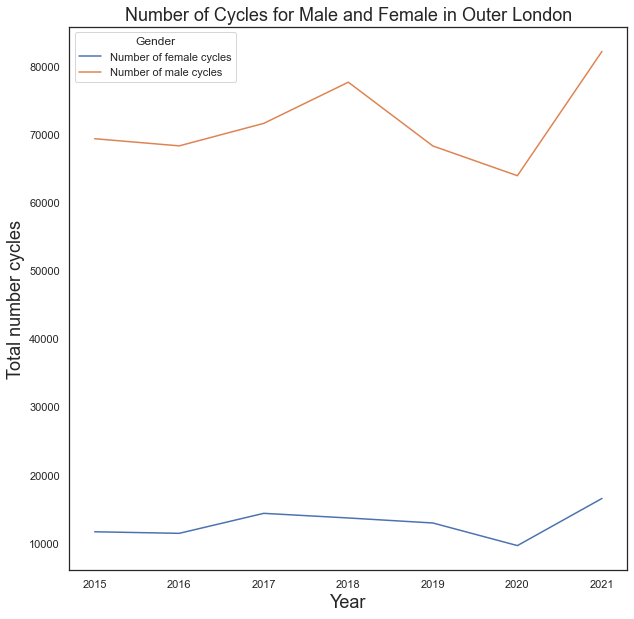

In [114]:
m_f_plot = m_f_group_2.plot(x='Survey wave (year)', y=['Number of female cycles', 'Number of male cycles'],
                                         kind='line', figsize=(10,10))

m_f_plot.legend(title='Gender', loc='upper left')
m_f_plot.set_xlabel('Year')
m_f_plot.set_ylabel('Total number cycles')
m_f_plot.set_title("Number of Cycles for Male and Female in Outer London")
m_f_plot.title.set_fontsize(18)
m_f_plot.xaxis.label.set_fontsize(18)
m_f_plot.yaxis.label.set_fontsize(18)

plt.savefig('m_f_plot.png')

## Mini Hollands 

In [116]:
borough_lo

Survey wave (year)   Site ID                      Location  \
0                     2015  OUTCY001              High Road Leyton   
1                     2015  OUTCY001              High Road Leyton   
2                     2015  OUTCY001              High Road Leyton   
3                     2015  OUTCY001              High Road Leyton   
4                     2015  OUTCY001              High Road Leyton   
...                    ...       ...                           ...   
375655                2021  OUTCY451  Thames Path (Lower Ham Road)   
375656                2021  OUTCY451  Thames Path (Lower Ham Road)   
375657                2021  OUTCY451  Thames Path (Lower Ham Road)   
375658                2021  OUTCY451  Thames Path (Lower Ham Road)   
375659                2021  OUTCY451  Thames Path (Lower Ham Road)   

          Survey date Weather         Time                       Period  \
0       ven, 26/06/15     Dry  0600 - 0615  Early Morning (06:00-07:00)   
1       ven, 26/06/15     Dry  0615 - 0630  Early Morning (06:00-07:00)   
2       ven, 26/06/15     Dry  0630 - 0645  Early Morning (06:00-07:00)   
3       ven, 26/06/15     Dry  0645 - 0700  Early Morning (06:00-07:00)   
4       ven, 26/06/15     Dry  0700 - 0715        AM peak (07:00-10:00)   
...               ...     ...          ...                          ...   
375655  ven, 18/06/21     Wet  2045 - 2100        Evening (19:00-22:00)   
375656  ven, 18/06/21     Wet  2100 - 2115        Evening (19:00-22:00)   
375657  ven, 18/06/21     Wet  2115 - 2130        Evening (19:00-22:00)   
375658  ven, 18/06/21     Wet  2130 - 2145        Evening (19:00-22:00)   
375659  ven, 18/06/21     Wet  2145 - 2200        Evening (19:00-22:00)   

         Direction  Start hour  Start minute  Number of male cycles  \
0       Northbound           6             0                      2   
1       Northbound           6            15                      3   
2       Northbound           6            30                      2   
3       Northbound           6            45                      4   
4       Northbound           7             0                      4   
...            ...         ...           ...                    ...   
375655  Southbound          20            45                      1   
375656  Southbound          21             0                      2   
375657  Southbound          21            15                      0   
375658  Southbound          21            30                      0   
375659  Southbound          21            45                      1   

        Number of female cycles  Number of unknown cycles  Total cycles  \
0                             1                         0             3   
1                             0                         0             3   
2                             0                         0             2   
3                             0                         0             4   
4                             1                         0             5   
...                         ...                       ...           ...   
375655                        0                         0             1   
375656                        0                         0             2   
375657                        0                         0             0   
375658                        0                         0             0   
375659                        0                         0             1   

              Date     Day Month Quarter               Borough  \
0       2015-06-26  Friday  June      Q2        Waltham Forest   
1       2015-06-26  Friday  June      Q2        Waltham Forest   
2       2015-06-26  Friday  June      Q2        Waltham Forest   
3       2015-06-26  Friday  June      Q2        Waltham Forest   
4       2015-06-26  Friday  June      Q2        Waltham Forest   
...            ...     ...   ...     ...                   ...   
375655  2021-06-18  Friday  June      Q2  Kingston

In [117]:
mini_hollands = borough_lo[(borough_lo['Borough'].isin(['Waltham Forest', 'Kingston upon Thames',
                                                        'Enfield']))].reset_index()
mini_hollands.head()

index  Survey wave (year)   Site ID          Location    Survey date  \
0      0                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
1      1                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
2      2                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
3      3                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
4      4                2015  OUTCY001  High Road Leyton  ven, 26/06/15   

  Weather         Time                       Period   Direction  Start hour  \
0     Dry  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
1     Dry  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
2     Dry  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
3     Dry  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
4     Dry  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

   ...  Number of male cycles  Number of female cycles  \
0  ...                      2                        1   
1  ...                      3                        0   
2  ...                      2                        0   
3  ...                      4                        0   
4  ...                      4                        1   

   Number of unknown cycles  Total cycles        Date     Day Month Quarter  \
0                         0             3  2015-06-26  Friday  June      Q2   
1                         0             3  2015-06-26  Friday  June      Q2   
2                         0             2  2015-06-26  Friday  June      Q2   
3                         0             4  2015-06-26  Friday  June      Q2   
4                         0             5  2015-06-26  Friday  June      Q2   

          Borough Functional cycling area  
0  Waltham Forest                   Outer  
1  Waltham Forest                   Outer  
2  Waltham Forest                   Outer  
3  Waltham Forest                   Outer  
4  Waltham Forest                   Outer  

[5 rows x 21 columns]

In [118]:
mini_hollands = mini_hollands.drop(['index'], axis=1)
mini_hollands.head()

Survey wave (year)   Site ID          Location    Survey date Weather  \
0                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
1                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
2                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
3                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
4                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

   Start minute  Number of male cycles  Number of female cycles  \
0             0                      2                        1   
1            15                      3                        0   
2            30                      2                        0   
3            45                      4                        0   
4             0                      4                        1   

   Number of unknown cycles  Total cycles        Date     Day Month Quarter  \
0                         0             3  2015-06-26  Friday  June      Q2   
1                         0             3  2015-06-26  Friday  June      Q2   
2                         0             2  2015-06-26  Friday  June      Q2   
3                         0             4  2015-06-26  Friday  June      Q2   
4                         0             5  2015-06-26  Friday  June      Q2   

          Borough Functional cycling area  
0  Waltham Forest                   Outer  
1  Waltham Forest                   Outer  
2  Waltham Forest                   Outer  
3  Waltham Forest                   Outer  
4  Waltham Forest                   Outer

In [119]:
mini_hollands_group = mini_hollands.groupby(['Borough', 'Survey wave (year)']).sum('Total cycles').reset_index()
mini_hollands_group.head()

Borough  Survey wave (year)  Start hour  Start minute  \
0  Enfield                2015       34560         57600   
1  Enfield                2016       34560         57600   
2  Enfield                2017       34560         57600   
3  Enfield                2018       34560         57600   
4  Enfield                2019       34560         57600   

   Number of male cycles  Number of female cycles  Number of unknown cycles  \
0                   1496                      347                         0   
1                   1339                      247                         2   
2                   1686                      278                         7   
3                   1568                      252                         9   
4                   1342                      212                         7   

   Total cycles  
0          1843  
1          1588  
2          1971  
3          1829  
4          1561

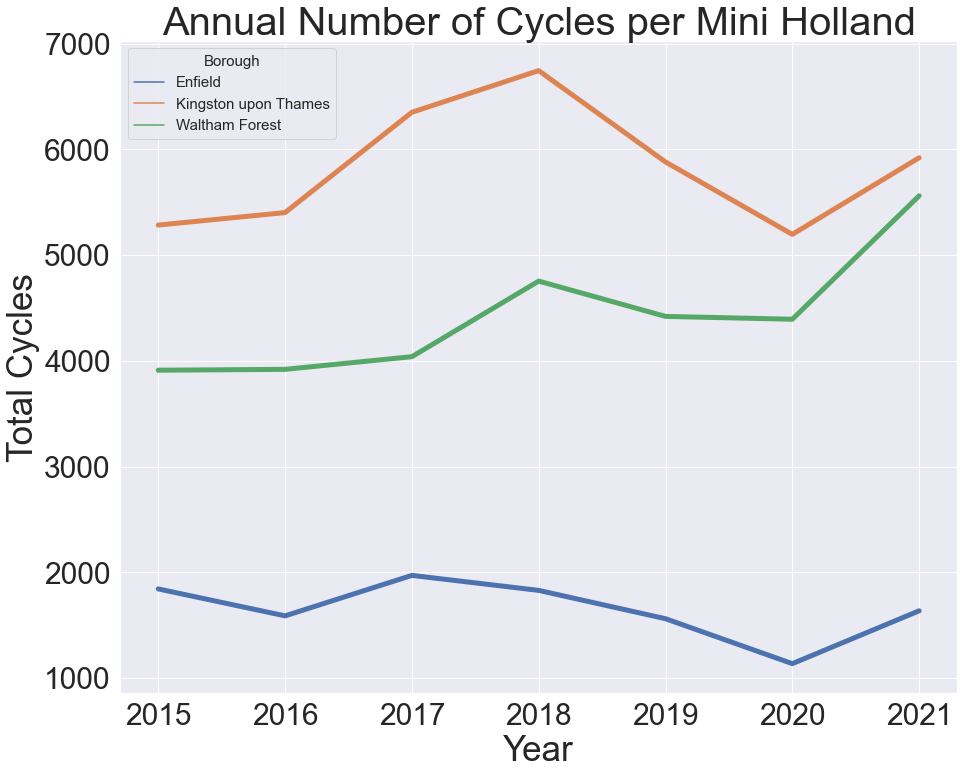

In [606]:
# Plot graph showing the trends over time
nc_mini_holland = sns.lineplot(x='Survey wave (year)', y='Total cycles',
                        hue='Borough', lw=5, data=mini_hollands_group, ci=None)

nc_mini_holland.legend(title='Borough', loc='upper left', title_fontsize=15, fontsize=15)
nc_mini_holland.set_xlabel('Year')
nc_mini_holland.set_ylabel('Total Cycles')
nc_mini_holland.set_title("Annual Number of Cycles per Mini Holland")
nc_mini_holland.title.set_fontsize(40)
nc_mini_holland.xaxis.label.set_fontsize(35)
nc_mini_holland.yaxis.label.set_fontsize(35)
nc_mini_holland.tick_params(axis='both', which='major', labelsize=30)

plt.savefig('nc_mini_holland.png')

In [121]:
mini_hollands_group

Borough  Survey wave (year)  Start hour  Start minute  \
0                Enfield                2015       34560         57600   
1                Enfield                2016       34560         57600   
2                Enfield                2017       34560         57600   
3                Enfield                2018       34560         57600   
4                Enfield                2019       34560         57600   
5                Enfield                2020       17280         28800   
6                Enfield                2021       32832         54720   
7   Kingston upon Thames                2015       25920         43200   
8   Kingston upon Thames                2016       25920         43200   
9   Kingston upon Thames                2017       25920         43200   
10  Kingston upon Thames                2018       25920         43200   
11  Kingston upon Thames                2019       25920         43200   
12  Kingston upon Thames                2020       19008         31680   
13  Kingston upon Thames                2021       25920         43200   
14        Waltham Forest                2015       31104         51840   
15        Waltham Forest                2016       31104         51840   
16        Waltham Forest                2017       31104         51840   
17        Waltham Forest                2018       31104         51840   
18        Waltham Forest                2019       31104         51840   
19        Waltham Forest                2020       13824         23040   
20        Waltham Forest                2021       31104         51840   

    Number of male cycles  Number of female cycles  Number of unknown cycles  \
0                    1496                      347                         0   
1                    1339                      247                         2   
2                    1686                      278                         7   
3                    1568                      252                         9   
4                    1342                      212                         7   
5                     984                      149                         3   
6                    1296                      339                         1   
7                    4359                      803                       123   
8                    4594                      779                        30   
9                    5198                     1145                         9   
10                   5560                     1164                        22   
11                   4730                     1060                        92   
12                   4397                      683                       117   
13                   5082                      809                        31   
14                   3325                      579                         8   
15                   3203                      709                         8   
16                   3322                      713                         5   
17                   3832                      912                        11   
18                   3468                      949                         4   
19                   3388                      987                        19   
20                   4199                     1360                         3   

    Total cycles  
0           1843  
1           1588  
2           1971  
3           1829  
4           1561  
5           1136  
6           1636  
7           5285  
8           5403  
9           6352  
10          6746  
11          5882  
12          5197  
13          5922  
14          3912  
15          3920  
16          4040  
17          4755  
18          4421  
19          4394  
20          5562

(array([2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

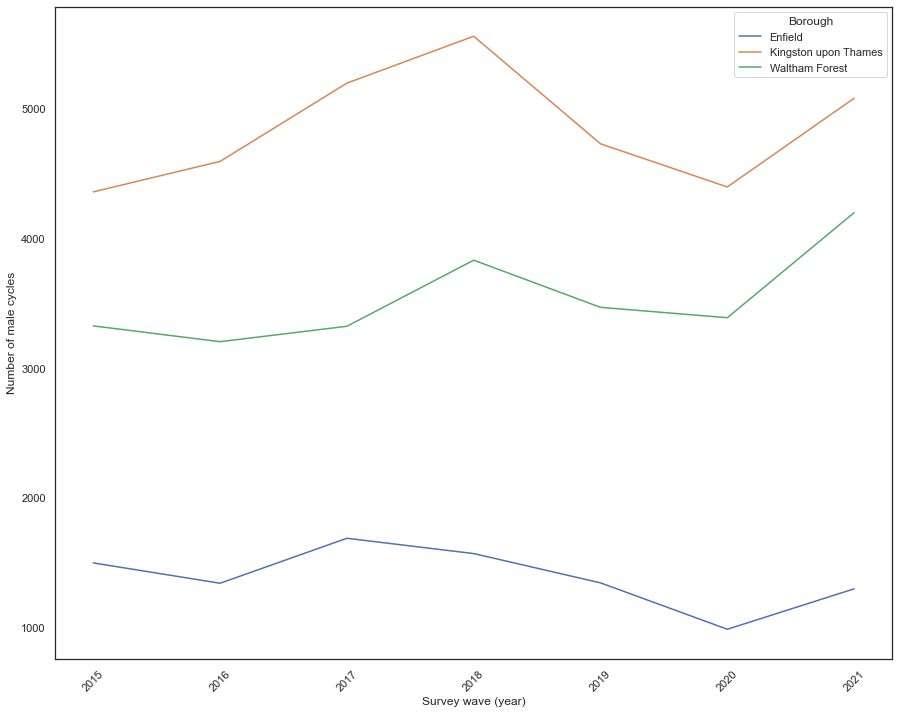

In [122]:
# Plot graph showing the trends over time
nc_mini_male = sns.lineplot(x='Survey wave (year)', y='Number of male cycles',
                        hue='Borough', data=mini_hollands_group, ci=None)

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

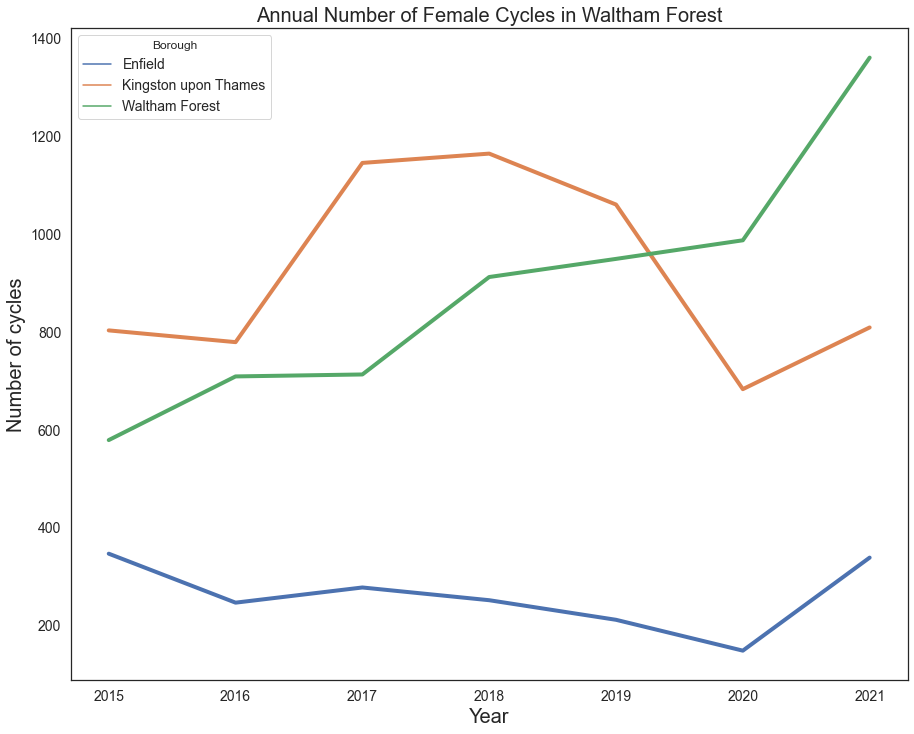

In [516]:
# Plot graph showing the trends over time
nc_mini_female = sns.lineplot(x='Survey wave (year)', y='Number of female cycles',
                        hue='Borough', lw=4, data=mini_hollands_group, ci=None)

nc_mini_female.legend(title='Borough', loc='upper left', fontsize=14)
nc_mini_female.set_xlabel('Year')
nc_mini_female.set_ylabel('Number of cycles')
nc_mini_female.set_title("Annual Number of Female Cycles in Waltham Forest")
nc_mini_female.title.set_fontsize(20)
nc_mini_female.xaxis.label.set_fontsize(20)
nc_mini_female.yaxis.label.set_fontsize(20)
nc_mini_female.tick_params(axis='both', which='major', labelsize=14)

plt.savefig('mini_female.png')

In [281]:
mini_hollands

Survey wave (year)   Site ID                      Location  \
0                    2015  OUTCY001              High Road Leyton   
1                    2015  OUTCY001              High Road Leyton   
2                    2015  OUTCY001              High Road Leyton   
3                    2015  OUTCY001              High Road Leyton   
4                    2015  OUTCY001              High Road Leyton   
...                   ...       ...                           ...   
44283                2021  OUTCY451  Thames Path (Lower Ham Road)   
44284                2021  OUTCY451  Thames Path (Lower Ham Road)   
44285                2021  OUTCY451  Thames Path (Lower Ham Road)   
44286                2021  OUTCY451  Thames Path (Lower Ham Road)   
44287                2021  OUTCY451  Thames Path (Lower Ham Road)   

         Survey date Weather         Time                       Period  \
0      ven, 26/06/15     Dry  0600 - 0615  Early Morning (06:00-07:00)   
1      ven, 26/06/15     Dry  0615 - 0630  Early Morning (06:00-07:00)   
2      ven, 26/06/15     Dry  0630 - 0645  Early Morning (06:00-07:00)   
3      ven, 26/06/15     Dry  0645 - 0700  Early Morning (06:00-07:00)   
4      ven, 26/06/15     Dry  0700 - 0715        AM peak (07:00-10:00)   
...              ...     ...          ...                          ...   
44283  ven, 18/06/21     Wet  2045 - 2100        Evening (19:00-22:00)   
44284  ven, 18/06/21     Wet  2100 - 2115        Evening (19:00-22:00)   
44285  ven, 18/06/21     Wet  2115 - 2130        Evening (19:00-22:00)   
44286  ven, 18/06/21     Wet  2130 - 2145        Evening (19:00-22:00)   
44287  ven, 18/06/21     Wet  2145 - 2200        Evening (19:00-22:00)   

        Direction  Start hour  Start minute  Number of male cycles  \
0      Northbound           6             0                      2   
1      Northbound           6            15                      3   
2      Northbound           6            30                      2   
3      Northbound           6            45                      4   
4      Northbound           7             0                      4   
...           ...         ...           ...                    ...   
44283  Southbound          20            45                      1   
44284  Southbound          21             0                      2   
44285  Southbound          21            15                      0   
44286  Southbound          21            30                      0   
44287  Southbound          21            45                      1   

       Number of female cycles  Number of unknown cycles  Total cycles  \
0                            1                         0             3   
1                            0                         0             3   
2                            0                         0             2   
3                            0                         0             4   
4                            1                         0             5   
...                        ...                       ...           ...   
44283                        0                         0             1   
44284                        0                         0             2   
44285                        0                         0             0   
44286                        0                         0             0   
44287                        0                         0             1   

             Date     Day Month Quarter               Borough  \
0      2015-06-26  Friday  June      Q2        Waltham Forest   
1      2015-06-26  Friday  June      Q2        Waltham Forest   
2      2015-06-26  Friday  June      Q2        Waltham Forest   
3      2015-06-26  Friday  June      Q2        Waltham Forest   
4      2015-06-26  Friday  June      Q2        Waltham Forest   
...           ...     ...   ...     ...                   ...   
44283  2021-06-18  Friday  June      Q2  Kingston upon Thames   
44284  2021-06-18  Friday  June      Q2

In [284]:
waltham_forest = mini_hollands[(mini_hollands['Borough'].isin(['Waltham Forest']))].reset_index()
waltham_forest.head()

index  Survey wave (year)   Site ID          Location    Survey date  \
0      0                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
1      1                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
2      2                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
3      3                2015  OUTCY001  High Road Leyton  ven, 26/06/15   
4      4                2015  OUTCY001  High Road Leyton  ven, 26/06/15   

  Weather         Time                       Period   Direction  Start hour  \
0     Dry  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
1     Dry  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
2     Dry  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
3     Dry  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
4     Dry  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

   ...  Number of male cycles  Number of female cycles  \
0  ...                      2                        1   
1  ...                      3                        0   
2  ...                      2                        0   
3  ...                      4                        0   
4  ...                      4                        1   

   Number of unknown cycles  Total cycles        Date     Day Month Quarter  \
0                         0             3  2015-06-26  Friday  June      Q2   
1                         0             3  2015-06-26  Friday  June      Q2   
2                         0             2  2015-06-26  Friday  June      Q2   
3                         0             4  2015-06-26  Friday  June      Q2   
4                         0             5  2015-06-26  Friday  June      Q2   

          Borough Functional cycling area  
0  Waltham Forest                   Outer  
1  Waltham Forest                   Outer  
2  Waltham Forest                   Outer  
3  Waltham Forest                   Outer  
4  Waltham Forest                   Outer  

[5 rows x 21 columns]

In [286]:
waltham_forest_ss = waltham_forest.groupby(['Survey wave (year)']).sum().reset_index()
waltham_forest_ss

Survey wave (year)     index  Start hour  Start minute  \
0                2015  52886400       31104         51840   
1                2016  53181312       31104         51840   
2                2017  53476224       31104         51840   
3                2018  53771136       31104         51840   
4                2019  54066048       31104         51840   
5                2020  19299840       13824         23040   
6                2021  54492032       31104         51840   

   Number of male cycles  Number of female cycles  Number of unknown cycles  \
0                   3325                      579                         8   
1                   3203                      709                         8   
2                   3322                      713                         5   
3                   3832                      912                        11   
4                   3468                      949                         4   
5                   3388                      987                        19   
6                   4199                     1360                         3   

   Total cycles  
0          3912  
1          3920  
2          4040  
3          4755  
4          4421  
5          4394  
6          5562

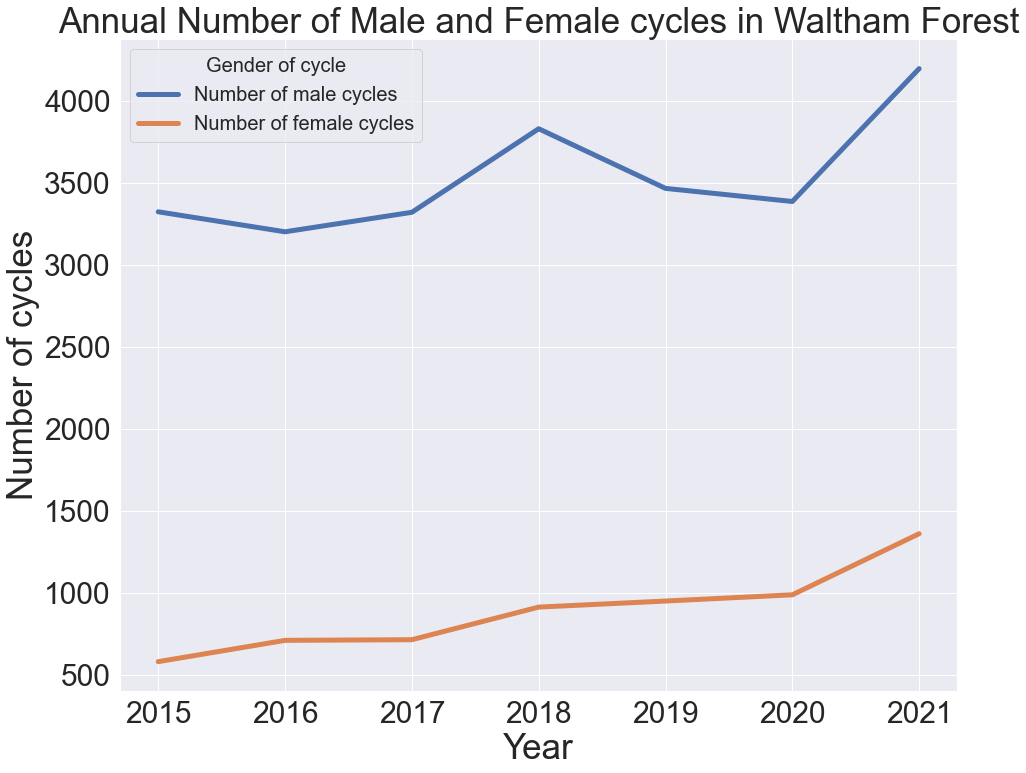

In [588]:
# Plot graph showing the trends over time
nc_wal_for = waltham_forest_ss.plot(x='Survey wave (year)', y=['Number of male cycles', 'Number of female cycles'],
                                    kind='line', lw=5, figsize=(15,12))

nc_wal_for.legend(title='Gender of cycle', loc='upper left',title_fontsize=20, fontsize=20)
nc_wal_for.set_xlabel('Year')
nc_wal_for.set_ylabel('Number of cycles')
nc_wal_for.set_title("Annual Number of Male and Female cycles in Waltham Forest")
nc_wal_for.title.set_fontsize(35)
nc_wal_for.xaxis.label.set_fontsize(35)
nc_wal_for.yaxis.label.set_fontsize(35)
nc_wal_for.tick_params(axis='both', which='major', labelsize=30)

plt.savefig('waltham_forest.png')

In [288]:
enfield = mini_hollands[(mini_hollands['Borough'].isin(['Enfield']))].reset_index()
enfield.head()

index  Survey wave (year)   Site ID        Location    Survey date Weather  \
0    896                2015  OUTCY005  Nags Head Road  lun, 13/07/15     Wet   
1    897                2015  OUTCY005  Nags Head Road  lun, 13/07/15     Wet   
2    898                2015  OUTCY005  Nags Head Road  lun, 13/07/15     Wet   
3    899                2015  OUTCY005  Nags Head Road  lun, 13/07/15     Wet   
4    900                2015  OUTCY005  Nags Head Road  lun, 13/07/15     Wet   

          Time                       Period  Direction  Start hour  ...  \
0  0600 - 0615  Early Morning (06:00-07:00)  Eastbound           6  ...   
1  0615 - 0630  Early Morning (06:00-07:00)  Eastbound           6  ...   
2  0630 - 0645  Early Morning (06:00-07:00)  Eastbound           6  ...   
3  0645 - 0700  Early Morning (06:00-07:00)  Eastbound           6  ...   
4  0700 - 0715        AM peak (07:00-10:00)  Eastbound           7  ...   

   Number of male cycles  Number of female cycles  Number of unknown cycles  \
0                      0                        0                         0   
1                      0                        0                         0   
2                      2                        0                         0   
3                      0                        0                         0   
4                      2                        0                         0   

   Total cycles        Date     Day Month Quarter  Borough  \
0             0  2015-07-13  Monday  July      Q3  Enfield   
1             0  2015-07-13  Monday  July      Q3  Enfield   
2             2  2015-07-13  Monday  July      Q3  Enfield   
3             0  2015-07-13  Monday  July      Q3  Enfield   
4             2  2015-07-13  Monday  July      Q3  Enfield   

  Functional cycling area  
0                   Outer  
1                   Outer  
2                   Outer  
3                   Outer  
4                   Outer  

[5 rows x 21 columns]

In [289]:
enfield_ss = enfield.groupby(['Survey wave (year)']).sum().reset_index()
enfield_ss

Survey wave (year)     index  Start hour  Start minute  \
0                2015  60619520       34560         57600   
1                2016  60947200       34560         57600   
2                2017  61274880       34560         57600   
3                2018  61602560       34560         57600   
4                2019  61930240       34560         57600   
5                2020  28851584       17280         28800   
6                2021  57400128       32832         54720   

   Number of male cycles  Number of female cycles  Number of unknown cycles  \
0                   1496                      347                         0   
1                   1339                      247                         2   
2                   1686                      278                         7   
3                   1568                      252                         9   
4                   1342                      212                         7   
5                    984                      149                         3   
6                   1296                      339                         1   

   Total cycles  
0          1843  
1          1588  
2          1971  
3          1829  
4          1561  
5          1136  
6          1636

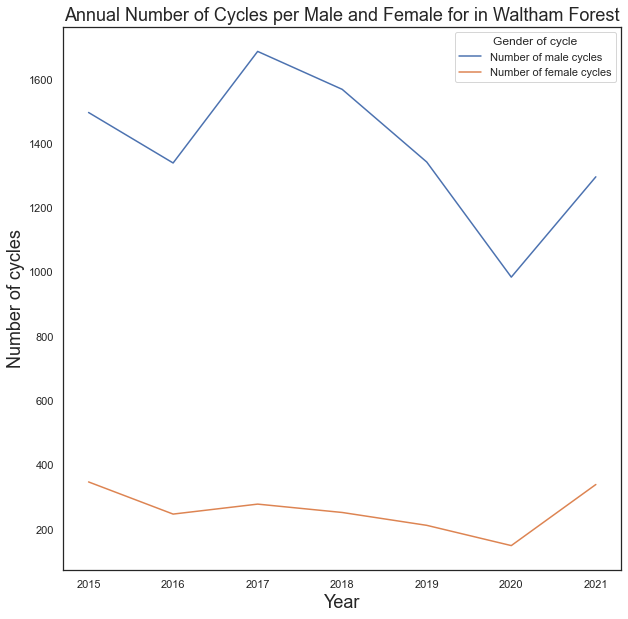

In [520]:
nc_enfield = enfield_ss.plot(x='Survey wave (year)', y=['Number of male cycles', 'Number of female cycles'],
                                    kind='line', figsize=(10,10))

nc_enfield.legend(title='Gender of cycle', loc='upper right')
nc_enfield.set_xlabel('Year')
nc_enfield.set_ylabel('Number of cycles')
nc_enfield.set_title("Annual Number of Cycles per Male and Female for in Waltham Forest")
nc_enfield.title.set_fontsize(18)
nc_enfield.xaxis.label.set_fontsize(18)
nc_enfield.yaxis.label.set_fontsize(18)

plt.savefig('nc_cent_boro.png')

# Predict future 

In [124]:
borough_li.head()

Survey wave (year)   Site ID    Location    Survey date Weather  \
0                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
1                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
2                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
3                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
4                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

   Start minute  Number of private cycles  Number of cycle hire bikes  \
0           0.0                         1                           0   
1          15.0                         2                           0   
2          30.0                         2                           0   
3          45.0                         4                           0   
4           0.0                         4                           0   

   Total cycles        Date        Day  Year Month Quarter        Borough  \
0             1  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
1             2  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
2             2  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
3             4  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
4             4  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   

  Functional cycling area  
0                   Inner  
1                   Inner  
2                   Inner  
3                   Inner  
4                   Inner

In [125]:
borough_lo.head()

Survey wave (year)   Site ID          Location    Survey date Weather  \
0                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
1                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
2                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
3                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
4                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

   Start minute  Number of male cycles  Number of female cycles  \
0             0                      2                        1   
1            15                      3                        0   
2            30                      2                        0   
3            45                      4                        0   
4             0                      4                        1   

   Number of unknown cycles  Total cycles        Date     Day Month Quarter  \
0                         0             3  2015-06-26  Friday  June      Q2   
1                         0             3  2015-06-26  Friday  June      Q2   
2                         0             2  2015-06-26  Friday  June      Q2   
3                         0             4  2015-06-26  Friday  June      Q2   
4                         0             5  2015-06-26  Friday  June      Q2   

          Borough Functional cycling area  
0  Waltham Forest                   Outer  
1  Waltham Forest                   Outer  
2  Waltham Forest                   Outer  
3  Waltham Forest                   Outer  
4  Waltham Forest                   Outer

In [126]:
borough_li_total = borough_li.loc[:, ['Site ID', 'Survey wave (year)', 'Total cycles']]

borough_li_total

Site ID  Survey wave (year)  Total cycles
0       INNCY001                2015             1
1       INNCY001                2015             2
2       INNCY001                2015             2
3       INNCY001                2015             4
4       INNCY001                2015             4
...          ...                 ...           ...
508702  INNCY597                2021             3
508703  INNCY597                2021             2
508704  INNCY597                2021             2
508705  INNCY597                2021             2
508706  INNCY597                2021             0

[508707 rows x 3 columns]

In [127]:
borough_li_total = borough_li_total.rename(columns={'Total cycles': 'Total Inner cycles'})
borough_li_total

Site ID  Survey wave (year)  Total Inner cycles
0       INNCY001                2015                   1
1       INNCY001                2015                   2
2       INNCY001                2015                   2
3       INNCY001                2015                   4
4       INNCY001                2015                   4
...          ...                 ...                 ...
508702  INNCY597                2021                   3
508703  INNCY597                2021                   2
508704  INNCY597                2021                   2
508705  INNCY597                2021                   2
508706  INNCY597                2021                   0

[508707 rows x 3 columns]

In [128]:
li_year_totals = borough_li_total.groupby(['Survey wave (year)']).sum().reset_index()
li_year_totals

Survey wave (year)  Total Inner cycles
0                2015              449955
1                2016              441662
2                2017              450399
3                2018              458452
4                2019              448833
5                2020              429418
6                2021              476438

In [129]:
li_year_totals['% yr change'] = li_year_totals['Total Inner cycles'].pct_change().round(4)
li_year_totals

Survey wave (year)  Total Inner cycles  % yr change
0                2015              449955          NaN
1                2016              441662      -0.0184
2                2017              450399       0.0198
3                2018              458452       0.0179
4                2019              448833      -0.0210
5                2020              429418      -0.0433
6                2021              476438       0.1095

In [130]:
li_year_range = li_year_totals.copy()
li_year_range

Survey wave (year)  Total Inner cycles  % yr change
0                2015              449955          NaN
1                2016              441662      -0.0184
2                2017              450399       0.0198
3                2018              458452       0.0179
4                2019              448833      -0.0210
5                2020              429418      -0.0433
6                2021              476438       0.1095

In [131]:
li_year_range.drop(li_year_range.index[1:6], inplace=True)

In [132]:
li_year_range

Survey wave (year)  Total Inner cycles  % yr change
0                2015              449955          NaN
6                2021              476438       0.1095

In [133]:
li_year_range['% change'] = li_year_range['Total Inner cycles'].pct_change().round(4)
li_year_range

Survey wave (year)  Total Inner cycles  % yr change  % change
0                2015              449955          NaN       NaN
6                2021              476438       0.1095    0.0589

In [134]:
borough_lo_total = borough_lo.loc[:, ['Site ID', 'Survey wave (year)', 'Total cycles']]

borough_lo_total

Site ID  Survey wave (year)  Total cycles
0       OUTCY001                2015             3
1       OUTCY001                2015             3
2       OUTCY001                2015             2
3       OUTCY001                2015             4
4       OUTCY001                2015             5
...          ...                 ...           ...
375655  OUTCY451                2021             1
375656  OUTCY451                2021             2
375657  OUTCY451                2021             0
375658  OUTCY451                2021             0
375659  OUTCY451                2021             1

[375660 rows x 3 columns]

In [135]:
borough_lo_total = borough_lo_total.rename(columns={'Total cycles': 'Total Outer cycles'})
borough_lo_total

Site ID  Survey wave (year)  Total Outer cycles
0       OUTCY001                2015                   3
1       OUTCY001                2015                   3
2       OUTCY001                2015                   2
3       OUTCY001                2015                   4
4       OUTCY001                2015                   5
...          ...                 ...                 ...
375655  OUTCY451                2021                   1
375656  OUTCY451                2021                   2
375657  OUTCY451                2021                   0
375658  OUTCY451                2021                   0
375659  OUTCY451                2021                   1

[375660 rows x 3 columns]

In [136]:
lo_year_totals = borough_lo_total.groupby(['Survey wave (year)']).sum().reset_index()
lo_year_totals

Survey wave (year)  Total Outer cycles
0                2015               82228
1                2016               80295
2                2017               86588
3                2018               91966
4                2019               82117
5                2020               74924
6                2021               99067

In [137]:
lo_year_totals['% yr change'] = lo_year_totals['Total Outer cycles'].pct_change().round(4)
lo_year_totals

Survey wave (year)  Total Outer cycles  % yr change
0                2015               82228          NaN
1                2016               80295      -0.0235
2                2017               86588       0.0784
3                2018               91966       0.0621
4                2019               82117      -0.1071
5                2020               74924      -0.0876
6                2021               99067       0.3222

In [138]:
lo_year_range = lo_year_totals.copy()
lo_year_range

Survey wave (year)  Total Outer cycles  % yr change
0                2015               82228          NaN
1                2016               80295      -0.0235
2                2017               86588       0.0784
3                2018               91966       0.0621
4                2019               82117      -0.1071
5                2020               74924      -0.0876
6                2021               99067       0.3222

In [139]:
lo_year_range.drop(lo_year_range.index[1:6], inplace=True)

In [140]:
lo_year_range

Survey wave (year)  Total Outer cycles  % yr change
0                2015               82228          NaN
6                2021               99067       0.3222

In [141]:
lo_year_range['% change'] = lo_year_range['Total Outer cycles'].pct_change().round(4)
lo_year_range

Survey wave (year)  Total Outer cycles  % yr change  % change
0                2015               82228          NaN       NaN
6                2021               99067       0.3222    0.2048

In [142]:
lo_year_range.to_csv('lo_year_range.csv')

## Comparison with infrastructure

In [143]:
borough_li

Survey wave (year)   Site ID       Location    Survey date Weather  \
0                     2015  INNCY001     Grove Road  mer, 20/05/15     Dry   
1                     2015  INNCY001     Grove Road  mer, 20/05/15     Dry   
2                     2015  INNCY001     Grove Road  mer, 20/05/15     Dry   
3                     2015  INNCY001     Grove Road  mer, 20/05/15     Dry   
4                     2015  INNCY001     Grove Road  mer, 20/05/15     Dry   
...                    ...       ...            ...            ...     ...   
508702                2021  INNCY597  Augustus Road  mer, 26/05/21     Dry   
508703                2021  INNCY597  Augustus Road  mer, 26/05/21     Dry   
508704                2021  INNCY597  Augustus Road  mer, 26/05/21     Dry   
508705                2021  INNCY597  Augustus Road  mer, 26/05/21     Dry   
508706                2021  INNCY597  Augustus Road  mer, 26/05/21     Dry   

               Time                       Period   Direction  Start hour  \
0       0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
1       0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
2       0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
3       0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
4       0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   
...             ...                          ...         ...         ...   
508702  2045 - 2100        Evening (19:00-22:00)   Westbound        20.0   
508703  2100 - 2115        Evening (19:00-22:00)   Westbound        21.0   
508704  2115 - 2130        Evening (19:00-22:00)   Westbound        21.0   
508705  2130 - 2145        Evening (19:00-22:00)   Westbound        21.0   
508706  2145 - 2200        Evening (19:00-22:00)   Westbound        21.0   

        Start minute  Number of private cycles  Number of cycle hire bikes  \
0                0.0                         1                           0   
1               15.0                         2                           0   
2               30.0                         2                           0   
3               45.0                         4                           0   
4                0.0                         4                           0   
...              ...                       ...                         ...   
508702          45.0                         3                           0   
508703           0.0                         2                           0   
508704          15.0                         2                           0   
508705          30.0                         2                           0   
508706          45.0                         0                           0   

        Total cycles        Date        Day  Year Month Quarter  \
0                  1  2015-05-20  Wednesday  2015   May      Q2   
1                  2  2015-05-20  Wednesday  2015   May      Q2   
2                  2  2015-05-20  Wednesday  2015   May      Q2   
3                  4  2015-05-20  Wednesday  2015   May      Q2   
4                  4  2015-05-20  Wednesday  2015   May      Q2   
...              ...         ...        ...   ...   ...     ...   
508702             3  2021-05-26  Wednesday  2021   May      Q2   
508703             2  2021-05-26  Wednesday  2021   May      Q2   
508704             2  2021-05-26  Wednesday  2021   May      Q2   
508705             2  2021-05-26  Wednesday  2021   May      Q2   
508706             0  2021-05-26  Wednesday  2021   May      Q2   

              Borough Functional cycling area  
0       Tower Hamlets                   Inner  
1       Tower Hamlets                   Inner  
2       Tower Hamlets                   Inner  
3       Tower Hamlets                   Inner  
4       Tower Hamlets                   Inner  
...               ...                     ...  
508702     Wandsworth                   Inner  
508703     Wandsworth           

In [144]:
total_li_borough = borough_li.groupby(['Year', 
                                    'Borough']).sum('Total cycles')\
.sort_values(by = 'Total cycles', ascending=False).reset_index()
total_li_borough.head()

Year    Borough  Survey wave (year)  Start hour  Start minute  \
0  2018  Islington            12140288     81216.0      135360.0   
1  2021    Hackney            13516448     90438.0      150390.0   
2  2015  Islington            12122240     81216.0      135360.0   
3  2017  Islington            12134272     81216.0      135360.0   
4  2016  Islington            12128256     81216.0      135360.0   

   Number of private cycles  Number of cycle hire bikes  Total cycles  
0                     59936                         568         60504  
1                     59658                         251         59909  
2                     57978                         435         58413  
3                     56550                         596         57146  
4                     56432                         687         57119

In [146]:
top_inner_lane = total_li_borough[(total_li_borough['Borough'].isin(['Ealing', 'Greenwich',
                                                              'Hounslow', 'Newham', 'Richmond upon Thames']))].reset_index()
top_inner_lane.head()

index  Year               Borough  Survey wave (year)  Start hour  \
0     93  2015  Richmond upon Thames             1547520     10368.0   
1     94  2021                Ealing             2586880     17280.0   
2     95  2017                Ealing             1549056     10368.0   
3     97  2020                Ealing              775680      5184.0   
4     99  2016  Richmond upon Thames             1548288     10368.0   

   Start minute  Number of private cycles  Number of cycle hire bikes  \
0       17280.0                      3163                          41   
1       28800.0                      3091                          25   
2       17280.0                      3066                           1   
3        8640.0                      2876                          18   
4       17280.0                      2676                          39   

   Total cycles  
0          3204  
1          3116  
2          3067  
3          2894  
4          2715

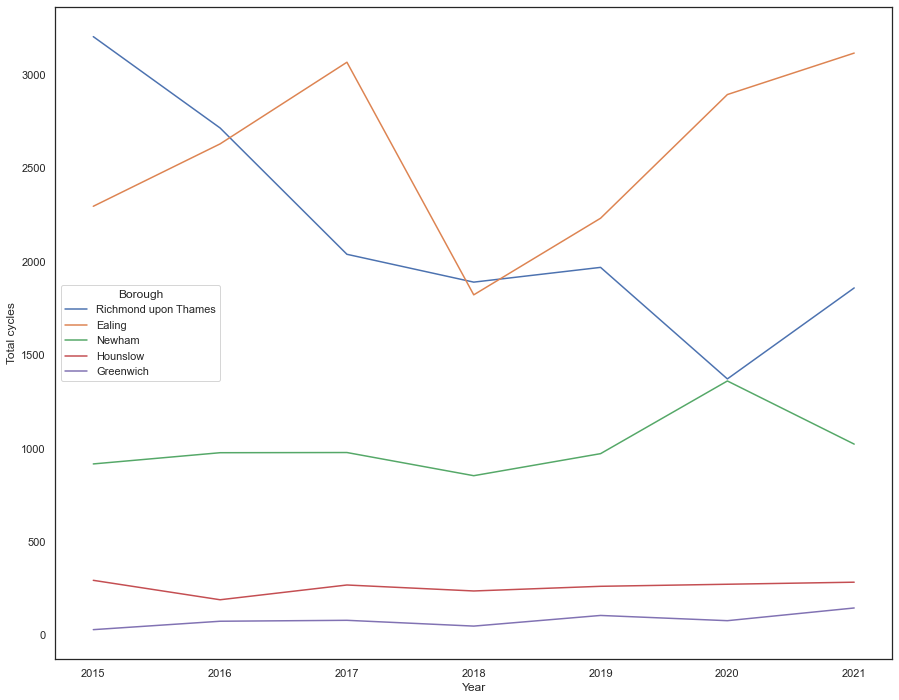

In [147]:
nc_top_lane = sns.lineplot(x='Year', y='Total cycles',
                            hue='Borough', data=top_inner_lane, ci=None)

In [170]:
total_li_borough.Borough.unique()

array(['Islington', 'Hackney', 'Hammersmith & Fulham', 'Wandsworth',
       'Tower Hamlets', 'Kensington & Chelsea', 'Lambeth', 'Westminster',
       'Southwark', 'Camden', 'Lewisham', 'Merton', 'Haringey',
       'Waltham Forest', 'Richmond upon Thames', 'Ealing', 'Brent',
       'Newham', 'Hounslow', 'Bromley', 'Greenwich'], dtype=object)

In [171]:
cycle_lane_km = total_li_borough[(total_li_borough['Borough'].isin(['Ealing', 'Hounslow',
                                                    'Tower Hamlets', 'Hackney', 
                                                    'Richmond upon Thames']))].reset_index()

cycle_lane_km.head()

index  Year  Borough  Survey wave (year)  Start hour  Start minute  \
0      1  2021  Hackney            13516448     90438.0      150390.0   
1      8  2015  Hackney            13411840     89856.0      149760.0   
2      9  2018  Hackney            13431808     89856.0      149760.0   
3     10  2019  Hackney            13438464     89856.0      149760.0   
4     11  2017  Hackney            13425152     89856.0      149760.0   

   Number of private cycles  Number of cycle hire bikes  Total cycles  
0                     59658                         251         59909  
1                     53825                         544         54369  
2                     52770                         813         53583  
3                     52357                        1092         53449  
4                     52230                         766         52996

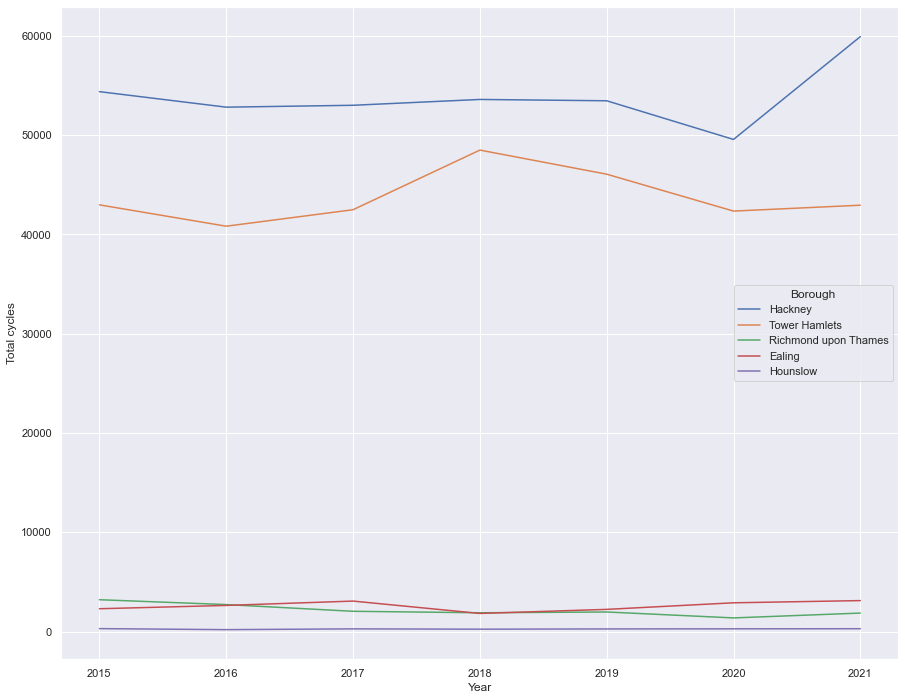

In [172]:
nc_lane_km = sns.lineplot(x='Year', y='Total cycles',
                            hue='Borough', data=cycle_lane_km, ci=None)

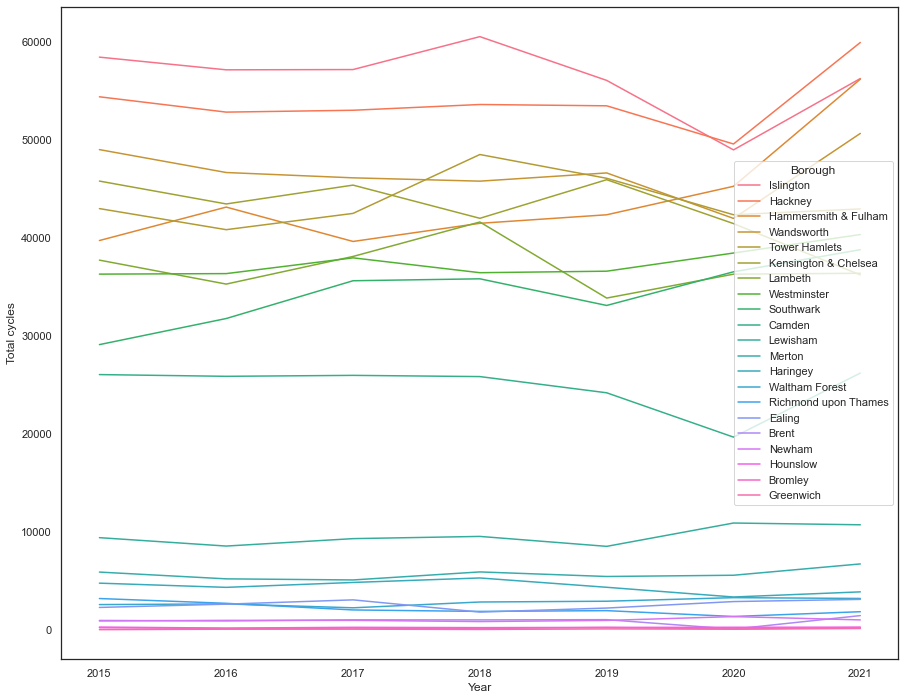

In [150]:
nc_total_boro = sns.lineplot(x='Year', y='Total cycles',
                            hue='Borough', data=total_li_borough, ci=None)

In [151]:
total_li_borough.Borough.unique()

array(['Islington', 'Hackney', 'Hammersmith & Fulham', 'Wandsworth',
       'Tower Hamlets', 'Kensington & Chelsea', 'Lambeth', 'Westminster',
       'Southwark', 'Camden', 'Lewisham', 'Merton', 'Haringey',
       'Waltham Forest', 'Richmond upon Thames', 'Ealing', 'Brent',
       'Newham', 'Hounslow', 'Bromley', 'Greenwich'], dtype=object)

In [155]:
top_inner_crossing = total_li_borough[(total_li_borough['Borough'].isin(['Newham', 'Southwark',
                                                                   'Hounslow', 'Westminster', 
                                                                   'Waltham Forest']))].reset_index()
top_inner_crossing.head()

index  Year      Borough  Survey wave (year)  Start hour  Start minute  \
0     40  2021  Westminster            11442902     76562.0      127410.0   
1     43  2021    Southwark            13193088     88128.0      146880.0   
2     44  2020  Westminster             9049600     60480.0      100800.0   
3     46  2017  Westminster            11617920     77760.0      129600.0   
4     48  2019  Westminster            11629440     77760.0      129600.0   

   Number of private cycles  Number of cycle hire bikes  Total cycles  
0                     36383                        3938         40321  
1                     38518                         259         38777  
2                     34168                        4269         38437  
3                     33537                        4409         37946  
4                     31450                        5134         36584

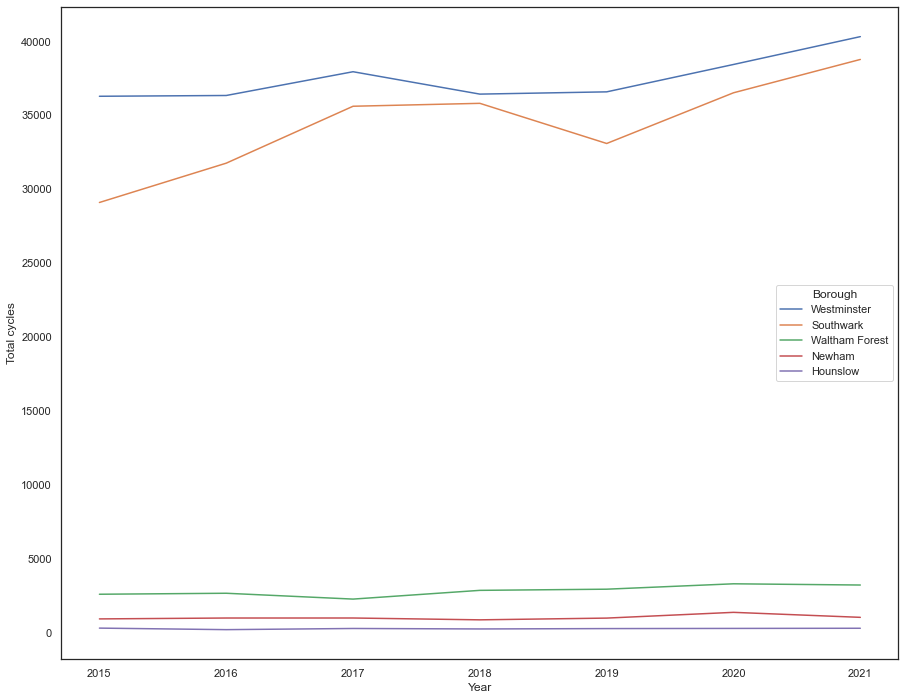

In [156]:
nc_top_cross = sns.lineplot(x='Year', y='Total cycles',
                            hue='Borough', data=top_inner_crossing, ci=None)

## attempt to build a time series

In [157]:
borough_li_copy = borough_li.copy()
borough_li_copy.head()

Survey wave (year)   Site ID    Location    Survey date Weather  \
0                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
1                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
2                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
3                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
4                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

   Start minute  Number of private cycles  Number of cycle hire bikes  \
0           0.0                         1                           0   
1          15.0                         2                           0   
2          30.0                         2                           0   
3          45.0                         4                           0   
4           0.0                         4                           0   

   Total cycles        Date        Day  Year Month Quarter        Borough  \
0             1  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
1             2  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
2             2  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
3             4  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
4             4  2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   

  Functional cycling area  
0                   Inner  
1                   Inner  
2                   Inner  
3                   Inner  
4                   Inner

In [158]:
borough_li_copy['Date']= pd.to_datetime(borough_li_copy['Date'])
borough_li_copy.dtypes

Survey wave (year)                     int64
Site ID                               object
Location                              object
Survey date                           object
Weather                               object
Time                                  object
Period                                object
Direction                             object
Start hour                           float64
Start minute                         float64
Number of private cycles               int64
Number of cycle hire bikes             int64
Total cycles                           int64
Date                          datetime64[ns]
Day                                   object
Year                                   int64
Month                                 object
Quarter                               object
Borough                               object
Functional cycling area               object
dtype: object

In [159]:
borough_li_copy.head()

Survey wave (year)   Site ID    Location    Survey date Weather  \
0                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
1                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
2                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
3                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   
4                2015  INNCY001  Grove Road  mer, 20/05/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

   Start minute  Number of private cycles  Number of cycle hire bikes  \
0           0.0                         1                           0   
1          15.0                         2                           0   
2          30.0                         2                           0   
3          45.0                         4                           0   
4           0.0                         4                           0   

   Total cycles       Date        Day  Year Month Quarter        Borough  \
0             1 2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
1             2 2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
2             2 2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
3             4 2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   
4             4 2015-05-20  Wednesday  2015   May      Q2  Tower Hamlets   

  Functional cycling area  
0                   Inner  
1                   Inner  
2                   Inner  
3                   Inner  
4                   Inner

In [160]:
date_total = borough_li_copy.groupby(['Date']).sum('Total cycles').reset_index()
date_total

Date  Survey wave (year)  Start hour  Start minute  \
0   2015-04-13             1160640      5472.0       12960.0   
1   2015-04-14             1676480     12512.0       18720.0   
2   2015-04-15              535990      4658.0        6030.0   
3   2015-04-16              128960      1120.0        1440.0   
4   2015-04-17              128960       608.0        1440.0   
..         ...                 ...         ...           ...   
458 2021-07-29              359738      1932.0        3960.0   
459 2021-07-30              125302       828.0        1440.0   
460 2021-08-01               68714       532.0         720.0   
461 2021-09-15              129344       608.0        1440.0   
462 2021-09-16              129344      1120.0        1440.0   

     Number of private cycles  Number of cycle hire bikes  Total cycles  \
0                        4070                          36          4106   
1                        6664                          60          6724   
2                        1079                           5          1084   
3                          69                           0            69   
4                          48                           0            48   
..                        ...                         ...           ...   
458                      1492                          66          1558   
459                       248                          19           267   
460                       133                          37           170   
461                       135                           0           135   
462                       173                           0           173   

        Year  
0    1160640  
1    1676480  
2     535990  
3     128960  
4     128960  
..       ...  
458   359738  
459   125302  
460    68714  
461   129344  
462   129344  

[463 rows x 8 columns]

In [161]:
date_total.dtypes

Date                          datetime64[ns]
Survey wave (year)                     int64
Start hour                           float64
Start minute                         float64
Number of private cycles               int64
Number of cycle hire bikes             int64
Total cycles                           int64
Year                                   int64
dtype: object

In [162]:
borough_lc.loc[:, ['Location', 'Borough', 'Functional cycling area', 'Year-Quarter', 
                                'Number of private cycles', 'Number of cycle hire bikes', 'Total_cycles']]

Location      Borough  \
0       Millbank (south of Thorney Street)  Westminster   
1       Millbank (south of Thorney Street)  Westminster   
2       Millbank (south of Thorney Street)  Westminster   
3       Millbank (south of Thorney Street)  Westminster   
4       Millbank (south of Thorney Street)  Westminster   
...                                    ...          ...   
758158                     Sidmouth Square       Camden   
758159                     Sidmouth Square       Camden   
758160                     Sidmouth Square       Camden   
758161                     Sidmouth Square       Camden   
758162                     Sidmouth Square       Camden   

       Functional cycling area Year-Quarter  Number of private cycles  \
0                      Central      2014-Q1                         0   
1                      Central      2014-Q1                        15   
2                      Central      2014-Q1                        35   
3                      Central      2014-Q1                        59   
4                      Central      2014-Q1                        73   
...                        ...          ...                       ...   
758158                 Central      2021-Q3                         9   
758159                 Central      2021-Q3                        11   
758160                 Central      2021-Q3                        10   
758161                 Central      2021-Q3                        13   
758162                 Central      2021-Q3                         8   

        Number of cycle hire bikes  Total_cycles  
0                                0           0.0  
1                                0          15.0  
2                                0          35.0  
3                                2          61.0  
4                                0          73.0  
...                            ...           ...  
758158                           4          13.0  
758159                           0          11.0  
758160                           1          11.0  
758161                           0          13.0  
758162                           2          10.0  

[758163 rows x 7 columns]

In [163]:
date_total_ss = date_total.loc[:, ['Date', 'Total cycles']]
date_total_ss

Date  Total cycles
0   2015-04-13          4106
1   2015-04-14          6724
2   2015-04-15          1084
3   2015-04-16            69
4   2015-04-17            48
..         ...           ...
458 2021-07-29          1558
459 2021-07-30           267
460 2021-08-01           170
461 2021-09-15           135
462 2021-09-16           173

[463 rows x 2 columns]

In [164]:
date_total_ts = date_total.loc[:, ['Date', 'Total cycles']]
date_total_ts

Date  Total cycles
0   2015-04-13          4106
1   2015-04-14          6724
2   2015-04-15          1084
3   2015-04-16            69
4   2015-04-17            48
..         ...           ...
458 2021-07-29          1558
459 2021-07-30           267
460 2021-08-01           170
461 2021-09-15           135
462 2021-09-16           173

[463 rows x 2 columns]

In [165]:
# create index date
from datetime import datetime
con = date_total_ss['Date']
date_total_ss['Date'] = pd.to_datetime(date_total_ss['Date'])
date_total_ss.set_index('Date', inplace=True)
date_total_ss.index

DatetimeIndex(['2015-04-13', '2015-04-14', '2015-04-15', '2015-04-16',
               '2015-04-17', '2015-04-20', '2015-04-21', '2015-04-22',
               '2015-04-23', '2015-04-24',
               ...
               '2021-07-22', '2021-07-23', '2021-07-26', '2021-07-27',
               '2021-07-28', '2021-07-29', '2021-07-30', '2021-08-01',
               '2021-09-15', '2021-09-16'],
              dtype='datetime64[ns]', name='Date', length=463, freq=None)

In [166]:
# convert to time series
ts = date_total_ss['Total cycles']
ts.head()

Date
2015-04-13    4106
2015-04-14    6724
2015-04-15    1084
2015-04-16      69
2015-04-17      48
Name: Total cycles, dtype: int64

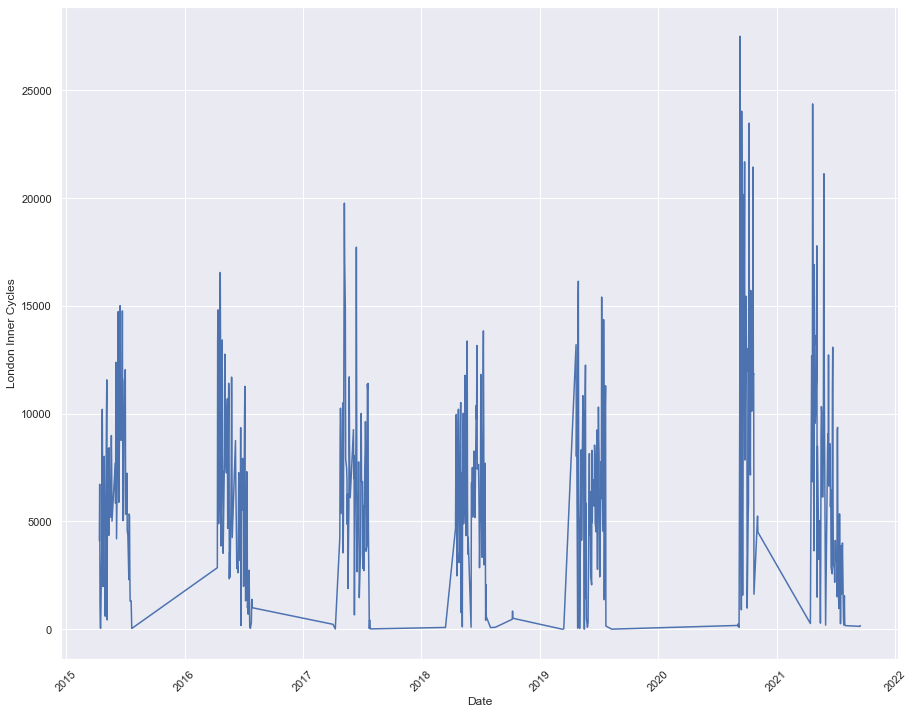

In [167]:
sns.set()
plt.ylabel('London Inner Cycles')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(date_total_ss.index, date_total_ss['Total cycles'], )

## Dickey Fuller test

In [168]:
date_total_ss.to_csv('date_total.csv')

In [169]:
from statsmodels.tsa.stattools import adfuller

# Load the time series data into a pandas DataFrame
data = pd.read_csv('date_total.csv')
data.index = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data = data['Total cycles']

# Run the Augmented Dickey-Fuller test
result = adfuller(data)

# Print the test statistic and p-value
print("Test Statistic:", result[0])
print("p-value:", result[1])

Test Statistic: -6.2604689137950045
p-value: 4.2356072523326074e-08


## Ethinic Analysis

In [313]:
london_sites

Unnamed: 0   Site ID ProgID           SurveyDescription    Easting  \
0              0  CENCY001  CENCY  Central area cycle surveys  530251.49   
1              1  CENCY002  CENCY  Central area cycle surveys  533362.68   
2              2  CENCY003  CENCY  Central area cycle surveys  532334.06   
3              3  CENCY004  CENCY  Central area cycle surveys  532052.50   
4              4  CENCY005  CENCY  Central area cycle surveys  533031.59   
...          ...       ...    ...                         ...        ...   
2018        2018  QWPCY284  QWPCY      Quietway cycle surveys  516507.00   
2019        2019  QWPCY285  QWPCY      Quietway cycle surveys  515655.00   
2020        2020  QWPCY286  QWPCY      Quietway cycle surveys  515007.00   
2021        2021  QWPCY287  QWPCY      Quietway cycle surveys  535456.00   
2022        2022  QWPCY288  QWPCY      Quietway cycle surveys  524985.00   

       Northing                            Location         Borough  \
0     178742.45  Millbank (south of Thorney Street)     Westminster   
1     181824.45                         Bishopsgate  City of London   
2     180520.37                    Southwark Bridge       Southwark   
3     179677.64               Southwark Bridge Road       Southwark   
4     180213.46                       Tooley Street       Southwark   
...         ...                                 ...             ...   
2018  188467.00                      Elmwood Avenue          Harrow   
2019  189672.00                           Peel Road          Harrow   
2020  190213.00                  Whitefriars Avenue          Harrow   
2021  186284.00                     Chatsworth Road         Hackney   
2022  170623.00                     South Park Road          Merton   

     Functional cycling area  
0                    Central  
1                    Central  
2                    Central  
3                    Central  
4                    Central  
...                      ...  
2018                   Outer  
2019                   Outer  
2020                   Outer  
2021                   Inner  
2022                   Inner  

[2023 rows x 9 columns]

In [314]:
inner

Unnamed: 0  Survey wave (year)   Site ID       Location  \
0                0                2015  INNCY001     Grove Road   
1                1                2015  INNCY001     Grove Road   
2                2                2015  INNCY001     Grove Road   
3                3                2015  INNCY001     Grove Road   
4                4                2015  INNCY001     Grove Road   
...            ...                 ...       ...            ...   
508702      508702                2021  INNCY597  Augustus Road   
508703      508703                2021  INNCY597  Augustus Road   
508704      508704                2021  INNCY597  Augustus Road   
508705      508705                2021  INNCY597  Augustus Road   
508706      508706                2021  INNCY597  Augustus Road   

          Survey date Weather         Time                       Period  \
0       mer, 20/05/15     Dry  0600 - 0615  Early Morning (06:00-07:00)   
1       mer, 20/05/15     Dry  0615 - 0630  Early Morning (06:00-07:00)   
2       mer, 20/05/15     Dry  0630 - 0645  Early Morning (06:00-07:00)   
3       mer, 20/05/15     Dry  0645 - 0700  Early Morning (06:00-07:00)   
4       mer, 20/05/15     Dry  0700 - 0715        AM peak (07:00-10:00)   
...               ...     ...          ...                          ...   
508702  mer, 26/05/21     Dry  2045 - 2100        Evening (19:00-22:00)   
508703  mer, 26/05/21     Dry  2100 - 2115        Evening (19:00-22:00)   
508704  mer, 26/05/21     Dry  2115 - 2130        Evening (19:00-22:00)   
508705  mer, 26/05/21     Dry  2130 - 2145        Evening (19:00-22:00)   
508706  mer, 26/05/21     Dry  2145 - 2200        Evening (19:00-22:00)   

         Direction  Start hour  Start minute  Number of private cycles  \
0       Northbound         6.0           0.0                         1   
1       Northbound         6.0          15.0                         2   
2       Northbound         6.0          30.0                         2   
3       Northbound         6.0          45.0                         4   
4       Northbound         7.0           0.0                         4   
...            ...         ...           ...                       ...   
508702   Westbound        20.0          45.0                         3   
508703   Westbound        21.0           0.0                         2   
508704   Westbound        21.0          15.0                         2   
508705   Westbound        21.0          30.0                         2   
508706   Westbound        21.0          45.0                         0   

        Number of cycle hire bikes  Total cycles        Date        Day  Year  \
0                                0             1  2015-05-20  Wednesday  2015   
1                                0             2  2015-05-20  Wednesday  2015   
2                                0             2  2015-05-20  Wednesday  2015   
3                                0             4  2015-05-20  Wednesday  2015   
4                                0             4  2015-05-20  Wednesday  2015   
...                            ...           ...         ...        ...   ...   
508702                           0             3  2021-05-26  Wednesday  2021   
508703                           0             2  2021-05-26  Wednesday  2021   
508704                           0             2  2021-05-26  Wednesday  2021   
508705                           0             2  2021-05-26  Wednesday  2021   
508706                           0             0  2021-05-26  Wednesday  2021   

       Month Quarter  
0        May      Q2  
1        May      Q2  
2        May      Q2  
3        May      Q2  
4        May      Q2  
...      ...     ...  
508702   May      Q2  
508703   May      Q2  
508704   May      Q2  
508705   May      Q2  
508706   May      Q2  

[508707 rows x 19 columns]

In [311]:
borough_lo[borough_lo['Borough'] == 'Brent']

Survey wave (year)   Site ID                     Location  \
46720                 2015  OUTCY054                 Watford Road   
46721                 2015  OUTCY054                 Watford Road   
46722                 2015  OUTCY054                 Watford Road   
46723                 2015  OUTCY054                 Watford Road   
46724                 2015  OUTCY054                 Watford Road   
...                    ...       ...                          ...   
316027                2021  OUTCY380  Tokyngton Recreation Ground   
316028                2021  OUTCY380  Tokyngton Recreation Ground   
316029                2021  OUTCY380  Tokyngton Recreation Ground   
316030                2021  OUTCY380  Tokyngton Recreation Ground   
316031                2021  OUTCY380  Tokyngton Recreation Ground   

          Survey date Weather         Time                       Period  \
46720   mer, 06/05/15     Dry  0600 - 0615  Early Morning (06:00-07:00)   
46721   mer, 06/05/15     Dry  0615 - 0630  Early Morning (06:00-07:00)   
46722   mer, 06/05/15     Dry  0630 - 0645  Early Morning (06:00-07:00)   
46723   mer, 06/05/15     Dry  0645 - 0700  Early Morning (06:00-07:00)   
46724   mer, 06/05/15     Dry  0700 - 0715        AM peak (07:00-10:00)   
...               ...     ...          ...                          ...   
316027  jeu, 27/05/21     Dry  2045 - 2100        Evening (19:00-22:00)   
316028  jeu, 27/05/21     Dry  2100 - 2115        Evening (19:00-22:00)   
316029  jeu, 27/05/21     Dry  2115 - 2130        Evening (19:00-22:00)   
316030  jeu, 27/05/21     Dry  2130 - 2145        Evening (19:00-22:00)   
316031  jeu, 27/05/21     Dry  2145 - 2200        Evening (19:00-22:00)   

         Direction  Start hour  Start minute  Number of male cycles  \
46720   Northbound           6             0                      0   
46721   Northbound           6            15                      2   
46722   Northbound           6            30                      1   
46723   Northbound           6            45                      0   
46724   Northbound           7             0                      0   
...            ...         ...           ...                    ...   
316027   Westbound          20            45                      1   
316028   Westbound          21             0                      1   
316029   Westbound          21            15                      0   
316030   Westbound          21            30                      0   
316031   Westbound          21            45                      1   

        Number of female cycles  Number of unknown cycles  Total cycles  \
46720                         0                         0             0   
46721                         0                         0             2   
46722                         0                         0             1   
46723                         0                         0             0   
46724                         0                         0             0   
...                         ...                       ...           ...   
316027                        0                         0             1   
316028                        0                         0             1   
316029                        0                         0             0   
316030                        0                         0             0   
316031                        0                         0             1   

              Date        Day Month Quarter Borough Functional cycling area  
46720   2015-05-06  Wednesday   May      Q2   Brent                   Outer  
46721   2015-05-06  Wednesday   May      Q2   Brent                   Outer  
46722   2015-05-06  Wednesday   May      Q2   Brent                   Outer  
46723   2015-05-06  Wednesday   May      Q2   Brent                   Outer  
46724   2015-05-06  Wednesday   May      Q2   Brent                   Outer  
...            ...        ...   ...     ...     ...     

In [413]:
ethnic_boro = pd.read_excel('ethnic_groups_14_20.xlsx')
ethnic_boro.head()

Code                  Area 2014 White 2014 Asian 2014 Black  \
0  E09000001        City of London          -          -          -   
1  E09000002  Barking and Dagenham      99000      33000      44000   
2  E09000003                Barnet     242000      53000      16000   
3  E09000004                Bexley     193000      10000      30000   
4  E09000005                 Brent     117000      99000      53000   

  2014 Mixed/ Other 2014 Total 2015 White 2015 Asian 2015 Black  ...  \
0                 -          -          -          -          -  ...   
1             22000     198000      95000      41000      52000  ...   
2             57000     367000     247000      54000      29000  ...   
3              6000     239000     195000      15000      23000  ...   
4             49000     318000     108000     108000      55000  ...   

  2019 White  2019 Asian 2019 Black 2019 Mixed/ Other 2019 Total 2020 White  \
0      12000           -          -                 -      12000          -   
1     108000       43000      59000              8000     219000      99000   
2     257000       61000      24000             55000     396000     255000   
3     207000       15000      20000              9000     251000     188000   
4     124000      101000      53000             53000     330000     117000   

  2020 Asian  2020 Black 2020 Mixed/ Other 2020 Total  
0          -           -                 -          -  
1      55000       51000             16000     222000  
2      79000       28000             35000     398000  
3      20000       28000             18000     254000  
4     138000       40000             37000     332000  

[5 rows x 37 columns]

In [305]:
white = ethnic_boro.loc[:, ['Code', 'Area', '2014 White', '2015 White', '2016 White', 
                            '2017 White', '2018 White', '2019 White', '2020 White']]
                            
white

Code                    Area 2014 White 2015 White 2016 White  \
0   E09000001          City of London          -          -          -   
1   E09000002    Barking and Dagenham      99000      95000     106000   
2   E09000003                  Barnet     242000     247000     233000   
3   E09000004                  Bexley     193000     195000     192000   
4   E09000005                   Brent     117000     108000     117000   
5   E09000006                 Bromley     269000     259000     272000   
6   E09000007                  Camden     154000     158000     152000   
7   E09000008                 Croydon     229000     221000     206000   
8   E09000009                  Ealing     170000     160000     151000   
9   E09000010                 Enfield     200000     192000     195000   
10  E09000011               Greenwich     168000     170000     164000   
11  E09000012                 Hackney     135000     145000     153000   
12  E09000013  Hammersmith and Fulham     127000     119000     121000   
13  E09000014                Haringey     160000     164000     168000   
14  E09000015                  Harrow      99000     103000     110000   
15  E09000016                Havering     211000     217000     219000   
16  E09000017              Hillingdon     170000     159000     172000   
17  E09000018                Hounslow     139000     128000     119000   
18  E09000019               Islington     155000     151000     143000   
19  E09000020  Kensington and Chelsea     107000     104000     102000   
20  E09000021    Kingston upon Thames     122000     130000     126000   
21  E09000022                 Lambeth     209000     199000     203000   
22  E09000023                Lewisham     170000     161000     186000   
23  E09000024                  Merton     123000     134000     129000   
24  E09000025                  Newham      96000     107000     114000   
25  E09000026               Redbridge     133000     123000     125000   
26  E09000027    Richmond upon Thames     165000     166000     169000   
27  E09000028               Southwark     172000     165000     170000   
28  E09000029                  Sutton     143000     152000     145000   
29  E09000030           Tower Hamlets     112000     109000     124000   
30  E09000031          Waltham Forest     138000     140000     156000   
31  E09000032              Wandsworth     224000     233000     227000   
32  E09000033             Westminster     134000     132000     136000   

    2017 White 2018 White  2019 White 2020 White  
0        10000          -       12000          -  
1       104000     109000      108000      99000  
2       264000     250000      257000     255000  
3       194000     195000      207000     188000  
4       121000     102000      124000     117000  
5       255000     267000      262000     264000  
6       157000     158000      162000     155000  
7       213000     227000      228000     224000  
8       156000     174000      172000     163000  
9       213000     206000      199000     218000  
10      178000     178000      175000     158000  
11      150000     144000      159000     167000  
12      122000     119000      126000     122000  
13      180000     180000      182000     208000  
14      110000     110000      106000     101000  
15      219000     216000      202000     196000  
16      168000     154000      140000     154000  
17      119000     130000      125000     125000  
18      150000     165000      158000     177000  
19       97000     100000      102000     109000  
20      124000     123000      130000     135000  
21      217000     172000      200000     215000  
22      189000     193000      195000     194000  
23      132000     135000      121000     140000  
24      110000     111000      122000     165000  
25      113000     143000      145000     132000  
26      162000     170000      167000     163000  
27      179000     200000      183000     183000  
28      13900

In [306]:
borough_group

Borough  Year  Number of private cycles  Number of cycle hire bikes  \
0        Camden  2014                    241626                       28591   
1        Camden  2015                    237176                       27424   
2        Camden  2016                    247569                       28614   
3        Camden  2017                    236667                       29543   
4        Camden  2018                    255108                       30952   
..          ...   ...                       ...                         ...   
59  Westminster  2017                    394995                       57825   
60  Westminster  2018                    416891                       64565   
61  Westminster  2019                    425736                       68449   
62  Westminster  2020                    200637                       35171   
63  Westminster  2021                    294527                       53680   

    Total_cycles  
0       270217.0  
1       264600.0  
2       276183.0  
3       266210.0  
4       286060.0  
..           ...  
59      452820.0  
60      481456.0  
61      494185.0  
62      235808.0  
63      348207.0  

[64 rows x 5 columns]

In [343]:
white_outer = white[(white['Area'].isin(['Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Havering',
                                         'Enfield', 'Newham', 'Haringey', 'Greenwich', 'Croydon',
                                         'Lewisham', 'Bexley', 'Bromley', 'Kingston upon Thames', 'Sutton',
                                         'Merton', 'Richmond upon Thames', 'Hillingdon', 'Ealing',
                                         'Hounslow', 'Barnet', 'Harrow', 'Brent', 'Lambeth', 'Wandsworth']))].reset_index() 

white_outer.head()

index       Code                  Area 2014 White 2015 White 2016 White  \
0      1  E09000002  Barking and Dagenham      99000      95000     106000   
1      2  E09000003                Barnet     242000     247000     233000   
2      3  E09000004                Bexley     193000     195000     192000   
3      4  E09000005                 Brent     117000     108000     117000   
4      5  E09000006               Bromley     269000     259000     272000   

   2017 White 2018 White  2019 White 2020 White  
0      104000     109000      108000      99000  
1      264000     250000      257000     255000  
2      194000     195000      207000     188000  
3      121000     102000      124000     117000  
4      255000     267000      262000     264000

In [378]:
white_outer.sort_values(by=['2019 White'], ascending=False)

index       Code                  Area 2014 White 2015 White 2016 White  \
4       5  E09000006               Bromley     269000     259000     272000   
1       2  E09000003                Barnet     242000     247000     233000   
23     31  E09000032            Wandsworth     224000     233000     227000   
5       7  E09000008               Croydon     229000     221000     206000   
2       3  E09000004                Bexley     193000     195000     192000   
11     15  E09000016              Havering     211000     217000     219000   
15     21  E09000022               Lambeth     209000     199000     203000   
7       9  E09000010               Enfield     200000     192000     195000   
16     22  E09000023              Lewisham     170000     161000     186000   
9      13  E09000014              Haringey     160000     164000     168000   
22     30  E09000031        Waltham Forest     138000     140000     156000   
8      10  E09000011             Greenwich     168000     170000     164000   
6       8  E09000009                Ealing     170000     160000     151000   
20     26  E09000027  Richmond upon Thames     165000     166000     169000   
21     28  E09000029                Sutton     143000     152000     145000   
19     25  E09000026             Redbridge     133000     123000     125000   
12     16  E09000017            Hillingdon     170000     159000     172000   
14     20  E09000021  Kingston upon Thames     122000     130000     126000   
13     17  E09000018              Hounslow     139000     128000     119000   
3       4  E09000005                 Brent     117000     108000     117000   
18     24  E09000025                Newham      96000     107000     114000   
17     23  E09000024                Merton     123000     134000     129000   
0       1  E09000002  Barking and Dagenham      99000      95000     106000   
10     14  E09000015                Harrow      99000     103000     110000   

    2017 White 2018 White  2019 White 2020 White  
4       255000     267000      262000     264000  
1       264000     250000      257000     255000  
23      227000     242000      245000     249000  
5       213000     227000      228000     224000  
2       194000     195000      207000     188000  
11      219000     216000      202000     196000  
15      217000     172000      200000     215000  
7       213000     206000      199000     218000  
16      189000     193000      195000     194000  
9       180000     180000      182000     208000  
22      153000     142000      180000     188000  
8       178000     178000      175000     158000  
6       156000     174000      172000     163000  
20      162000     170000      167000     163000  
21      139000     147000      161000     136000  
19      113000     143000      145000     132000  
12      168000     154000      140000     154000  
14      124000     123000      130000     135000  
13      119000     130000      125000     125000  
3       121000     102000      124000     117000  
18      110000     111000      122000     165000  
17      132000     135000      121000     140000  
0       104000     109000      108000      99000  
10      110000     110000      106000     101000

In [379]:
outer_ft.sort_values(by=['2019 Pay (£)'], ascending=False)

Code                  Area 2014 Pay (£) 2015 Pay (£)  2016 Pay (£)  \
20  00BD  Richmond upon Thames        763.9        743.9         784.6   
23  00BJ            Wandsworth        708.3        719.7         762.3   
4   00AF               Bromley        697.9        682.1         714.5   
14  00AX  Kingston upon Thames        704.2        710.2         707.8   
15  00AY               Lambeth        628.3        616.5         616.2   
17  00BA                Merton        614.2        619.6         663.3   
10  00AQ                Harrow        592.9        626.9         636.4   
19  00BC             Redbridge        616.4        653.7         603.0   
22  00BH        Waltham Forest        542.9        546.9         577.1   
8   00AL             Greenwich        590.5        597.3         597.6   
1   00AC                Barnet        617.6        628.5         637.7   
5   00AH               Croydon        591.8        602.1         602.9   
2   00AD                Bexley        612.4          609         646.7   
9   00AP              Haringey        573.8        576.5         575.3   
21  00BF                Sutton        581.4        605.6         638.0   
13  00AT              Hounslow        562.6        560.6         585.8   
16  00AZ              Lewisham        604.8        606.6         617.0   
11  00AR              Havering        615.4        624.7         622.9   
7   00AK               Enfield        557.8        565.9         574.9   
18  00BB                Newham        508.3        505.8         524.2   
6   00AJ                Ealing          575        561.5         580.5   
12  00AS            Hillingdon        577.5        603.6         613.3   
3   00AE                 Brent        547.5        553.2         544.4   
0   00AB  Barking and Dagenham        511.8        534.1         543.3   

   2017 Pay (£)  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
20        739.9         799.4        820.3          885        812.5  
23        757.4         773.5        811.8          807        842.9  
4         737.4         753.7        785.3        805.9        787.1  
14        706.9         736.7        742.8        759.4        766.6  
15        666.1         689.9        714.4        766.6        746.4  
17          675         688.3        710.4        703.7        681.7  
10        656.1         671.6        693.5        715.4        748.6  
19        644.9         633.2        683.9        703.9        732.4  
22        574.9         622.9        680.3        716.2        727.7  
8         638.9         659.9        679.6          684          740  
1           690         677.6        677.5        663.1        685.2  
5           631         653.6        671.4        676.8        707.8  
2         624.6         641.5          671        731.4        709.4  
9         624.4         653.4        670.8        707.9        703.1  
21        639.5         659.7        668.6        651.1        695.8  
13        596.5         617.4        658.8        589.2        675.2  
16        633.7         622.2        654.1        689.7        721.4  
11          631         641.8        650.4        690.2        705.4  
7         587.7         590.0        638.9        643.2        670.4  
18        584.9         587.7        622.8        631.6        677.6  
6         597.9         631.5        622.4        632.3        670.7  
12        574.9         604.1        621.7        653.4        697.5  
3         563.5         574.9        609.6        639.5        623.8  
0         555.9         572.3        589.8        580.7        643.4

In [346]:
white_outer_2019 = white_outer.loc[:, ['Code', 'Area', '2019 White']]
white_outer_2019

Code                  Area  2019 White
0   E09000002  Barking and Dagenham      108000
1   E09000003                Barnet      257000
2   E09000004                Bexley      207000
3   E09000005                 Brent      124000
4   E09000006               Bromley      262000
5   E09000008               Croydon      228000
6   E09000009                Ealing      172000
7   E09000010               Enfield      199000
8   E09000011             Greenwich      175000
9   E09000014              Haringey      182000
10  E09000015                Harrow      106000
11  E09000016              Havering      202000
12  E09000017            Hillingdon      140000
13  E09000018              Hounslow      125000
14  E09000021  Kingston upon Thames      130000
15  E09000022               Lambeth      200000
16  E09000023              Lewisham      195000
17  E09000024                Merton      121000
18  E09000025                Newham      122000
19  E09000026             Redbridge      145000
20  E09000027  Richmond upon Thames      167000
21  E09000029                Sutton      161000
22  E09000031        Waltham Forest      180000
23  E09000032            Wandsworth      245000

In [348]:
outer_ft_2019 = outer_ft.loc[:, ['Code', 'Area', '2019 Pay (£)']]
outer_ft_2019

Code                  Area 2019 Pay (£)
0   00AB  Barking and Dagenham        589.8
1   00AC                Barnet        677.5
2   00AD                Bexley          671
3   00AE                 Brent        609.6
4   00AF               Bromley        785.3
5   00AH               Croydon        671.4
6   00AJ                Ealing        622.4
7   00AK               Enfield        638.9
8   00AL             Greenwich        679.6
9   00AP              Haringey        670.8
10  00AQ                Harrow        693.5
11  00AR              Havering        650.4
12  00AS            Hillingdon        621.7
13  00AT              Hounslow        658.8
14  00AX  Kingston upon Thames        742.8
15  00AY               Lambeth        714.4
16  00AZ              Lewisham        654.1
17  00BA                Merton        710.4
18  00BB                Newham        622.8
19  00BC             Redbridge        683.9
20  00BD  Richmond upon Thames        820.3
21  00BF                Sutton        668.6
22  00BH        Waltham Forest        680.3
23  00BJ            Wandsworth        811.8

In [382]:
white_outer_ft_19 = pd.merge(white_outer_2019,
                 outer_ft_2019[['Area', '2019 Pay (£)']],
                 on='Area')
                             
white_outer_ft_19

Code                  Area  2019 White 2019 Pay (£)
0   E09000002  Barking and Dagenham      108000        589.8
1   E09000003                Barnet      257000        677.5
2   E09000004                Bexley      207000          671
3   E09000005                 Brent      124000        609.6
4   E09000006               Bromley      262000        785.3
5   E09000008               Croydon      228000        671.4
6   E09000009                Ealing      172000        622.4
7   E09000010               Enfield      199000        638.9
8   E09000011             Greenwich      175000        679.6
9   E09000014              Haringey      182000        670.8
10  E09000015                Harrow      106000        693.5
11  E09000016              Havering      202000        650.4
12  E09000017            Hillingdon      140000        621.7
13  E09000018              Hounslow      125000        658.8
14  E09000021  Kingston upon Thames      130000        742.8
15  E09000022               Lambeth      200000        714.4
16  E09000023              Lewisham      195000        654.1
17  E09000024                Merton      121000        710.4
18  E09000025                Newham      122000        622.8
19  E09000026             Redbridge      145000        683.9
20  E09000027  Richmond upon Thames      167000        820.3
21  E09000029                Sutton      161000        668.6
22  E09000031        Waltham Forest      180000        680.3
23  E09000032            Wandsworth      245000        811.8

In [376]:
white_outer_ft_19.sort_values(by=['2019 Pay (£)'], ascending=False)

Code                  Area  2019 White 2019 Pay (£)
20  E09000027  Richmond upon Thames      167000        820.3
23  E09000032            Wandsworth      245000        811.8
4   E09000006               Bromley      262000        785.3
14  E09000021  Kingston upon Thames      130000        742.8
15  E09000022               Lambeth      200000        714.4
17  E09000024                Merton      121000        710.4
10  E09000015                Harrow      106000        693.5
19  E09000026             Redbridge      145000        683.9
22  E09000031        Waltham Forest      180000        680.3
8   E09000011             Greenwich      175000        679.6
1   E09000003                Barnet      257000        677.5
5   E09000008               Croydon      228000        671.4
2   E09000004                Bexley      207000          671
9   E09000014              Haringey      182000        670.8
21  E09000029                Sutton      161000        668.6
13  E09000018              Hounslow      125000        658.8
16  E09000023              Lewisham      195000        654.1
11  E09000016              Havering      202000        650.4
7   E09000010               Enfield      199000        638.9
18  E09000025                Newham      122000        622.8
6   E09000009                Ealing      172000        622.4
12  E09000017            Hillingdon      140000        621.7
3   E09000005                 Brent      124000        609.6
0   E09000002  Barking and Dagenham      108000        589.8

In [390]:
outer_reshape.head()

Borough  2015 Male cycles  2015 Female cycles  \
0  Barking & Dagenham              1177                 139   
1              Barnet              2126                 262   
2              Bexley               987                  88   
3               Brent              3183                 484   
4             Bromley              2347                 267   

   2015 Unknown cycles  2015 Total cycles  2016 Male cycles  \
0                   34               1350              1073   
1                   18               2406              2310   
2                   32               1107               993   
3                   38               3705              3169   
4                   40               2654              2136   

   2016 Female cycles  2016 Unknown cycles  2016 Total cycles  \
0                 196                   10               1279   
1                 298                   29               2637   
2                  55                   19               1067   
3                 467                   13               3649   
4                 153                   16               2305   

   2017 Male cycles  ...  2019 Unknown cycles  2019 Total cycles  \
0              1025  ...                   30               1111   
1              2255  ...                   68               2773   
2              1032  ...                   10               1056   
3              3577  ...                   48               3553   
4              2566  ...                   35               2650   

   2020 Male cycles  2020 Female cycles  2020 Unknown cycles  \
0            1066.0               139.0                  4.0   
1            1049.0                62.0                  0.0   
2             864.0                74.0                 31.0   
3            2988.0               346.0                  7.0   
4            1416.0               128.0                106.0   

   2020 Total cycles  2021 Male cycles  2021 Female cycles  \
0             1209.0              1269                 168   
1             1111.0              2930                 854   
2              969.0               979                  59   
3             3341.0              3929                 860   
4             1650.0              3087                 351   

   2021 Unknown cycles  2021 Total cycles  
0                    0               1437  
1                    3               3787  
2                    0               1038  
3                   16               4805  
4                    1               3439  

[5 rows x 29 columns]

In [401]:
white_outer_2019.sort_values(by=['2019 White'], ascending=False)

Code                  Area  2019 White
4   E09000006               Bromley      262000
1   E09000003                Barnet      257000
23  E09000032            Wandsworth      245000
5   E09000008               Croydon      228000
2   E09000004                Bexley      207000
11  E09000016              Havering      202000
15  E09000022               Lambeth      200000
7   E09000010               Enfield      199000
16  E09000023              Lewisham      195000
9   E09000014              Haringey      182000
22  E09000031        Waltham Forest      180000
8   E09000011             Greenwich      175000
6   E09000009                Ealing      172000
20  E09000027  Richmond upon Thames      167000
21  E09000029                Sutton      161000
19  E09000026             Redbridge      145000
12  E09000017            Hillingdon      140000
14  E09000021  Kingston upon Thames      130000
13  E09000018              Hounslow      125000
3   E09000005                 Brent      124000
18  E09000025                Newham      122000
17  E09000024                Merton      121000
0   E09000002  Barking and Dagenham      108000
10  E09000015                Harrow      106000

In [394]:
outer_reshape.loc[:, ['Borough', '2019 Total cycles']].sort_values(by=['2019 Total cycles'], ascending=False)

Borough  2019 Total cycles
20  Richmond upon Thames              10730
6                 Ealing               7455
13              Hounslow               6433
18                Newham               6144
14  Kingston upon Thames               5882
16              Lewisham               4796
22        Waltham Forest               4421
17                Merton               4294
9               Haringey               3743
3                  Brent               3553
12            Hillingdon               3489
8              Greenwich               3072
1                 Barnet               2773
5                Croydon               2718
4                Bromley               2650
21                Sutton               2417
7                Enfield               1561
19             Redbridge               1426
11              Havering               1344
0     Barking & Dagenham               1111
2                 Bexley               1056
10                Harrow                797
15               Lambeth                185
23            Wandsworth                 67

In [395]:
outer_ft.sort_values(by=['2019 Pay (£)'], ascending=False)

Code                  Area 2014 Pay (£) 2015 Pay (£)  2016 Pay (£)  \
20  00BD  Richmond upon Thames        763.9        743.9         784.6   
23  00BJ            Wandsworth        708.3        719.7         762.3   
4   00AF               Bromley        697.9        682.1         714.5   
14  00AX  Kingston upon Thames        704.2        710.2         707.8   
15  00AY               Lambeth        628.3        616.5         616.2   
17  00BA                Merton        614.2        619.6         663.3   
10  00AQ                Harrow        592.9        626.9         636.4   
19  00BC             Redbridge        616.4        653.7         603.0   
22  00BH        Waltham Forest        542.9        546.9         577.1   
8   00AL             Greenwich        590.5        597.3         597.6   
1   00AC                Barnet        617.6        628.5         637.7   
5   00AH               Croydon        591.8        602.1         602.9   
2   00AD                Bexley        612.4          609         646.7   
9   00AP              Haringey        573.8        576.5         575.3   
21  00BF                Sutton        581.4        605.6         638.0   
13  00AT              Hounslow        562.6        560.6         585.8   
16  00AZ              Lewisham        604.8        606.6         617.0   
11  00AR              Havering        615.4        624.7         622.9   
7   00AK               Enfield        557.8        565.9         574.9   
18  00BB                Newham        508.3        505.8         524.2   
6   00AJ                Ealing          575        561.5         580.5   
12  00AS            Hillingdon        577.5        603.6         613.3   
3   00AE                 Brent        547.5        553.2         544.4   
0   00AB  Barking and Dagenham        511.8        534.1         543.3   

   2017 Pay (£)  2018 Pay (£) 2019 Pay (£) 2020 Pay (£) 2021 Pay (£)  
20        739.9         799.4        820.3          885        812.5  
23        757.4         773.5        811.8          807        842.9  
4         737.4         753.7        785.3        805.9        787.1  
14        706.9         736.7        742.8        759.4        766.6  
15        666.1         689.9        714.4        766.6        746.4  
17          675         688.3        710.4        703.7        681.7  
10        656.1         671.6        693.5        715.4        748.6  
19        644.9         633.2        683.9        703.9        732.4  
22        574.9         622.9        680.3        716.2        727.7  
8         638.9         659.9        679.6          684          740  
1           690         677.6        677.5        663.1        685.2  
5           631         653.6        671.4        676.8        707.8  
2         624.6         641.5          671        731.4        709.4  
9         624.4         653.4        670.8        707.9        703.1  
21        639.5         659.7        668.6        651.1        695.8  
13        596.5         617.4        658.8        589.2        675.2  
16        633.7         622.2        654.1        689.7        721.4  
11          631         641.8        650.4        690.2        705.4  
7         587.7         590.0        638.9        643.2        670.4  
18        584.9         587.7        622.8        631.6        677.6  
6         597.9         631.5        622.4        632.3        670.7  
12        574.9         604.1        621.7        653.4        697.5  
3         563.5         574.9        609.6        639.5        623.8  
0         555.9         572.3        589.8        580.7        643.4

In [396]:
outer_reshape

Borough  2015 Male cycles  2015 Female cycles  \
0     Barking & Dagenham              1177                 139   
1                 Barnet              2126                 262   
2                 Bexley               987                  88   
3                  Brent              3183                 484   
4                Bromley              2347                 267   
5                Croydon              2319                 187   
6                 Ealing              5767                1264   
7                Enfield              1496                 347   
8              Greenwich              2430                 247   
9               Haringey              3533                 354   
10                Harrow               756                 190   
11              Havering              1418                 136   
12            Hillingdon              3439                 432   
13              Hounslow              5823                 937   
14  Kingston upon Thames              4359                 803   
15               Lambeth               149                  27   
16              Lewisham              3760                 677   
17                Merton              4185                 950   
18                Newham              4325                 811   
19             Redbridge              1601                 169   
20  Richmond upon Thames              8809                1926   
21                Sutton              2047                 390   
22        Waltham Forest              3325                 579   
23            Wandsworth                33                  11   

    2015 Unknown cycles  2015 Total cycles  2016 Male cycles  \
0                    34               1350              1073   
1                    18               2406              2310   
2                    32               1107               993   
3                    38               3705              3169   
4                    40               2654              2136   
5                    35               2541              2498   
6                   125               7156              5444   
7                     0               1843              1339   
8                    54               2731              2482   
9                    41               3928              3484   
10                    6                952               641   
11                   22               1576              1408   
12                   69               3940              3224   
13                   76               6836              5502   
14                  123               5285              4594   
15                    0                176               178   
16                  101               4538              3673   
17                   42               5177              3975   
18                   52               5188              4448   
19                   63               1833              1441   
20                  169              10904              8916   
21                    9               2446              2172   
22                    8               3912              3203   
23                    0                 44                42   

    2016 Female cycles  2016 Unknown cycles  2016 Total cycles  \
0                  196                   10               1279   
1                  298                   29               2637   
2                   55                   19               1067   
3                  467                   13               3649   
4                  153                   16               2305   
5                  159                   16               2673   
6                 1256                   61               6761   
7                  247                    2               1588   
8                  288                   46               2816   
9                  377                   23               3884   
10                 143                 

When looking at the year 2019 which is the most recent year in both dataframe, unaffected by Covid-19. Unable to see any correlation or pattern between, earnings and cycling in boroughs which have a high white population, there does however seem to be some suggestion that earnings and cycling could be lower in boroughs with a lower white population and therefore perhaps one ethnic groups is being marginalised. 

# Black cyclists in Outer London

In [403]:
ethnic_boro.head()

Code                  Area 2014 White 2014 Asian 2014 Black  \
0  E09000001        City of London          -          -          -   
1  E09000002  Barking and Dagenham      99000      33000      44000   
2  E09000003                Barnet     242000      53000      16000   
3  E09000004                Bexley     193000      10000      30000   
4  E09000005                 Brent     117000      99000      53000   

  2014 Mixed/ Other 2014 Total 2015 White 2015 Asian 2015 Black  ...  \
0                 -          -          -          -          -  ...   
1             22000     198000      95000      41000      52000  ...   
2             57000     367000     247000      54000      29000  ...   
3              6000     239000     195000      15000      23000  ...   
4             49000     318000     108000     108000      55000  ...   

  2019 White  2019 Asian 2019 Black 2019 Mixed/ Other 2019  Total 2020 White  \
0      12000           -          -                 -       12000          -   
1     108000       43000      59000              8000      219000      99000   
2     257000       61000      24000             55000      396000     255000   
3     207000       15000      20000              9000      251000     188000   
4     124000      101000      53000             53000      330000     117000   

  2020 Asian  2020 Black 2020 Mixed/ Other 2020 Total  
0          -           -                 -          -  
1      55000       51000             16000     222000  
2      79000       28000             35000     398000  
3      20000       28000             18000     254000  
4     138000       40000             37000     332000  

[5 rows x 37 columns]

In [467]:
ethnic_boro = ethnic_boro.replace(to_replace="Barking and Dagenham",
                                              value="Barking & Dagenham")

In [468]:
ethinic_2019 = ethnic_boro.loc[:, ['Code', 'Area', '2019 White', '2019 Asian', '2019 Black',
                                    '2019 Mixed/ Other', '2019 Total']]

ethinic_2019

Code                    Area  2019 White 2019 Asian 2019 Black  \
0   E09000001          City of London       12000          -          -   
1   E09000002      Barking & Dagenham      108000      43000      59000   
2   E09000003                  Barnet      257000      61000      24000   
3   E09000004                  Bexley      207000      15000      20000   
4   E09000005                   Brent      124000     101000      53000   
5   E09000006                 Bromley      262000      26000      24000   
6   E09000007                  Camden      162000      30000      24000   
7   E09000008                 Croydon      228000      64000      75000   
8   E09000009                  Ealing      172000      88000      40000   
9   E09000010                 Enfield      199000      47000      61000   
10  E09000011               Greenwich      175000      43000      53000   
11  E09000012                 Hackney      159000      24000      70000   
12  E09000013  Hammersmith and Fulham      126000      14000      21000   
13  E09000014                Haringey      182000      16000      39000   
14  E09000015                  Harrow      106000     108000       8000   
15  E09000016                Havering      202000      28000      23000   
16  E09000017              Hillingdon      140000     122000      27000   
17  E09000018                Hounslow      125000      97000      23000   
18  E09000019               Islington      158000      17000      35000   
19  E09000020  Kensington and Chelsea      102000      18000      15000   
20  E09000021    Kingston upon Thames      130000      23000       8000   
21  E09000022                 Lambeth      200000      21000      62000   
22  E09000023                Lewisham      195000      23000      71000   
23  E09000024                  Merton      121000      39000      25000   
24  E09000025                  Newham      122000     137000      65000   
25  E09000026               Redbridge      145000     142000      16000   
26  E09000027    Richmond upon Thames      167000      11000       3000   
27  E09000028               Southwark      183000      21000      77000   
28  E09000029                  Sutton      161000      23000       7000   
29  E09000030           Tower Hamlets      135000     150000      15000   
30  E09000031          Waltham Forest      180000      34000      36000   
31  E09000032              Wandsworth      245000      39000      21000   
32  E09000033             Westminster      140000      31000      15000   

   2019 Mixed/ Other  2019 Total  
0                  -       12000  
1               8000      219000  
2              55000      396000  
3               9000      251000  
4              53000      330000  
5              23000      335000  
6              44000      260000  
7              22000      389000  
8              44000      343000  
9              33000      340000  
10             18000      289000  
11             31000      285000  
12             19000      180000  
13             43000      279000  
14             28000      250000  
15              7000      261000  
16             21000      309000  
17             27000      273000  
18             29000      240000  
19             18000      153000  
20             18000      179000  
21             43000      326000  
22             21000      309000  
23             24000      209000  
24             35000      358000  
25              8000      311000  
26             16000      198000  
27             39000      320000  
28             15000      206000  
29             20000      320000  
30             30000      280000  
31             18000      324000  
32             53000      240000

In [471]:
outer_ethnic_2019 = ethinic_2019[(ethinic_2019['Area'].isin(['Waltham Forest', 'Redbridge', 'Barking & Dagenham', 
                                                              'Havering', 'Enfield', 'Newham', 'Haringey',
                                                              'Greenwich', 'Croydon', 'Lewisham', 'Bexley',
                                                              'Bromley', 'Kingston upon Thames', 'Sutton', 'Merton',
                                                              'Richmond upon Thames', 'Hillingdon', 'Ealing',
                                                              'Hounslow', 'Barnet', 'Harrow', 'Brent', 
                                                              'Lambeth', 'Wandsworth']))].reset_index() 

outer_ethnic_2019

index       Code                  Area  2019 White 2019 Asian 2019 Black  \
0       1  E09000002    Barking & Dagenham      108000      43000      59000   
1       2  E09000003                Barnet      257000      61000      24000   
2       3  E09000004                Bexley      207000      15000      20000   
3       4  E09000005                 Brent      124000     101000      53000   
4       5  E09000006               Bromley      262000      26000      24000   
5       7  E09000008               Croydon      228000      64000      75000   
6       8  E09000009                Ealing      172000      88000      40000   
7       9  E09000010               Enfield      199000      47000      61000   
8      10  E09000011             Greenwich      175000      43000      53000   
9      13  E09000014              Haringey      182000      16000      39000   
10     14  E09000015                Harrow      106000     108000       8000   
11     15  E09000016              Havering      202000      28000      23000   
12     16  E09000017            Hillingdon      140000     122000      27000   
13     17  E09000018              Hounslow      125000      97000      23000   
14     20  E09000021  Kingston upon Thames      130000      23000       8000   
15     21  E09000022               Lambeth      200000      21000      62000   
16     22  E09000023              Lewisham      195000      23000      71000   
17     23  E09000024                Merton      121000      39000      25000   
18     24  E09000025                Newham      122000     137000      65000   
19     25  E09000026             Redbridge      145000     142000      16000   
20     26  E09000027  Richmond upon Thames      167000      11000       3000   
21     28  E09000029                Sutton      161000      23000       7000   
22     30  E09000031        Waltham Forest      180000      34000      36000   
23     31  E09000032            Wandsworth      245000      39000      21000   

   2019 Mixed/ Other  2019 Total  
0               8000      219000  
1              55000      396000  
2               9000      251000  
3              53000      330000  
4              23000      335000  
5              22000      389000  
6              44000      343000  
7              33000      340000  
8              18000      289000  
9              43000      279000  
10             28000      250000  
11              7000      261000  
12             21000      309000  
13             27000      273000  
14             18000      179000  
15             43000      326000  
16             21000      309000  
17             24000      209000  
18             35000      358000  
19              8000      311000  
20             16000      198000  
21             15000      206000  
22             30000      280000  
23             18000      324000

In [472]:
outer_ethnic_2019 = outer_ethnic_2019.drop(['index'], axis=1)
outer_ethnic_2019

Code                  Area  2019 White 2019 Asian 2019 Black  \
0   E09000002    Barking & Dagenham      108000      43000      59000   
1   E09000003                Barnet      257000      61000      24000   
2   E09000004                Bexley      207000      15000      20000   
3   E09000005                 Brent      124000     101000      53000   
4   E09000006               Bromley      262000      26000      24000   
5   E09000008               Croydon      228000      64000      75000   
6   E09000009                Ealing      172000      88000      40000   
7   E09000010               Enfield      199000      47000      61000   
8   E09000011             Greenwich      175000      43000      53000   
9   E09000014              Haringey      182000      16000      39000   
10  E09000015                Harrow      106000     108000       8000   
11  E09000016              Havering      202000      28000      23000   
12  E09000017            Hillingdon      140000     122000      27000   
13  E09000018              Hounslow      125000      97000      23000   
14  E09000021  Kingston upon Thames      130000      23000       8000   
15  E09000022               Lambeth      200000      21000      62000   
16  E09000023              Lewisham      195000      23000      71000   
17  E09000024                Merton      121000      39000      25000   
18  E09000025                Newham      122000     137000      65000   
19  E09000026             Redbridge      145000     142000      16000   
20  E09000027  Richmond upon Thames      167000      11000       3000   
21  E09000029                Sutton      161000      23000       7000   
22  E09000031        Waltham Forest      180000      34000      36000   
23  E09000032            Wandsworth      245000      39000      21000   

   2019 Mixed/ Other  2019 Total  
0               8000      219000  
1              55000      396000  
2               9000      251000  
3              53000      330000  
4              23000      335000  
5              22000      389000  
6              44000      343000  
7              33000      340000  
8              18000      289000  
9              43000      279000  
10             28000      250000  
11              7000      261000  
12             21000      309000  
13             27000      273000  
14             18000      179000  
15             43000      326000  
16             21000      309000  
17             24000      209000  
18             35000      358000  
19              8000      311000  
20             16000      198000  
21             15000      206000  
22             30000      280000  
23             18000      324000

In [473]:
outer_reshape.head()

Borough  2015 Male cycles  2015 Female cycles  \
0  Barking & Dagenham              1177                 139   
1              Barnet              2126                 262   
2              Bexley               987                  88   
3               Brent              3183                 484   
4             Bromley              2347                 267   

   2015 Unknown cycles  2015 Total cycles  2016 Male cycles  \
0                   34               1350              1073   
1                   18               2406              2310   
2                   32               1107               993   
3                   38               3705              3169   
4                   40               2654              2136   

   2016 Female cycles  2016 Unknown cycles  2016 Total cycles  \
0                 196                   10               1279   
1                 298                   29               2637   
2                  55                   19               1067   
3                 467                   13               3649   
4                 153                   16               2305   

   2017 Male cycles  ...  2019 Unknown cycles  2019 Total cycles  \
0              1025  ...                   30               1111   
1              2255  ...                   68               2773   
2              1032  ...                   10               1056   
3              3577  ...                   48               3553   
4              2566  ...                   35               2650   

   2020 Male cycles  2020 Female cycles  2020 Unknown cycles  \
0            1066.0               139.0                  4.0   
1            1049.0                62.0                  0.0   
2             864.0                74.0                 31.0   
3            2988.0               346.0                  7.0   
4            1416.0               128.0                106.0   

   2020 Total cycles  2021 Male cycles  2021 Female cycles  \
0             1209.0              1269                 168   
1             1111.0              2930                 854   
2              969.0               979                  59   
3             3341.0              3929                 860   
4             1650.0              3087                 351   

   2021 Unknown cycles  2021 Total cycles  
0                    0               1437  
1                    3               3787  
2                    0               1038  
3                   16               4805  
4                    1               3439  

[5 rows x 29 columns]

In [474]:
outer_cycles_2019 = outer_reshape.loc[:, ['Borough', '2019 Male cycles', '2019 Female cycles', '2019 Unknown cycles',
                                   '2019 Total cycles']].reset_index()

outer_cycles_2019 = outer_cycles_2019.drop(['index'], axis=1)
outer_cycles_2019

Borough  2019 Male cycles  2019 Female cycles  \
0     Barking & Dagenham               939                 142   
1                 Barnet              2369                 336   
2                 Bexley               954                  92   
3                  Brent              3112                 393   
4                Bromley              2402                 213   
5                Croydon              2508                 202   
6                 Ealing              5757                1637   
7                Enfield              1342                 212   
8              Greenwich              2698                 363   
9               Haringey              3283                 417   
10                Harrow               661                 125   
11              Havering              1189                 147   
12            Hillingdon              3012                 444   
13              Hounslow              5210                1165   
14  Kingston upon Thames              4730                1060   
15               Lambeth               152                  33   
16              Lewisham              4204                 572   
17                Merton              3723                 495   
18                Newham              5121                 956   
19             Redbridge              1225                 193   
20  Richmond upon Thames              8158                2510   
21                Sutton              2065                 291   
22        Waltham Forest              3468                 949   
23            Wandsworth                46                  21   

    2019 Unknown cycles  2019 Total cycles  
0                    30               1111  
1                    68               2773  
2                    10               1056  
3                    48               3553  
4                    35               2650  
5                     8               2718  
6                    61               7455  
7                     7               1561  
8                    11               3072  
9                    43               3743  
10                   11                797  
11                    8               1344  
12                   33               3489  
13                   58               6433  
14                   92               5882  
15                    0                185  
16                   20               4796  
17                   76               4294  
18                   67               6144  
19                    8               1426  
20                   62              10730  
21                   61               2417  
22                    4               4421  
23                    0                 67

In [591]:
female_total = outer_cycles_2019.loc[:, ['Borough', '2019 Female cycles', 
                                         '2019 Total cycles']]
female_total

Borough  2019 Female cycles  2019 Total cycles
0     Barking & Dagenham                 142               1111
1                 Barnet                 336               2773
2                 Bexley                  92               1056
3                  Brent                 393               3553
4                Bromley                 213               2650
5                Croydon                 202               2718
6                 Ealing                1637               7455
7                Enfield                 212               1561
8              Greenwich                 363               3072
9               Haringey                 417               3743
10                Harrow                 125                797
11              Havering                 147               1344
12            Hillingdon                 444               3489
13              Hounslow                1165               6433
14  Kingston upon Thames                1060               5882
15               Lambeth                  33                185
16              Lewisham                 572               4796
17                Merton                 495               4294
18                Newham                 956               6144
19             Redbridge                 193               1426
20  Richmond upon Thames                2510              10730
21                Sutton                 291               2417
22        Waltham Forest                 949               4421
23            Wandsworth                  21                 67

In [595]:
pop_2019 =  outer_ethinic_2019.loc[:, ['Area', '2019 Total']]
pop_2019

Area  2019 Total
0   Barking and Dagenham      219000
1                 Barnet      396000
2                 Bexley      251000
3                  Brent      330000
4                Bromley      335000
5                Croydon      389000
6                 Ealing      343000
7                Enfield      340000
8              Greenwich      289000
9               Haringey      279000
10                Harrow      250000
11              Havering      261000
12            Hillingdon      309000
13              Hounslow      273000
14  Kingston upon Thames      179000
15               Lambeth      326000
16              Lewisham      309000
17                Merton      209000
18                Newham      358000
19             Redbridge      311000
20  Richmond upon Thames      198000
21                Sutton      206000
22        Waltham Forest      280000
23            Wandsworth      324000

In [596]:
pop_2019= pop_2019.replace(to_replace="Barking and Dagenham",
                                              value="Barking & Dagenham")

pop_2019

Area  2019 Total
0     Barking & Dagenham      219000
1                 Barnet      396000
2                 Bexley      251000
3                  Brent      330000
4                Bromley      335000
5                Croydon      389000
6                 Ealing      343000
7                Enfield      340000
8              Greenwich      289000
9               Haringey      279000
10                Harrow      250000
11              Havering      261000
12            Hillingdon      309000
13              Hounslow      273000
14  Kingston upon Thames      179000
15               Lambeth      326000
16              Lewisham      309000
17                Merton      209000
18                Newham      358000
19             Redbridge      311000
20  Richmond upon Thames      198000
21                Sutton      206000
22        Waltham Forest      280000
23            Wandsworth      324000

In [597]:
pop_2019 = pop_2019.rename(columns={'Area': 'Borough'})
pop_2019

Borough  2019 Total
0     Barking & Dagenham      219000
1                 Barnet      396000
2                 Bexley      251000
3                  Brent      330000
4                Bromley      335000
5                Croydon      389000
6                 Ealing      343000
7                Enfield      340000
8              Greenwich      289000
9               Haringey      279000
10                Harrow      250000
11              Havering      261000
12            Hillingdon      309000
13              Hounslow      273000
14  Kingston upon Thames      179000
15               Lambeth      326000
16              Lewisham      309000
17                Merton      209000
18                Newham      358000
19             Redbridge      311000
20  Richmond upon Thames      198000
21                Sutton      206000
22        Waltham Forest      280000
23            Wandsworth      324000

In [599]:
f_t_pop = pd.merge(female_total,
                 pop_2019[['Borough', '2019 Total']],
                 on='Borough')
f_t_pop

Borough  2019 Female cycles  2019 Total cycles  2019 Total
0     Barking & Dagenham                 142               1111      219000
1                 Barnet                 336               2773      396000
2                 Bexley                  92               1056      251000
3                  Brent                 393               3553      330000
4                Bromley                 213               2650      335000
5                Croydon                 202               2718      389000
6                 Ealing                1637               7455      343000
7                Enfield                 212               1561      340000
8              Greenwich                 363               3072      289000
9               Haringey                 417               3743      279000
10                Harrow                 125                797      250000
11              Havering                 147               1344      261000
12            Hillingdon                 444               3489      309000
13              Hounslow                1165               6433      273000
14  Kingston upon Thames                1060               5882      179000
15               Lambeth                  33                185      326000
16              Lewisham                 572               4796      309000
17                Merton                 495               4294      209000
18                Newham                 956               6144      358000
19             Redbridge                 193               1426      311000
20  Richmond upon Thames                2510              10730      198000
21                Sutton                 291               2417      206000
22        Waltham Forest                 949               4421      280000
23            Wandsworth                  21                 67      324000

In [602]:
f_t_pop.sort_values(by=['2019 Female cycles'], ascending=False).head(3)

Borough  2019 Female cycles  2019 Total cycles  2019 Total
20  Richmond upon Thames                2510              10730      198000
6                 Ealing                1637               7455      343000
13              Hounslow                1165               6433      273000

## Black compared to Total Cyclists 

Looking for Boroughs with high black population but with low total cycles 

In [475]:
outer_ethnic_2019.sort_values(by=['2019 Black'], ascending=False)

Code                  Area  2019 White 2019 Asian 2019 Black  \
5   E09000008               Croydon      228000      64000      75000   
16  E09000023              Lewisham      195000      23000      71000   
18  E09000025                Newham      122000     137000      65000   
15  E09000022               Lambeth      200000      21000      62000   
7   E09000010               Enfield      199000      47000      61000   
0   E09000002    Barking & Dagenham      108000      43000      59000   
3   E09000005                 Brent      124000     101000      53000   
8   E09000011             Greenwich      175000      43000      53000   
6   E09000009                Ealing      172000      88000      40000   
9   E09000014              Haringey      182000      16000      39000   
22  E09000031        Waltham Forest      180000      34000      36000   
12  E09000017            Hillingdon      140000     122000      27000   
17  E09000024                Merton      121000      39000      25000   
1   E09000003                Barnet      257000      61000      24000   
4   E09000006               Bromley      262000      26000      24000   
13  E09000018              Hounslow      125000      97000      23000   
11  E09000016              Havering      202000      28000      23000   
23  E09000032            Wandsworth      245000      39000      21000   
2   E09000004                Bexley      207000      15000      20000   
19  E09000026             Redbridge      145000     142000      16000   
14  E09000021  Kingston upon Thames      130000      23000       8000   
10  E09000015                Harrow      106000     108000       8000   
21  E09000029                Sutton      161000      23000       7000   
20  E09000027  Richmond upon Thames      167000      11000       3000   

   2019 Mixed/ Other  2019 Total  
5              22000      389000  
16             21000      309000  
18             35000      358000  
15             43000      326000  
7              33000      340000  
0               8000      219000  
3              53000      330000  
8              18000      289000  
6              44000      343000  
9              43000      279000  
22             30000      280000  
12             21000      309000  
17             24000      209000  
1              55000      396000  
4              23000      335000  
13             27000      273000  
11              7000      261000  
23             18000      324000  
2               9000      251000  
19              8000      311000  
14             18000      179000  
10             28000      250000  
21             15000      206000  
20             16000      198000

In [440]:
outer_cycles_2019.sort_values(by=['2019 Total cycles'], ascending=True)

Borough  2019 Male cycles  2019 Female cycles  \
23            Wandsworth                46                  21   
15               Lambeth               152                  33   
10                Harrow               661                 125   
2                 Bexley               954                  92   
0     Barking & Dagenham               939                 142   
11              Havering              1189                 147   
19             Redbridge              1225                 193   
7                Enfield              1342                 212   
21                Sutton              2065                 291   
4                Bromley              2402                 213   
5                Croydon              2508                 202   
1                 Barnet              2369                 336   
8              Greenwich              2698                 363   
12            Hillingdon              3012                 444   
3                  Brent              3112                 393   
9               Haringey              3283                 417   
17                Merton              3723                 495   
22        Waltham Forest              3468                 949   
16              Lewisham              4204                 572   
14  Kingston upon Thames              4730                1060   
18                Newham              5121                 956   
13              Hounslow              5210                1165   
6                 Ealing              5757                1637   
20  Richmond upon Thames              8158                2510   

    2019 Unknown cycles  2019 Total cycles  
23                    0                 67  
15                    0                185  
10                   11                797  
2                    10               1056  
0                    30               1111  
11                    8               1344  
19                    8               1426  
7                     7               1561  
21                   61               2417  
4                    35               2650  
5                     8               2718  
1                    68               2773  
8                    11               3072  
12                   33               3489  
3                    48               3553  
9                    43               3743  
17                   76               4294  
22                    4               4421  
16                   20               4796  
14                   92               5882  
18                   67               6144  
13                   58               6433  
6                    61               7455  
20                   62              10730

In [476]:
outer_ft.loc[:, ['Area', '2019 Pay (£)']].sort_values(by=['2019 Pay (£)'], ascending=True)

Area 2019 Pay (£)
0   Barking and Dagenham        589.8
3                  Brent        609.6
12            Hillingdon        621.7
6                 Ealing        622.4
18                Newham        622.8
7                Enfield        638.9
11              Havering        650.4
16              Lewisham        654.1
13              Hounslow        658.8
21                Sutton        668.6
9               Haringey        670.8
2                 Bexley          671
5                Croydon        671.4
1                 Barnet        677.5
8              Greenwich        679.6
22        Waltham Forest        680.3
19             Redbridge        683.9
10                Harrow        693.5
17                Merton        710.4
15               Lambeth        714.4
14  Kingston upon Thames        742.8
4                Bromley        785.3
23            Wandsworth        811.8
20  Richmond upon Thames        820.3

In [478]:
outer_ft = outer_ft.replace(to_replace="Barking and Dagenham",
                                              value="Barking & Dagenham")

outer_ft.head()

Code                Area  2014 Pay (£)  2015 Pay (£)  2016 Pay (£)  \
0  00AB  Barking & Dagenham         511.8         534.1         543.3   
1  00AC              Barnet         617.6         628.5         637.7   
2  00AD              Bexley         612.4         609.0         646.7   
3  00AE               Brent         547.5         553.2         544.4   
4  00AF             Bromley         697.9         682.1         714.5   

   2017 Pay (£)  2018 Pay (£)  2019 Pay (£)  2020 Pay (£)  2021 Pay (£)  
0         555.9         572.3         589.8         580.7         643.4  
1         690.0         677.6         677.5         663.1         685.2  
2         624.6         641.5         671.0         731.4         709.4  
3         563.5         574.9         609.6         639.5         623.8  
4         737.4         753.7         785.3         805.9         787.1

Slight suggestion that boroughs with high black population have low total cycling counts. 

Lambeth, Enfield and Barking & Dagenham rank fourth, fifth and sixth for the boroughs with the largest black population but have the 23rd, 17th and 20th lowest cycling. 

Additionally, Barking & Dagenham and Enfield rank low for full time weekly earnings, with Barking & Dagenham the lowest (24th) and 19th for earnings. 

### Visualisations

In [480]:
black_boro = outer_ethnic_2019[(outer_ethnic_2019['Area'].isin(['Lambeth', 
                                                                'Enfield', 'Barking & Dagenham']))].reset_index()

black_boro

index       Code                Area  2019 White 2019 Asian 2019 Black  \
0      0  E09000002  Barking & Dagenham      108000      43000      59000   
1      7  E09000010             Enfield      199000      47000      61000   
2     15  E09000022             Lambeth      200000      21000      62000   

  2019 Mixed/ Other  2019 Total  
0              8000      219000  
1             33000      340000  
2             43000      326000

In [481]:
black_boro_ss = black_boro.loc[:, ['Code', 'Area', '2019 Black']]
black_boro_ss

Code                Area 2019 Black
0  E09000002  Barking & Dagenham      59000
1  E09000010             Enfield      61000
2  E09000022             Lambeth      62000

In [482]:
black_cycles = outer_cycles_2019[(outer_cycles_2019['Borough'].isin(['Lambeth', 'Enfield',
                                                                  'Barking & Dagenham']))].reset_index()

black_cycles

index             Borough  2019 Male cycles  2019 Female cycles  \
0      0  Barking & Dagenham               939                 142   
1      7             Enfield              1342                 212   
2     15             Lambeth               152                  33   

   2019 Unknown cycles  2019 Total cycles  
0                   30               1111  
1                    7               1561  
2                    0                185

In [483]:
black_boro_ss = black_boro.loc[:, ['Code', 'Area', '2019 Black']]
black_boro_ss

Code                Area 2019 Black
0  E09000002  Barking & Dagenham      59000
1  E09000010             Enfield      61000
2  E09000022             Lambeth      62000

In [484]:
black_boro_ss = black_boro_ss.rename(columns={'Area': 'Borough'})
black_boro_ss

Code             Borough 2019 Black
0  E09000002  Barking & Dagenham      59000
1  E09000010             Enfield      61000
2  E09000022             Lambeth      62000

In [486]:
black_boro_cycle = pd.merge(black_cycles,
                            black_boro_ss[['Borough', '2019 Black']],
                            on='Borough')
black_boro_cycle

index             Borough  2019 Male cycles  2019 Female cycles  \
0      0  Barking & Dagenham               939                 142   
1      7             Enfield              1342                 212   
2     15             Lambeth               152                  33   

   2019 Unknown cycles  2019 Total cycles 2019 Black  
0                   30               1111      59000  
1                    7               1561      61000  
2                    0                185      62000

In [490]:
black_boro_cycle = black_boro_cycle.drop(['index'], axis=1)
black_boro_cycle

Borough  2019 Male cycles  2019 Female cycles  \
0  Barking & Dagenham               939                 142   
1             Enfield              1342                 212   
2             Lambeth               152                  33   

   2019 Unknown cycles  2019 Total cycles 2019 Black  
0                   30               1111      59000  
1                    7               1561      61000  
2                    0                185      62000

In [555]:
black_cycle_ss = black_boro_cycle.loc[:, ['Borough', '2019 Total cycles', '2019 Black']]
black_cycle_ss

Borough  2019 Total cycles 2019 Black
0  Barking & Dagenham               1111      59000
1             Enfield               1561      61000
2             Lambeth                185      62000

In [556]:
barking_lambeth = black_cycle_ss[(black_cycle_ss['Borough'].isin(['Lambeth',
                                                                  'Barking & Dagenham']))].reset_index()

barking_lambeth

index             Borough  2019 Total cycles 2019 Black
0      0  Barking & Dagenham               1111      59000
1      2             Lambeth                185      62000

In [557]:
barking_lambeth = barking_lambeth.drop(['index'], axis=1)
barking_lambeth

Borough  2019 Total cycles 2019 Black
0  Barking & Dagenham               1111      59000
1             Lambeth                185      62000

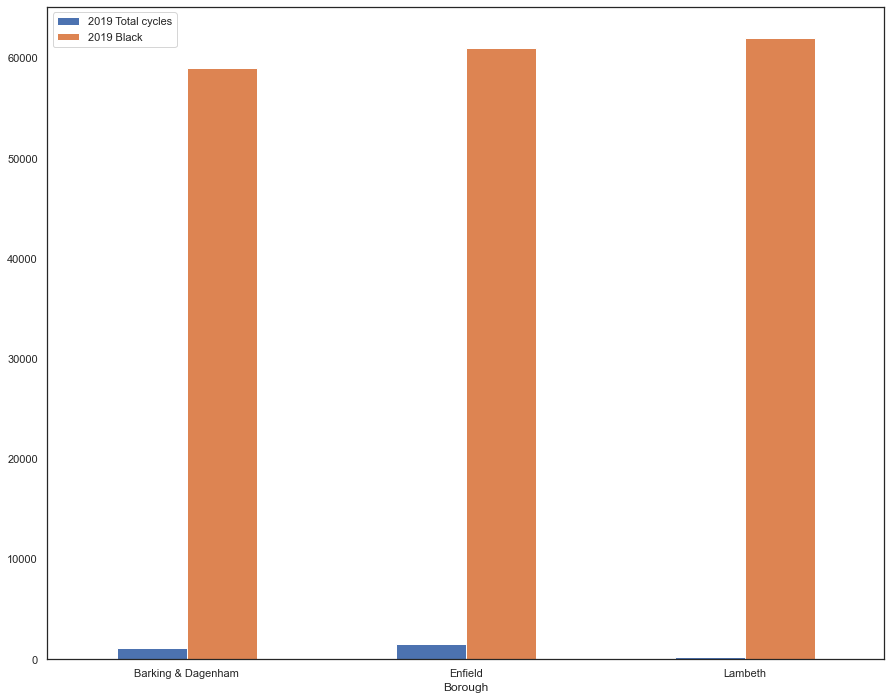

In [489]:
nc_black_boro = black_boro_cycle.plot(x="Borough", y=["2019 Total cycles", "2019 Black"], kind="bar", rot=0)

In [ ]:
nc_black_boro = black_boro.plot(x='Borough', y=['Number of private cycles', 'Number of cycle hire bikes'],
                                         kind='bar', figsize=(10,10))



nc_black_boro.legend(title='Borough', loc='upper left')
nc_black_boro.set_xlabel('Year-Quarter')
nc_black_boro.set_ylabel('Number of cycles')
nc_black_boro.set_title("Comparison between private and hire cycles in Central London")
nc_black_boro.title.set_fontsize(18)
nc_black_boro.xaxis.label.set_fontsize(18)
nc_black_boro.yaxis.label.set_fontsize(18)

## Black Boroughs and Female cycles

In [442]:
outer_ethnic_2019.sort_values(by=['2019 Black'], ascending=False)

Code                  Area  2019 White 2019 Asian 2019 Black  \
5   E09000008               Croydon      228000      64000      75000   
16  E09000023              Lewisham      195000      23000      71000   
18  E09000025                Newham      122000     137000      65000   
15  E09000022               Lambeth      200000      21000      62000   
7   E09000010               Enfield      199000      47000      61000   
0   E09000002  Barking and Dagenham      108000      43000      59000   
3   E09000005                 Brent      124000     101000      53000   
8   E09000011             Greenwich      175000      43000      53000   
6   E09000009                Ealing      172000      88000      40000   
9   E09000014              Haringey      182000      16000      39000   
22  E09000031        Waltham Forest      180000      34000      36000   
12  E09000017            Hillingdon      140000     122000      27000   
17  E09000024                Merton      121000      39000      25000   
1   E09000003                Barnet      257000      61000      24000   
4   E09000006               Bromley      262000      26000      24000   
13  E09000018              Hounslow      125000      97000      23000   
11  E09000016              Havering      202000      28000      23000   
23  E09000032            Wandsworth      245000      39000      21000   
2   E09000004                Bexley      207000      15000      20000   
19  E09000026             Redbridge      145000     142000      16000   
14  E09000021  Kingston upon Thames      130000      23000       8000   
10  E09000015                Harrow      106000     108000       8000   
21  E09000029                Sutton      161000      23000       7000   
20  E09000027  Richmond upon Thames      167000      11000       3000   

   2019 Mixed/ Other  2019 Total  
5              22000      389000  
16             21000      309000  
18             35000      358000  
15             43000      326000  
7              33000      340000  
0               8000      219000  
3              53000      330000  
8              18000      289000  
6              44000      343000  
9              43000      279000  
22             30000      280000  
12             21000      309000  
17             24000      209000  
1              55000      396000  
4              23000      335000  
13             27000      273000  
11              7000      261000  
23             18000      324000  
2               9000      251000  
19              8000      311000  
14             18000      179000  
10             28000      250000  
21             15000      206000  
20             16000      198000

In [443]:
outer_cycles_2019.sort_values(by=['2019 Female cycles'], ascending=True)

Borough  2019 Male cycles  2019 Female cycles  \
23            Wandsworth                46                  21   
15               Lambeth               152                  33   
2                 Bexley               954                  92   
10                Harrow               661                 125   
0     Barking & Dagenham               939                 142   
11              Havering              1189                 147   
19             Redbridge              1225                 193   
5                Croydon              2508                 202   
7                Enfield              1342                 212   
4                Bromley              2402                 213   
21                Sutton              2065                 291   
1                 Barnet              2369                 336   
8              Greenwich              2698                 363   
3                  Brent              3112                 393   
9               Haringey              3283                 417   
12            Hillingdon              3012                 444   
17                Merton              3723                 495   
16              Lewisham              4204                 572   
22        Waltham Forest              3468                 949   
18                Newham              5121                 956   
14  Kingston upon Thames              4730                1060   
13              Hounslow              5210                1165   
6                 Ealing              5757                1637   
20  Richmond upon Thames              8158                2510   

    2019 Unknown cycles  2019 Total cycles  
23                    0                 67  
15                    0                185  
2                    10               1056  
10                   11                797  
0                    30               1111  
11                    8               1344  
19                    8               1426  
5                     8               2718  
7                     7               1561  
4                    35               2650  
21                   61               2417  
1                    68               2773  
8                    11               3072  
3                    48               3553  
9                    43               3743  
12                   33               3489  
17                   76               4294  
16                   20               4796  
22                    4               4421  
18                   67               6144  
14                   92               5882  
13                   58               6433  
6                    61               7455  
20                   62              10730

Lambeth and Barking & Dagenham rank poorly again for female cycles in respect to the boroughs black population 

Interestingly, the borough with the largest black population being Croydon performs significantly worse in respect to its female cycles as it does for male / total. Only 202 female cyclists for the whole borough, with 75000 esitmated black population. 

Additionally, Richmond and Kingston upon Thames have the highest anf fourth highest count of female cycles, yet have the lowest and fourth lowest black populations for the boroughs.

In [492]:
upon_thames = outer_ethnic_2019[(outer_ethnic_2019['Area'].isin(['Kingston upon Thames', 
                                                                 'Richmond upon Thames']))].reset_index()

upon_thames

index       Code                  Area  2019 White 2019 Asian 2019 Black  \
0     14  E09000021  Kingston upon Thames      130000      23000       8000   
1     20  E09000027  Richmond upon Thames      167000      11000       3000   

  2019 Mixed/ Other  2019 Total  
0             18000      179000  
1             16000      198000

In [494]:
upon_thames_ss = upon_thames.loc[:, ['Code', 'Area', '2019 Black']]
upon_thames_ss

Code                  Area 2019 Black
0  E09000021  Kingston upon Thames       8000
1  E09000027  Richmond upon Thames       3000

In [496]:
upon_thames_ss = upon_thames_ss.rename(columns={'Area': 'Borough'})
upon_thames_ss

Code               Borough 2019 Black
0  E09000021  Kingston upon Thames       8000
1  E09000027  Richmond upon Thames       3000

In [495]:
upon_thames_cycles = outer_cycles_2019[(outer_cycles_2019['Borough'].isin(['Kingston upon Thames', 
                                                                           'Richmond upon Thames']))].reset_index()

upon_thames_cycles

index               Borough  2019 Male cycles  2019 Female cycles  \
0     14  Kingston upon Thames              4730                1060   
1     20  Richmond upon Thames              8158                2510   

   2019 Unknown cycles  2019 Total cycles  
0                   92               5882  
1                   62              10730

In [497]:
upon_thames_merge = pd.merge(upon_thames_cycles,
                             upon_thames_ss[['Borough', '2019 Black']],
                             on='Borough')
upon_thames_merge

index               Borough  2019 Male cycles  2019 Female cycles  \
0     14  Kingston upon Thames              4730                1060   
1     20  Richmond upon Thames              8158                2510   

   2019 Unknown cycles  2019 Total cycles 2019 Black  
0                   92               5882       8000  
1                   62              10730       3000

In [499]:
upon_thames_merge.loc[:, ['Borough', '2019 Female cycles', '2019 Black']]

Borough  2019 Female cycles 2019 Black
0  Kingston upon Thames                1060       8000
1  Richmond upon Thames                2510       3000

## Enfield 

In [524]:
enfield_2019 = outer_cycles_2019[(outer_cycles_2019['Borough'].isin(['Enfield']))].reset_index()
enfield_2019

index  Borough  2019 Male cycles  2019 Female cycles  2019 Unknown cycles  \
0      7  Enfield              1342                 212                    7   

   2019 Total cycles  
0               1561

In [526]:
enfield_ethnic = outer_ethnic_2019[(outer_ethnic_2019['Area'].isin(['Enfield']))].reset_index()
enfield_ethnic

index       Code     Area  2019 White 2019 Asian 2019 Black  \
0      7  E09000010  Enfield      199000      47000      61000   

  2019 Mixed/ Other  2019 Total  
0             33000      340000

In [530]:
enfield_ethnic = enfield_ethnic.rename(columns={'Area': 'Borough'})
enfield_ethnic

index       Code  Borough  2019 White 2019 Asian 2019 Black  \
0      7  E09000010  Enfield      199000      47000      61000   

  2019 Mixed/ Other  2019 Total  
0             33000      340000

In [533]:
enfield_ft = outer_ft[(outer_ft['Area'].isin(['Enfield']))].reset_index()
enfield_ft

index  Code     Area  2014 Pay (£)  2015 Pay (£)  2016 Pay (£)  \
0      7  00AK  Enfield         557.8         565.9         574.9   

   2017 Pay (£)  2018 Pay (£)  2019 Pay (£)  2020 Pay (£)  2021 Pay (£)  
0         587.7         590.0         638.9         643.2         670.4

In [534]:
enfield_ft = enfield_ft.rename(columns={'Area': 'Borough'})
enfield_ft

index  Code  Borough  2014 Pay (£)  2015 Pay (£)  2016 Pay (£)  \
0      7  00AK  Enfield         557.8         565.9         574.9   

   2017 Pay (£)  2018 Pay (£)  2019 Pay (£)  2020 Pay (£)  2021 Pay (£)  
0         587.7         590.0         638.9         643.2         670.4

In [536]:
enfield_merge =  pd.merge(enfield_2019,
                          enfield_ethnic[['Borough', '2019 Black']],
                          on='Borough')

enfield_merge

index  Borough  2019 Male cycles  2019 Female cycles  2019 Unknown cycles  \
0      7  Enfield              1342                 212                    7   

   2019 Total cycles 2019 Black  
0               1561      61000

In [537]:
enfield_merge =  pd.merge(enfield_merge,
                          enfield_ft[['Borough', '2019 Pay (£)']],
                          on='Borough')

enfield_merge

index  Borough  2019 Male cycles  2019 Female cycles  2019 Unknown cycles  \
0      7  Enfield              1342                 212                    7   

   2019 Total cycles 2019 Black  2019 Pay (£)  
0               1561      61000         638.9

In [538]:
enfield_merge = enfield_merge.drop(['index'], axis=1)
enfield_merge

Borough  2019 Male cycles  2019 Female cycles  2019 Unknown cycles  \
0  Enfield              1342                 212                    7   

   2019 Total cycles 2019 Black  2019 Pay (£)  
0               1561      61000         638.9

## Mini Hollands

In [540]:
mini_hollands_group.head()

Borough  Survey wave (year)  Start hour  Start minute  \
0  Enfield                2015       34560         57600   
1  Enfield                2016       34560         57600   
2  Enfield                2017       34560         57600   
3  Enfield                2018       34560         57600   
4  Enfield                2019       34560         57600   

   Number of male cycles  Number of female cycles  Number of unknown cycles  \
0                   1496                      347                         0   
1                   1339                      247                         2   
2                   1686                      278                         7   
3                   1568                      252                         9   
4                   1342                      212                         7   

   Total cycles  
0          1843  
1          1588  
2          1971  
3          1829  
4          1561

In [541]:
mini_hollands_group.to_csv('mini_hollands_group.csv')

In [543]:
mini_hollands_2019 = pd.read_csv('mini_hollands_2019.csv')
mini_hollands_2019

Borough  2019 Male cycles  2019 Female cycles  \
0               Enfield              1342                 212   
1  Kingston upon Thames              4730                1060   
2        Waltham Forest              3468                 949   

   2019 Unknown cycles  2019 Total cycles  
0                    7               1561  
1                   92               5882  
2                    4               4421

In [544]:
mini_hollands_ft = outer_ft[(outer_ft['Area'].isin(['Enfield', 'Kingston upon Thames',
                                                    'Waltham Forest']))].reset_index()

mini_hollands_ft

index  Code                  Area  2014 Pay (£)  2015 Pay (£)  \
0      7  00AK               Enfield         557.8         565.9   
1     14  00AX  Kingston upon Thames         704.2         710.2   
2     22  00BH        Waltham Forest         542.9         546.9   

   2016 Pay (£)  2017 Pay (£)  2018 Pay (£)  2019 Pay (£)  2020 Pay (£)  \
0         574.9         587.7         590.0         638.9         643.2   
1         707.8         706.9         736.7         742.8         759.4   
2         577.1         574.9         622.9         680.3         716.2   

   2021 Pay (£)  
0         670.4  
1         766.6  
2         727.7

In [545]:
mini_hollands_ft = mini_hollands_ft.rename(columns={'Area': 'Borough'})
mini_hollands_ft

index  Code               Borough  2014 Pay (£)  2015 Pay (£)  \
0      7  00AK               Enfield         557.8         565.9   
1     14  00AX  Kingston upon Thames         704.2         710.2   
2     22  00BH        Waltham Forest         542.9         546.9   

   2016 Pay (£)  2017 Pay (£)  2018 Pay (£)  2019 Pay (£)  2020 Pay (£)  \
0         574.9         587.7         590.0         638.9         643.2   
1         707.8         706.9         736.7         742.8         759.4   
2         577.1         574.9         622.9         680.3         716.2   

   2021 Pay (£)  
0         670.4  
1         766.6  
2         727.7

In [549]:
mini_holland_ethnic = outer_ethnic_2019[(outer_ethnic_2019['Area'].isin(['Enfield', 'Kingston upon Thames',
                                                    'Waltham Forest']))].reset_index()
mini_holland_ethnic

index       Code                  Area  2019 White 2019 Asian 2019 Black  \
0      7  E09000010               Enfield      199000      47000      61000   
1     14  E09000021  Kingston upon Thames      130000      23000       8000   
2     22  E09000031        Waltham Forest      180000      34000      36000   

  2019 Mixed/ Other  2019 Total  
0             33000      340000  
1             18000      179000  
2             30000      280000

In [550]:
mini_holland_ethnic = mini_holland_ethnic.rename(columns={'Area': 'Borough'})
mini_holland_ethnic

index       Code               Borough  2019 White 2019 Asian 2019 Black  \
0      7  E09000010               Enfield      199000      47000      61000   
1     14  E09000021  Kingston upon Thames      130000      23000       8000   
2     22  E09000031        Waltham Forest      180000      34000      36000   

  2019 Mixed/ Other  2019 Total  
0             33000      340000  
1             18000      179000  
2             30000      280000

In [551]:
mini_holland_merge = pd.merge(mini_hollands_2019,
                              mini_holland_ethnic[['Borough', '2019 Black']],
                              on='Borough')

mini_holland_merge

Borough  2019 Male cycles  2019 Female cycles  \
0               Enfield              1342                 212   
1  Kingston upon Thames              4730                1060   
2        Waltham Forest              3468                 949   

   2019 Unknown cycles  2019 Total cycles 2019 Black  
0                    7               1561      61000  
1                   92               5882       8000  
2                    4               4421      36000

In [552]:
mini_holland_merge = pd.merge(mini_holland_merge,
                              mini_hollands_ft[['Borough', '2019 Pay (£)']],
                              on='Borough')

mini_holland_merge

Borough  2019 Male cycles  2019 Female cycles  \
0               Enfield              1342                 212   
1  Kingston upon Thames              4730                1060   
2        Waltham Forest              3468                 949   

   2019 Unknown cycles  2019 Total cycles 2019 Black  2019 Pay (£)  
0                    7               1561      61000         638.9  
1                   92               5882       8000         742.8  
2                    4               4421      36000         680.3

In [553]:
mini_holland_merge.loc[:, ['Borough', '2019 Total cycles',
                          '2019 Black', '2019 Pay (£)']].sort_values(by=['2019 Total cycles'], ascending=False)

Borough  2019 Total cycles 2019 Black  2019 Pay (£)
1  Kingston upon Thames               5882       8000         742.8
2        Waltham Forest               4421      36000         680.3
0               Enfield               1561      61000         638.9

## Asian cyclists 

In [445]:
outer_ethnic_2019.sort_values(by=['2019 Asian'], ascending=False)

Code                  Area  2019 White 2019 Asian 2019 Black  \
19  E09000026             Redbridge      145000     142000      16000   
18  E09000025                Newham      122000     137000      65000   
12  E09000017            Hillingdon      140000     122000      27000   
10  E09000015                Harrow      106000     108000       8000   
3   E09000005                 Brent      124000     101000      53000   
13  E09000018              Hounslow      125000      97000      23000   
6   E09000009                Ealing      172000      88000      40000   
5   E09000008               Croydon      228000      64000      75000   
1   E09000003                Barnet      257000      61000      24000   
7   E09000010               Enfield      199000      47000      61000   
0   E09000002  Barking and Dagenham      108000      43000      59000   
8   E09000011             Greenwich      175000      43000      53000   
17  E09000024                Merton      121000      39000      25000   
23  E09000032            Wandsworth      245000      39000      21000   
22  E09000031        Waltham Forest      180000      34000      36000   
11  E09000016              Havering      202000      28000      23000   
4   E09000006               Bromley      262000      26000      24000   
14  E09000021  Kingston upon Thames      130000      23000       8000   
16  E09000023              Lewisham      195000      23000      71000   
21  E09000029                Sutton      161000      23000       7000   
15  E09000022               Lambeth      200000      21000      62000   
9   E09000014              Haringey      182000      16000      39000   
2   E09000004                Bexley      207000      15000      20000   
20  E09000027  Richmond upon Thames      167000      11000       3000   

   2019 Mixed/ Other  2019 Total  
19              8000      311000  
18             35000      358000  
12             21000      309000  
10             28000      250000  
3              53000      330000  
13             27000      273000  
6              44000      343000  
5              22000      389000  
1              55000      396000  
7              33000      340000  
0               8000      219000  
8              18000      289000  
17             24000      209000  
23             18000      324000  
22             30000      280000  
11              7000      261000  
4              23000      335000  
14             18000      179000  
16             21000      309000  
21             15000      206000  
15             43000      326000  
9              43000      279000  
2               9000      251000  
20             16000      198000

In [446]:
outer_cycles_2019.sort_values(by=['2019 Total cycles'], ascending=True)

Borough  2019 Male cycles  2019 Female cycles  \
23            Wandsworth                46                  21   
15               Lambeth               152                  33   
10                Harrow               661                 125   
2                 Bexley               954                  92   
0     Barking & Dagenham               939                 142   
11              Havering              1189                 147   
19             Redbridge              1225                 193   
7                Enfield              1342                 212   
21                Sutton              2065                 291   
4                Bromley              2402                 213   
5                Croydon              2508                 202   
1                 Barnet              2369                 336   
8              Greenwich              2698                 363   
12            Hillingdon              3012                 444   
3                  Brent              3112                 393   
9               Haringey              3283                 417   
17                Merton              3723                 495   
22        Waltham Forest              3468                 949   
16              Lewisham              4204                 572   
14  Kingston upon Thames              4730                1060   
18                Newham              5121                 956   
13              Hounslow              5210                1165   
6                 Ealing              5757                1637   
20  Richmond upon Thames              8158                2510   

    2019 Unknown cycles  2019 Total cycles  
23                    0                 67  
15                    0                185  
10                   11                797  
2                    10               1056  
0                    30               1111  
11                    8               1344  
19                    8               1426  
7                     7               1561  
21                   61               2417  
4                    35               2650  
5                     8               2718  
1                    68               2773  
8                    11               3072  
12                   33               3489  
3                    48               3553  
9                    43               3743  
17                   76               4294  
22                    4               4421  
16                   20               4796  
14                   92               5882  
18                   67               6144  
13                   58               6433  
6                    61               7455  
20                   62              10730

In [452]:
outer_ft.loc[:, ['Area', '2019 Pay (£)']].sort_values(by=['2019 Pay (£)'], ascending=True)

Area 2019 Pay (£)
0   Barking and Dagenham        589.8
3                  Brent        609.6
12            Hillingdon        621.7
6                 Ealing        622.4
18                Newham        622.8
7                Enfield        638.9
11              Havering        650.4
16              Lewisham        654.1
13              Hounslow        658.8
21                Sutton        668.6
9               Haringey        670.8
2                 Bexley          671
5                Croydon        671.4
1                 Barnet        677.5
8              Greenwich        679.6
22        Waltham Forest        680.3
19             Redbridge        683.9
10                Harrow        693.5
17                Merton        710.4
15               Lambeth        714.4
14  Kingston upon Thames        742.8
4                Bromley        785.3
23            Wandsworth        811.8
20  Richmond upon Thames        820.3

Slight correlation with Asian boroughs and total cycles. 

Redbridge and Harrow rank first and fourth for Asian population for outer boroughs, however 18th and 22nd, out for 24, for total cycles.

## Visualisations

In [558]:
asian_boro = outer_ethnic_2019[(outer_ethnic_2019['Area'].isin(['Redbridge', 'Harrow']))].reset_index()

asian_boro

index       Code       Area  2019 White 2019 Asian 2019 Black  \
0     10  E09000015     Harrow      106000     108000       8000   
1     19  E09000026  Redbridge      145000     142000      16000   

  2019 Mixed/ Other  2019 Total  
0             28000      250000  
1              8000      311000

In [567]:
asian_boro_ss = asian_boro.loc[:, ['Code', 'Area', '2019 Asian']]
asian_boro_ss

Code       Area 2019 Asian
0  E09000015     Harrow     108000
1  E09000026  Redbridge     142000

In [568]:
asian_boro_ss = asian_boro_ss.rename(columns={'Area': 'Borough'})
asian_boro_ss

Code    Borough 2019 Asian
0  E09000015     Harrow     108000
1  E09000026  Redbridge     142000

In [564]:
asian_cycles = outer_cycles_2019[(outer_cycles_2019['Borough'].isin(['Redbridge', 'Harrow']))].reset_index()

asian_cycles

index    Borough  2019 Male cycles  2019 Female cycles  \
0     10     Harrow               661                 125   
1     19  Redbridge              1225                 193   

   2019 Unknown cycles  2019 Total cycles  
0                   11                797  
1                    8               1426

In [569]:
asian_boro_cycle = pd.merge(asian_cycles,
                            asian_boro_ss[['Borough', '2019 Asian']],
                            on='Borough')
asian_boro_cycle

index    Borough  2019 Male cycles  2019 Female cycles  \
0     10     Harrow               661                 125   
1     19  Redbridge              1225                 193   

   2019 Unknown cycles  2019 Total cycles 2019 Asian  
0                   11                797     108000  
1                    8               1426     142000

In [570]:
asian_boro_cycle = asian_boro_cycle.drop(['index'], axis=1)
asian_boro_cycle

Borough  2019 Male cycles  2019 Female cycles  2019 Unknown cycles  \
0     Harrow               661                 125                   11   
1  Redbridge              1225                 193                    8   

   2019 Total cycles 2019 Asian  
0                797     108000  
1               1426     142000

In [572]:
asian_cycle_pop = asian_boro_cycle.loc[:, ['Borough', '2019 Total cycles', '2019 Asian']]
asian_cycle_pop

Borough  2019 Total cycles 2019 Asian
0     Harrow                797     108000
1  Redbridge               1426     142000

In [573]:
barking_lambeth

Borough  2019 Total cycles 2019 Black
0  Barking & Dagenham               1111      59000
1             Lambeth                185      62000

## Asian Boroughs and Female cycles

In [453]:
outer_ethnic_2019.sort_values(by=['2019 Asian'], ascending=False)

Code                  Area  2019 White 2019 Asian 2019 Black  \
19  E09000026             Redbridge      145000     142000      16000   
18  E09000025                Newham      122000     137000      65000   
12  E09000017            Hillingdon      140000     122000      27000   
10  E09000015                Harrow      106000     108000       8000   
3   E09000005                 Brent      124000     101000      53000   
13  E09000018              Hounslow      125000      97000      23000   
6   E09000009                Ealing      172000      88000      40000   
5   E09000008               Croydon      228000      64000      75000   
1   E09000003                Barnet      257000      61000      24000   
7   E09000010               Enfield      199000      47000      61000   
0   E09000002  Barking and Dagenham      108000      43000      59000   
8   E09000011             Greenwich      175000      43000      53000   
17  E09000024                Merton      121000      39000      25000   
23  E09000032            Wandsworth      245000      39000      21000   
22  E09000031        Waltham Forest      180000      34000      36000   
11  E09000016              Havering      202000      28000      23000   
4   E09000006               Bromley      262000      26000      24000   
14  E09000021  Kingston upon Thames      130000      23000       8000   
16  E09000023              Lewisham      195000      23000      71000   
21  E09000029                Sutton      161000      23000       7000   
15  E09000022               Lambeth      200000      21000      62000   
9   E09000014              Haringey      182000      16000      39000   
2   E09000004                Bexley      207000      15000      20000   
20  E09000027  Richmond upon Thames      167000      11000       3000   

   2019 Mixed/ Other  2019 Total  
19              8000      311000  
18             35000      358000  
12             21000      309000  
10             28000      250000  
3              53000      330000  
13             27000      273000  
6              44000      343000  
5              22000      389000  
1              55000      396000  
7              33000      340000  
0               8000      219000  
8              18000      289000  
17             24000      209000  
23             18000      324000  
22             30000      280000  
11              7000      261000  
4              23000      335000  
14             18000      179000  
16             21000      309000  
21             15000      206000  
15             43000      326000  
9              43000      279000  
2               9000      251000  
20             16000      198000

In [455]:
outer_cycles_2019.loc[:, ['Borough', '2019 Female cycles']].sort_values(by=['2019 Female cycles'], ascending=True)

Borough  2019 Female cycles
23            Wandsworth                  21
15               Lambeth                  33
2                 Bexley                  92
10                Harrow                 125
0     Barking & Dagenham                 142
11              Havering                 147
19             Redbridge                 193
5                Croydon                 202
7                Enfield                 212
4                Bromley                 213
21                Sutton                 291
1                 Barnet                 336
8              Greenwich                 363
3                  Brent                 393
9               Haringey                 417
12            Hillingdon                 444
17                Merton                 495
16              Lewisham                 572
22        Waltham Forest                 949
18                Newham                 956
14  Kingston upon Thames                1060
13              Hounslow                1165
6                 Ealing                1637
20  Richmond upon Thames                2510

No obvious changes or signs, Redbridge performs slightly better regards Female cycling than it does for Total cycling 

## Mixed / other

In [458]:
outer_ethnic_2019.loc[:, ['Area', '2019 Mixed/ Other']].sort_values(by=['2019 Mixed/ Other'], ascending=False)

Area 2019 Mixed/ Other
1                 Barnet             55000
3                  Brent             53000
6                 Ealing             44000
15               Lambeth             43000
9               Haringey             43000
18                Newham             35000
7                Enfield             33000
22        Waltham Forest             30000
10                Harrow             28000
13              Hounslow             27000
17                Merton             24000
4                Bromley             23000
5                Croydon             22000
12            Hillingdon             21000
16              Lewisham             21000
23            Wandsworth             18000
14  Kingston upon Thames             18000
8              Greenwich             18000
20  Richmond upon Thames             16000
21                Sutton             15000
2                 Bexley              9000
19             Redbridge              8000
0   Barking and Dagenham              8000
11              Havering              7000

In [459]:
outer_cycles_2019.sort_values(by=['2019 Total cycles'], ascending=True)

Borough  2019 Male cycles  2019 Female cycles  \
23            Wandsworth                46                  21   
15               Lambeth               152                  33   
10                Harrow               661                 125   
2                 Bexley               954                  92   
0     Barking & Dagenham               939                 142   
11              Havering              1189                 147   
19             Redbridge              1225                 193   
7                Enfield              1342                 212   
21                Sutton              2065                 291   
4                Bromley              2402                 213   
5                Croydon              2508                 202   
1                 Barnet              2369                 336   
8              Greenwich              2698                 363   
12            Hillingdon              3012                 444   
3                  Brent              3112                 393   
9               Haringey              3283                 417   
17                Merton              3723                 495   
22        Waltham Forest              3468                 949   
16              Lewisham              4204                 572   
14  Kingston upon Thames              4730                1060   
18                Newham              5121                 956   
13              Hounslow              5210                1165   
6                 Ealing              5757                1637   
20  Richmond upon Thames              8158                2510   

    2019 Unknown cycles  2019 Total cycles  
23                    0                 67  
15                    0                185  
10                   11                797  
2                    10               1056  
0                    30               1111  
11                    8               1344  
19                    8               1426  
7                     7               1561  
21                   61               2417  
4                    35               2650  
5                     8               2718  
1                    68               2773  
8                    11               3072  
12                   33               3489  
3                    48               3553  
9                    43               3743  
17                   76               4294  
22                    4               4421  
16                   20               4796  
14                   92               5882  
18                   67               6144  
13                   58               6433  
6                    61               7455  
20                   62              10730